# DAV 6150 - Final Project

**Project Members:** Alwyn Munatsi, Lucia Shumba, Chidochashe Makanga and Bekithemba Nkomo  
**Dataset:** [UCI Adult (Census Income)](https://archive.ics.uci.edu/dataset/2/adult)  
**Project Topic:** THE QUEST TO PREDICT LABOR: A DATA-DRIVEN LOOK AT
WEEKLY WORK HOURS

Exploring which demographic, socioeconomic, and occupational variables best predict weekly labor supply (hours worked per week) among U.S. adults.


# 1. Introduction

### Problem Statement

Labor supply variation is a critical dimension of both individual economic behavior and the broader macro labor market. Weekly hours worked reflect complex interactions among demographic attributes, educational attainment, occupational roles, and household economic context. Recent U.S. labor statistics highlight persistent structural inequalities: the U.S. Census Bureau reported a Gini index of 0.494 in 2023, among the highest levels recorded since measurement began in 1967, signaling growing income inequality (U.S. Census Bureau, 2024). Similarly, the U.S. Bureau of Labor Statistics noted that women’s median weekly earnings remained approximately 83% of men’s earnings in 2023, underscoring continued gender-based labor market disparities (U.S. Bureau of Labor Statistics, 2024).

While income thresholds are often used to classify economic outcomes, they obscure important variation in actual labor participation intensity. Modeling hours worked per week provides a more granular, continuous, and policy-relevant measure of labor supply, capturing not just whether individuals participate in the labor force, but how much they contribute in terms of time. Weekly hours worked directly reflect employment constraints, job quality, caregiving responsibilities, and occupational norms, making it a meaningful outcome variable for labor market analysis.

Using publicly available census-style data that captures demographic, educational, occupational, and economic characteristics, this project seeks to identify which factors most strongly influence weekly labor supply, and to evaluate whether modern machine learning regression models can accurately predict hours worked per week. The analysis contributes to a data-driven understanding of labor participation patterns, workforce inequality, and structural determinants of work intensity across the U.S. adult population.

###Research Questions

1. Primary Research Question (RQ1)

Which demographic, educational, and occupational attributes most strongly influence weekly labor supply (hours worked per week)?

Identifying the strongest determinants of hours worked provides insight into how socioeconomic positioning shapes real-world labor participation and time allocation. These insights support evidence-based workforce planning, labor policy design, and equitable compensation strategies.

2. Secondary Research Question (RQ2)

Can machine learning regression models accurately predict weekly hours worked using demographic and socioeconomic features contained in the dataset?

This question evaluates the feasibility and accuracy of predictive modeling for continuous labor supply outcomes using individual-level census attributes.

3. Secondary Research Question (RQ3)

Does an ensemble regression model outperform individual regression models when predicting weekly hours worked?

Assessing ensemble performance tests whether combining multiple “weak learners” yields superior predictive accuracy and generalization, reinforcing best practices in applied labor analytics.


### Real-World Relevance

Findings from this research have implications for:
* Public policy related to workforce participation, labor equity, and working-hour regulations
* Human resources and workforce management, including scheduling, workload distribution, and fairness assessments
* Academic and nonprofit research examining structural determinants of labor supply and economic participation

By emphasizing hours worked rather than income thresholds alone, the analysis supports more equitable and nuanced interpretations of labor market behavior.

### Data to Be Used

The data for this project will be sourced from the UCI Machine Learning Repository, using the dataset titled Adult (Census Income), originally extracted from the 1994 U.S. Census Bureau database.

Dataset URL: https://archive.ics.uci.edu/dataset/2/adult

The dataset contains approximately 48,842 observations and 15 total variables describing demographic, educational, occupational, and economic characteristics of U.S. adults.

Response Variable
* hours-per-week

A continuous numeric variable representing the number of hours an individual works per week. This serves as the dependent variable and primary measure of labor supply.

* Independent Variables

Independent variables include a mix of numeric and categorical features:

* Numeric variables: age, education-num, capital-gain, capital-loss

* Categorical variables: workclass, education, marital-status, occupation, relationship, race, sex, native-country

Categorical variables will be appropriately encoded (e.g., one-hot encoding) prior to model training. Missing values, primarily present in workclass, occupation, and native-country, will be addressed during preprocessing.

### Data Collection Method

The dataset will be obtained by directly downloading the CSV files from the official UCI repository. No web scraping or third-party APIs are required, as the data is openly available for academic use. The data will be imported into a Python-based Jupyter Notebook environment using the pandas library for cleaning, exploration, and modeling.

### Approach

Data Management Plan

All data handling and analysis will be conducted in a Jupyter Notebook using Python libraries including pandas, scikit-learn, and xgboost. The raw dataset will be stored locally and version-controlled using GitHub to ensure reproducibility.

A structured analytical pipeline will be followed:
1. Data ingestion
2. Pre–exploratory data analysis (EDA)
3. Data cleaning and preprocessing
4. Post-EDA and feature inspection
5. Feature selection and/or dimensionality reduction
6. Model training
7. Model evaluation
8. Ensemble integration
9. Interpretation of results
10. Reporting and documentation

Cleaned and encoded intermediate datasets will be saved in CSV format for consistency and traceability.

### Statistical and Analytical Methods

Descriptive statistics (mean, median, variance) will summarize numeric variables such as age and hours-per-week. Frequency distributions and bar charts will describe categorical attributes including education level and occupation. Correlation analysis will be used to explore relationships among numeric predictors.

Regression model performance will be evaluated using:
* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)
* R² (coefficient of determination)
* Mean Absolute Percentage Error (MAPE)

Five-fold cross-validation will be employed to ensure model stability and generalization.

### Machine Learning Models to Be Constructed

The following regression models will be developed and compared:
1. Negative Binomial Regression – Models count-like behavior and accounts for overdispersion in hours worked.
2. K-Nearest Neighbors (KNN) Regressor – Captures nonlinear patterns through local averaging.
3. Support Vector Regression (SVR) – Models complex nonlinear relationships using kernel functions.
4. Decision Tree Regressor – Provides interpretable, rule-based nonlinear modeling.
5. XGBoost Regressor – A high-performance gradient-boosted tree model used as an advanced learner or benchmark.

Hyperparameter optimization will be performed using GridSearchCV, and all models will be evaluated using consistent metrics.

### Ensemble Model Design

To satisfy the ensemble modeling requirement, four base regression learners (Negative Binomial, KNN, SVR, and Decision Tree) will be combined using a Voting Regressor, with both uniform and weighted strategies explored. The ensemble’s performance will be compared against the standalone XGBoost Regressor to assess whether hybrid modeling improves predictive accuracy.

### 2. EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import NegativeBinomial

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


Load Dataset

In [ ]:
# Load dataset from github repository
df = pd.read_csv("https://raw.githubusercontent.com/bnkomo-creator/DAV-6150/refs/heads/main/FinalProject_Data.csv")

In [ ]:
# Print the shape of the DataFrame (number of rows and columns)
print(f"Dataset shape: {df.shape}")

# Print the number of rows in a formatted way
print(f"Number of rows: {df.shape[0]:,}")

# Print the number of columns
print(f"Number of columns: {df.shape[1]}")

# Display the first 5 rows of the DataFrame to get a glimpse of the data
print("\nFirst 5 rows of the dataset:")

display(df.head())

# Display information about the DataFrame, including data types and non-null values
print("\nDataset info:")

display(df.info())

Dataset shape: (32561, 15)
Number of rows: 32,561
Number of columns: 15

First 5 rows of the dataset:


age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

The dataset contains **32,561 rows** and **15 columns**. The first few rows give a glimpse of the data, which includes demographic information such as age, workclass, education, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, native country, and income. Most (9)columns are of `object` type (categorical), while others (6) are `int64` (numerical).

In [ ]:
print("Checking for duplicate rows...")
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

print("\nChecking for missing values...")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if missing_values.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values per column:")
    print(missing_values)

Checking for duplicate rows...
Number of duplicate rows: 24

Checking for missing values...
No missing values found in the dataset.


The dataset contains **24 duplicate rows**. After checking for missing values, it was found that there are **no missing values** in any of the columns. Based on this initial data loading and inspection, the following possible data preparation steps are identified:

1.  **Handle Duplicate Rows**: Remove the 24 identified duplicate rows to ensure data integrity and prevent bias in model training.
2.  **Review and Handle Missing Values**: Although `df.isnull().sum()` reported no missing values, it's crucial to confirm that all ' ?' strings were correctly interpreted as `NaN` during loading. If not, these will need to be addressed.
3.  **Drop Irrelevant Columns**: Consider dropping columns that are not relevant to the prediction of `hours_per_week` or are redundant. For example:
    *   `fnlwgt`: This is a population weight and typically not used as a feature for individual-level prediction in machine learning models.
    *   `education`: This is a representation of the `education_num` column.
4.  **Categorical Feature Encoding**: Convert categorical `object` columns (e.g., `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country`) into a numerical format suitable for machine learning models using techniques like One-Hot Encoding.
5.  **Feature Scaling**: Numerical features (e.g., `age`, `capital_gain`, `capital_loss`) may need to be scaled to ensure that features with larger values do not disproportionately influence the model.

### Univariate Analysis


Description of 'age':


count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

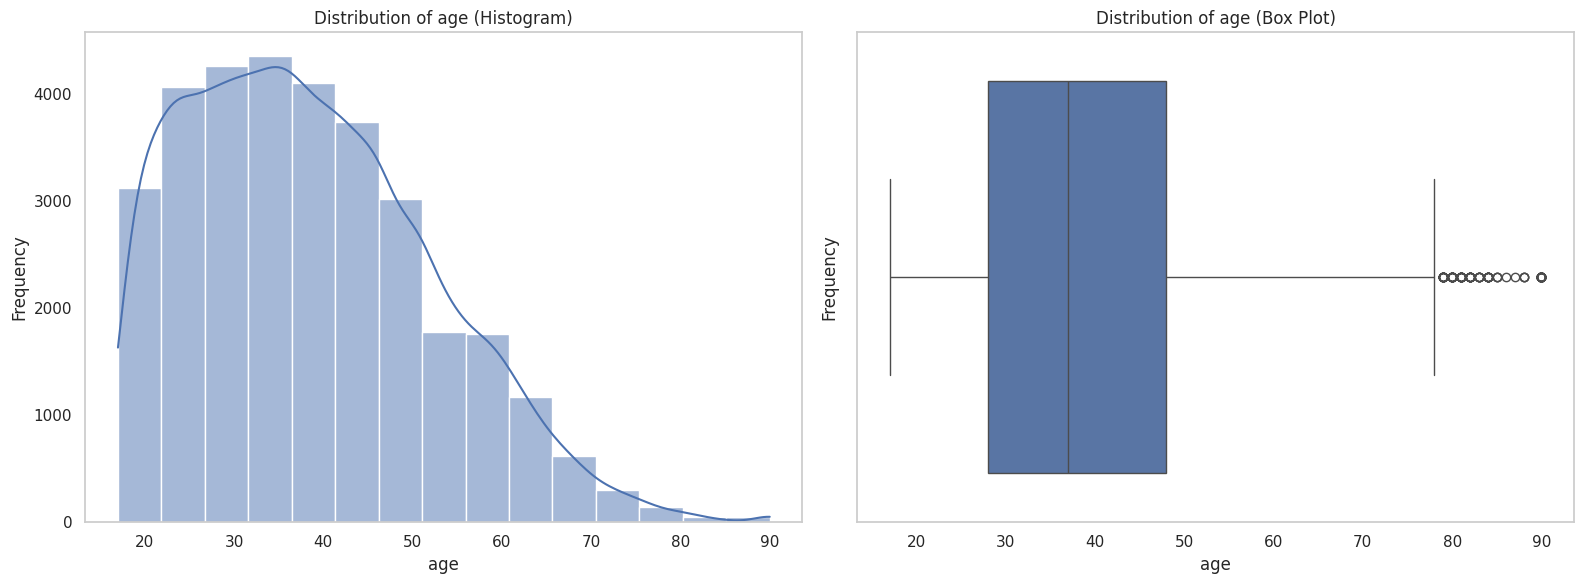

In [ ]:
# EDA for Age
col = 'age'
# Display basic statistics
print(f"\nDescription of '{col}':")
display(df[col].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x=col, ax=axes[0], kde=True, binwidth=5)
axes[0].set_title(f'Distribution of {col} (Histogram)')
axes[0].set_xlabel(col)
axes[0].set_ylabel('Frequency')
axes[0].grid(False) # Remove gridlines

# Box plot
sns.boxplot(data=df, x=col, ax=axes[1])
axes[1].set_title(f'Distribution of {col} (Box Plot)')
axes[1].set_xlabel(col)
axes[1].set_ylabel('Frequency')
axes[1].grid(False) # Remove gridlines

plt.tight_layout()
plt.show()

### Summary of Age Distribution:

The `age` column has been analyzed, revealing the following insights:

*   **Descriptive Statistics**: The age ranges from 17 to 90 years, with a mean age of approximately 38.6 years and a standard deviation of 13.6 years. The median age is 37, indicating a slight right skew in the distribution, where a larger portion of the population is younger than the average.
*   **Histogram**: The histogram shows that the majority of individuals in the dataset are in their late 20s to early 40s. The distribution is clearly right-skewed, with a longer tail towards older ages.
*   **Box Plot**: The box plot further confirms the right-skewed nature of the data and indicates the presence of several outliers, particularly at older ages (above roughly 70-75 years). The interquartile range (IQR) suggests that 50% of the population falls between 28 and 48 years old.


Description of 'fnlwgt':


count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

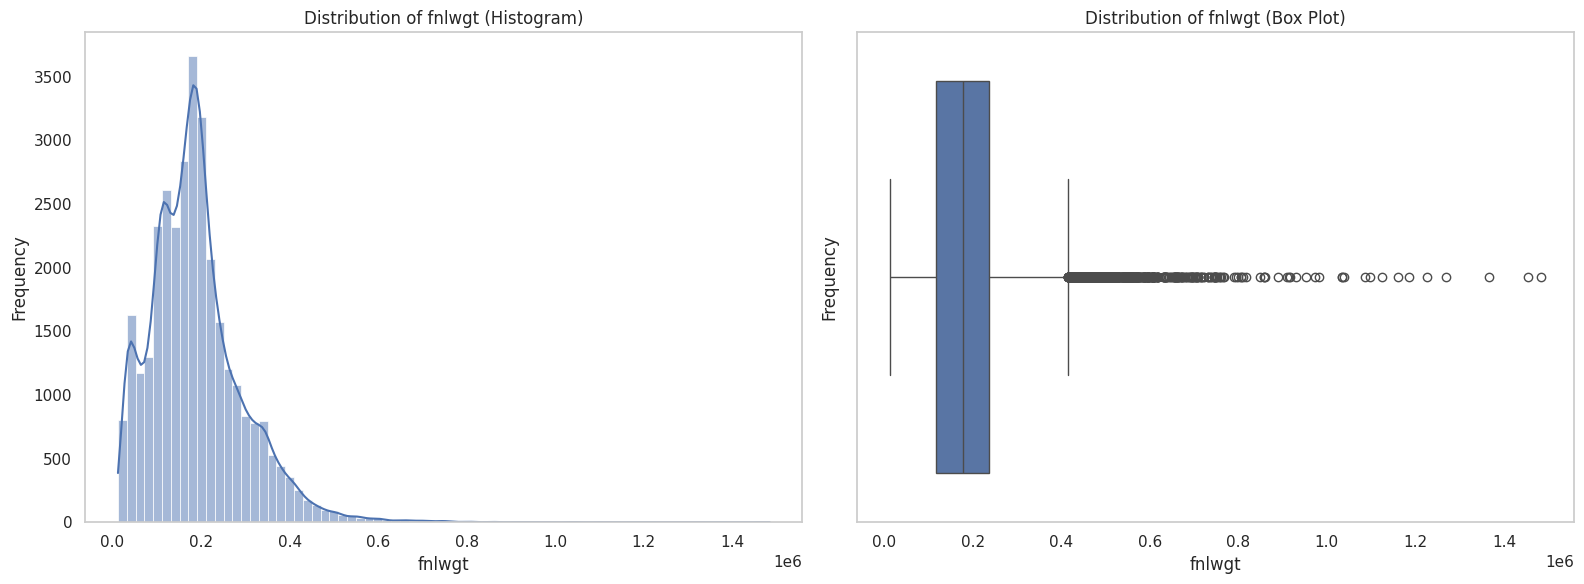

In [ ]:
# EDA for final Weight(fnlwgt)
col = 'fnlwgt'
# Display basic statistics
print(f"\nDescription of '{col}':")
display(df[col].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x=col, ax=axes[0], kde=True, binwidth=20000)
axes[0].set_title(f'Distribution of {col} (Histogram)')
axes[0].set_xlabel(col)
axes[0].set_ylabel('Frequency')
axes[0].grid(False) # Remove gridlines

# Box plot
sns.boxplot(data=df, x=col, ax=axes[1])
axes[1].set_title(f'Distribution of {col} (Box Plot)')
axes[1].set_xlabel(col)
axes[1].set_ylabel('Frequency')
axes[1].grid(False) # Remove gridlines

plt.tight_layout()
plt.show()

### Summary of Fnlwgt Distribution:

The `fnlwgt` (final weight) column has been analyzed, revealing the following insights:

*   **Descriptive Statistics**: The `fnlwgt` values range from 12,285 to 1,484,705, with a mean of approximately 189,778 and a median of 178,356. This wide range and the difference between the mean and median suggest a skewed distribution.
*   **Histogram**: The histogram shows a heavily right-skewed distribution, with the vast majority of values clustered at the lower end. There's a sharp peak early on, followed by a long tail extending to much higher values. This indicates that most individuals have lower `fnlwgt` values, with fewer individuals having very high weights.
*   **Box Plot**: The box plot confirms the extreme right-skewness and the presence of numerous outliers, especially on the higher end. The interquartile range (IQR) is relatively narrow compared to the overall spread, highlighting that the bulk of the data is concentrated, while extreme values significantly pull the mean upwards. As noted in the data preparation section, `fnlwgt` is often considered a statistical weight for population estimation rather than a direct feature for individual prediction in ML models, due to its distribution and nature.


Description of 'capital_gain':


count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

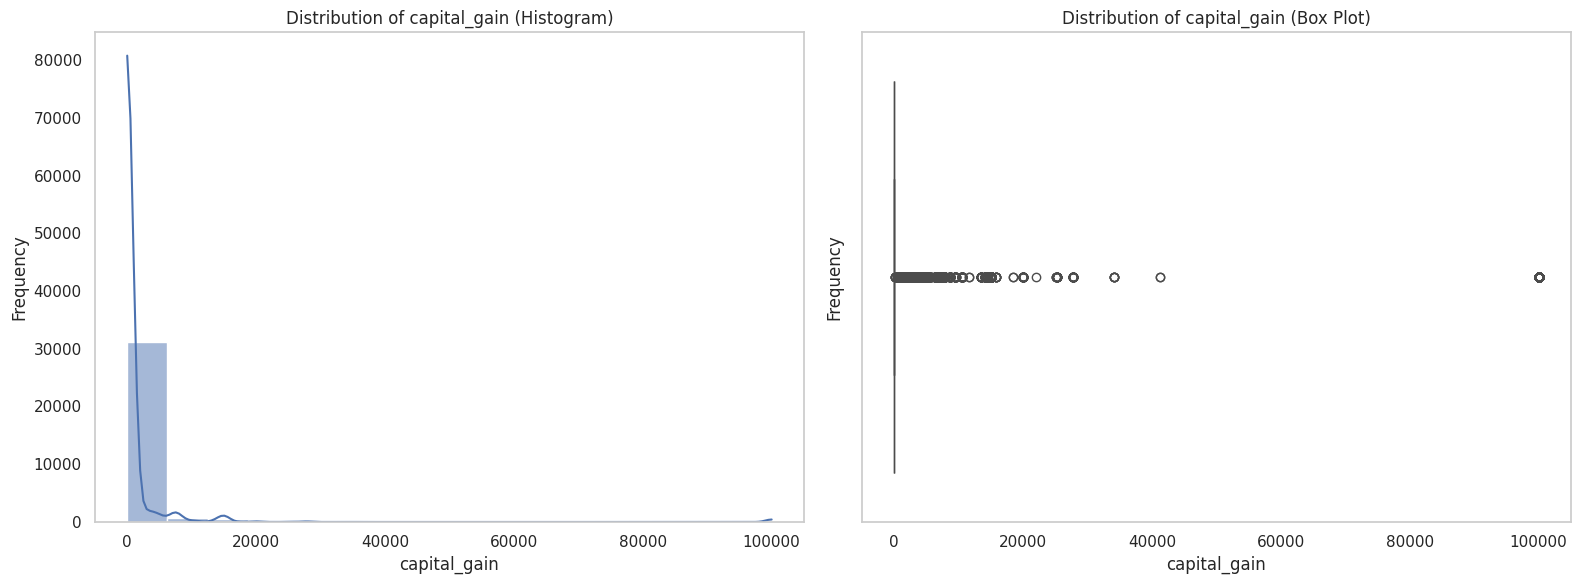

In [ ]:
# EDA for final Capital Gain
col = 'capital_gain'
# Display basic statistics
print(f"\nDescription of '{col}':")
display(df[col].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x=col, ax=axes[0], kde=True)
axes[0].set_title(f'Distribution of {col} (Histogram)')
axes[0].set_xlabel(col)
axes[0].set_ylabel('Frequency')
axes[0].grid(False) # Remove gridlines

# Box plot
sns.boxplot(data=df, x=col, ax=axes[1])
axes[1].set_title(f'Distribution of {col} (Box Plot)')
axes[1].set_xlabel(col)
axes[1].set_ylabel('Frequency')
axes[1].grid(False) # Remove gridlines

plt.tight_layout()
plt.show()

### Summary of Capital Gain Distribution:

The `capital_gain` column has been analyzed, revealing the following insights:

*   **Descriptive Statistics**: The values range from 0 to 99,999. The mean capital gain is approximately 1,077, but the median, 25th, and 75th percentiles are all 0. This indicates that a vast majority of individuals in the dataset have no capital gain.
*   **Histogram**: The histogram shows an extremely right-skewed distribution, with an overwhelming peak at 0. Most individuals have no capital gain, and very few have substantial gains. The values are sparse beyond zero, stretching towards the maximum.
*   **Box Plot**: The box plot clearly illustrates the extreme skewness and the presence of numerous outliers at the higher end. The box itself is compressed at 0, confirming that the bulk of the data points are zero, while the 'whiskers' and individual points extend far upwards, representing the few individuals with capital gains.

### Considerations for Modeling:

*   **Sparsity and Skewness**: The `capital_gain` feature is highly sparse (many zeros) and extremely right-skewed. Traditional regression models might struggle with this distribution. Direct use without transformation could lead to poor model performance.
*   **Feature Engineering**: It might be beneficial to engineer new features from `capital_gain`, such as:
    *   A binary indicator: `has_capital_gain` (1 if `capital_gain > 0`, else 0).
    *   Applying a power transformation or box-cox to reduce skewness, especially for non-zero values.
*   **Outliers**: The large values (up to 99,999) act as significant outliers. These might be capped values (e.g., gains above a certain threshold are all recorded as 99,999). It's important to consider if these extreme values genuinely represent the underlying process or are artifacts of data collection.
*   **Model Choice**: Some models, like tree-based models (e.g., Decision Trees, XGBoost), are naturally more robust to skewed data and outliers compared to linear models or SVMs, which might require more aggressive preprocessing.


Description of 'capital_loss':


count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

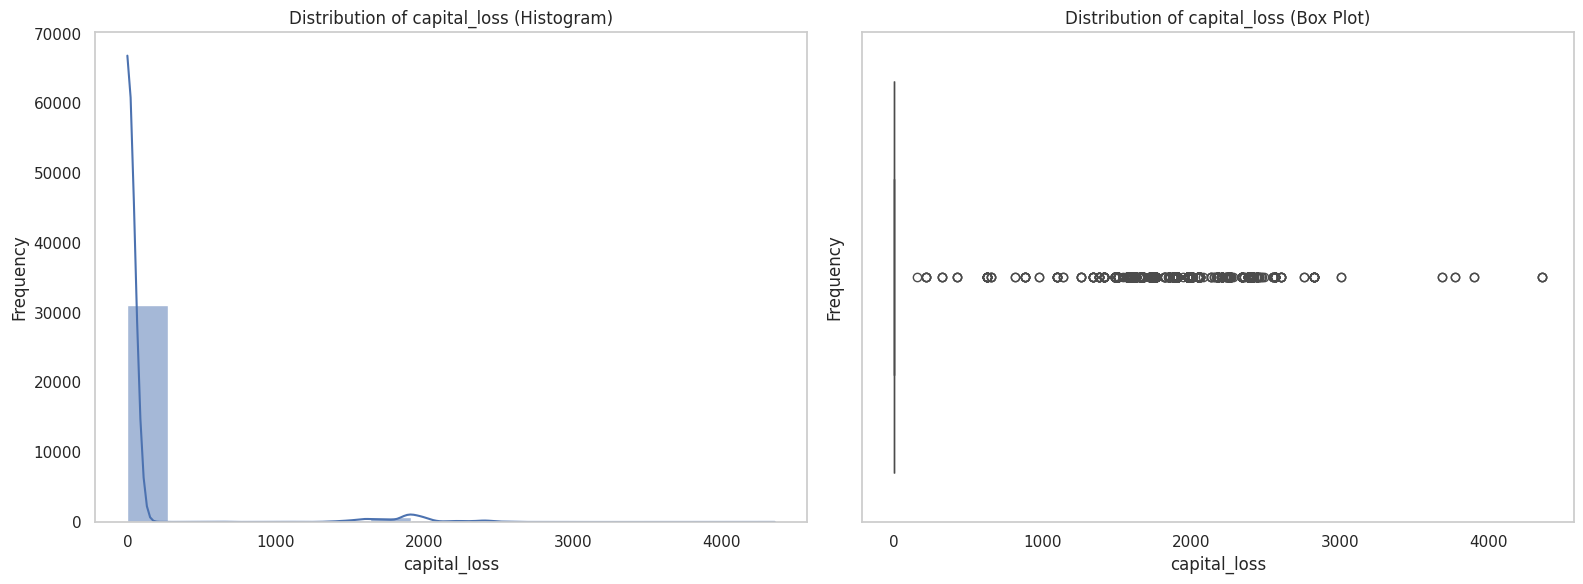

In [ ]:
# EDA for final Capital Loss
col = 'capital_loss'
# Display basic statistics
print(f"\nDescription of '{col}':")
display(df[col].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x=col, ax=axes[0], kde=True)
axes[0].set_title(f'Distribution of {col} (Histogram)')
axes[0].set_xlabel(col)
axes[0].set_ylabel('Frequency')
axes[0].grid(False) # Remove gridlines

# Box plot
sns.boxplot(data=df, x=col, ax=axes[1])
axes[1].set_title(f'Distribution of {col} (Box Plot)')
axes[1].set_xlabel(col)
axes[1].set_ylabel('Frequency')
axes[1].grid(False) # Remove gridlines

plt.tight_layout()
plt.show()

### Summary of Capital Loss Distribution:

The `capital_loss` column has been analyzed, revealing the following insights:

*   **Descriptive Statistics**: The values range from 0 to 4,356. Similar to capital gain, the mean capital loss is approximately 87.5, but the median, 25th, and 75th percentiles are all 0. This indicates that an even larger majority of individuals in the dataset have no capital loss.
*   **Histogram**: The histogram shows an extremely right-skewed distribution, with a very prominent peak at 0. Most individuals experience no capital loss, and only a small fraction have recorded losses, which are distributed across a relatively wide range.
*   **Box Plot**: The box plot clearly illustrates the extreme skewness, with the bulk of the data points clustered at 0. The presence of numerous outliers on the higher end indicates that while most people have no capital loss, a few individuals have substantial losses.

### Considerations for Modeling:

*   **Sparsity and Skewness**: The `capital_loss` feature is highly sparse (many zeros) and extremely right-skewed. This characteristic is very similar to `capital_gain` and poses similar challenges for traditional regression models.
*   **Feature Engineering**: Similar to `capital_gain`, it would be beneficial to engineer new features, such as:
    *   A binary indicator: `has_capital_loss` (1 if `capital_loss > 0`, else 0).
    *   Applying a transformation like `np.log1p(capital_loss)` to reduce skewness for non-zero values.
*   **Combined Feature**: Given the nature of `capital_gain` and `capital_loss` representing financial events, a combined feature such as `net_capital_change` (capital_gain - capital_loss) might be more informative for some models.
*   **Model Choice**: Tree-based models (e.g., Decision Trees, XGBoost) are generally more robust to skewed data and the presence of many zero values compared to linear models, making them suitable choices for this feature.


Description of 'hours_per_week':


count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

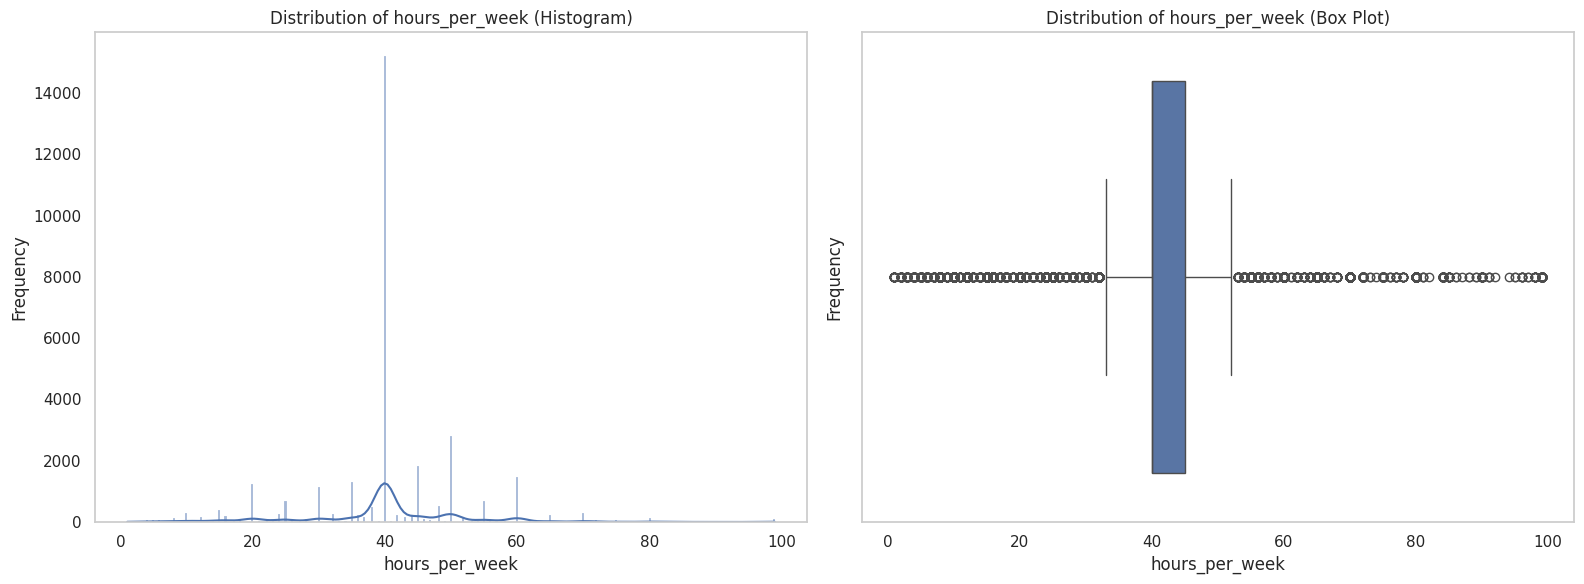

In [ ]:
# EDA for Hours Per Week
col = 'hours_per_week'
# Display basic statistics
print(f"\nDescription of '{col}':")
display(df[col].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x=col, ax=axes[0], kde=True)
axes[0].set_title(f'Distribution of {col} (Histogram)')
axes[0].set_xlabel(col)
axes[0].set_ylabel('Frequency')
axes[0].grid(False) # Remove gridlines

# Box plot
sns.boxplot(data=df, x=col, ax=axes[1])
axes[1].set_title(f'Distribution of {col} (Box Plot)')
axes[1].set_xlabel(col)
axes[1].set_ylabel('Frequency')
axes[1].grid(False) # Remove gridlines

plt.tight_layout()
plt.show()

### Summary of Hours Per Week Distribution:

The `hours_per_week` column, our target variable, has been analyzed, revealing the following insights:

*   **Descriptive Statistics**: The hours worked per week range from 1 to 99. The mean is approximately 40.4 hours, with a standard deviation of about 12.3 hours. The median is 40 hours, which is a common full-time work week. The 25th percentile is 35 hours and the 75th percentile is 45 hours.
*   **Histogram**: The histogram shows a strong peak at 40 hours per week, indicating that this is the most common number of hours worked. There are also smaller peaks at other common work durations (e.g., 20, 50, 60 hours). The distribution appears somewhat right-skewed, with a longer tail towards higher hours, but is generally concentrated around typical full-time employment.
*   **Box Plot**: The box plot confirms the strong concentration around 40 hours. It also reveals a significant number of outliers, particularly at lower (e.g., 1-10 hours) and higher (e.g., 70-99 hours) ends of the spectrum, representing individuals working part-time or exceptionally long hours.

### Considerations for Modeling:

*   **Target Variable Nature**: `hours_per_week` is a continuous numerical variable, making regression models appropriate. However, it exhibits a discrete-like nature with clear peaks at common working hours, particularly 40 hours.
*   **Skewness and Peaks**: While not as extremely skewed as `capital_gain` or `capital_loss`, the distribution is not perfectly normal. The prominent peak at 40 hours and other smaller peaks suggest that some models might benefit from understanding these common values. This distribution might be well-suited for models that can handle such patterns directly or indirectly.
*   **Outliers**: The presence of outliers at both low and high ends of hours worked per week should be noted. Depending on the chosen model, these outliers might need careful treatment (e.g., robust regression techniques, winsorization, or transforming the target).
*   **Model Choice**: Given its non-Gaussian, discrete-like distribution with a strong mode, models like Negative Binomial Regression (if treated as count data) or tree-based models (which are robust to such distributions) could be strong candidates. Linear models might struggle without proper transformation or if the assumption of normality of residuals is violated. XGBoost, as planned, is often robust to these characteristics.


Value counts for 'education':


education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

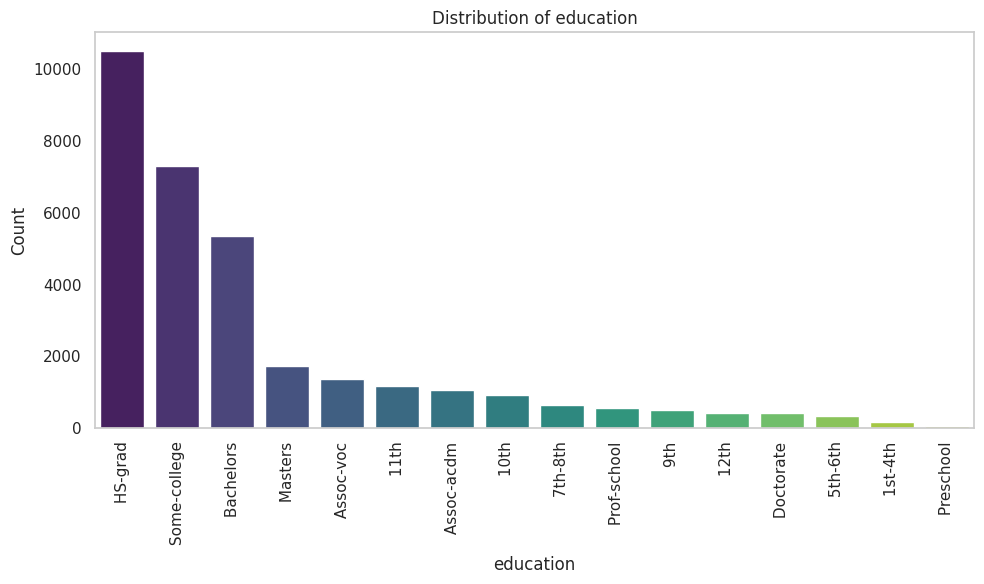

In [ ]:
# EDA for Education
col = 'education'
print(f"\nValue counts for '{col}':")
display(df[col].value_counts())

# Visualize the distribution of the column
plt.figure(figsize=(10, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df[col].value_counts().index
sns.countplot(data=df, x=col, order=nrc_desc_order, palette='viridis')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()

### Summary of Education Distribution:

The `education` column, a categorical variable, has been analyzed, revealing the following insights:

*   **Value Counts**: The most frequent education level is 'HS-grad' (High School Graduate) with 10,501 individuals, followed by 'Some-college' (7,291) and 'Bachelors' (5,355). This indicates a significant portion of the dataset comprises individuals with a high school diploma or some college education. Less common categories include 'Preschool', '1st-4th', and '5th-6th'.
*   **Distribution**: The distribution is heavily concentrated around 'HS-grad' and 'Some-college', suggesting that these education levels are most prevalent in the dataset. There's a gradual decrease in frequency as educational attainment increases or decreases from these middle levels.

### Considerations for Modeling:

*   **Categorical Nature**: `education` is a nominal categorical variable. It needs to be converted into a numerical format suitable for machine learning models.
*   **Encoding Strategy**: One-Hot Encoding is a common approach for categorical variables, creating new binary columns for each category. However, given there are 16 unique education levels, One-Hot Encoding could lead to a high-dimensional feature space, which might be an issue for some models. Alternatively, approaches like Target Encoding or creating fewer, broader categories could be considered if dimensionality becomes a concern.
*   **Ordinality**: Although 'education' has a seemingly ordinal structure (e.g., 'Preschool' < '1st-4th' < ... < 'Doctorate'), treating it as purely ordinal might not always be appropriate if the 'distance' between categories isn't uniform. The `education_num` column already provides an ordinal numerical representation, which could be used directly, but its relationship with `education` needs to be considered to avoid redundancy or multicollinearity if both are used.
*   **Redundancy**: The presence of `education_num` (a numerical representation of `education`) means one of these columns might be redundant if both are included without careful consideration. It's often better to choose one or derive new features from them.
*   **Impact on Target**: Education level is expected to be a significant predictor of `hours_per_week`, as higher education often correlates with specific job types and work commitments. Models should be able to capture these relationships effectively once the feature is properly encoded.


Value counts for 'education_num':


education_num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

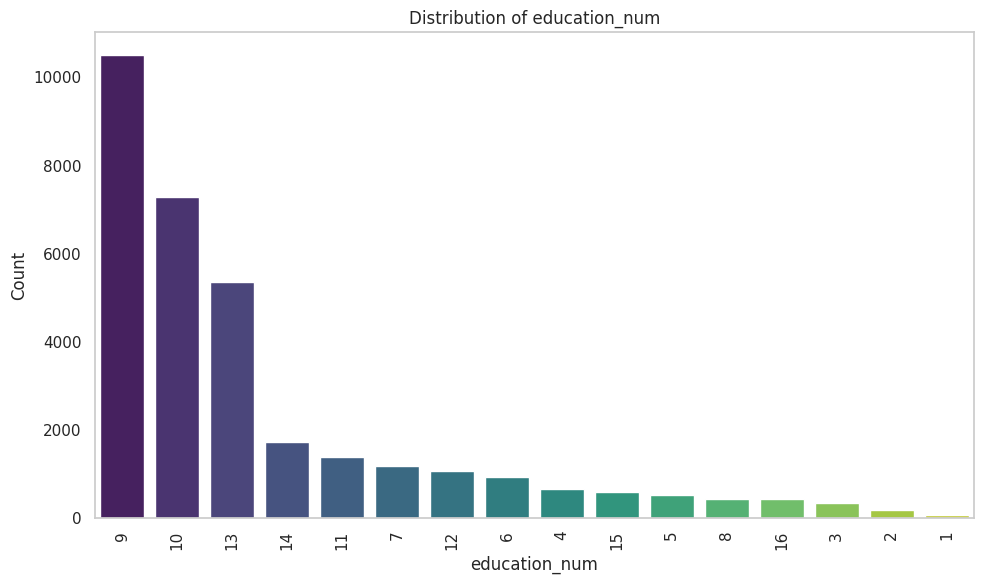

In [ ]:
# EDA for Education Number
col = 'education_num'
print(f"\nValue counts for '{col}':")
display(df[col].value_counts())

# Visualize the distribution of the column
plt.figure(figsize=(10, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df[col].value_counts().index
sns.countplot(data=df, x=col, order=nrc_desc_order, palette='viridis')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()

### Summary of Education Number Distribution:

The `education_num` column, a numerical representation of educational attainment, has been analyzed, revealing the following insights:

*   **Value Counts and Descriptive Statistics**: The values range from 1 to 16, directly mapping to the 16 education levels present in the `education` column. The most frequent `education_num` is 9 (corresponding to 'HS-grad'), followed by 10 ('Some-college') and 13 ('Bachelors'). The distribution largely mirrors that of the `education` column.
*   **Distribution**: The count plot confirms the concentration around `education_num` values of 9, 10, and 13, reflecting the prevalence of high school, some college, and bachelor's degree holders. The distribution shows a general increase in frequency up to `education_num` of 9 or 10, followed by a decline for higher educational attainment.

### Considerations for Modeling:

*   **Ordinal Nature**: `education_num` is an ordinal numerical feature, meaning there's a clear order to the categories (e.g., higher numbers indicate more education). This makes it directly usable in many machine learning models without explicit encoding, unlike the nominal `education` column.
*   **Redundancy with `education`**: Since `education_num` is a direct numerical mapping of `education`, using both simultaneously can lead to multicollinearity and redundancy. It is generally advisable to choose one. Given its ordinal nature, `education_num` is often preferred over one-hot encoding `education` if the model can interpret ordinal relationships.
*   **Direct Use**: Many regression models can directly interpret `education_num` as a continuous or ordinal feature, assuming a linear or monotonic relationship between educational attainment and the target variable (`hours_per_week`). Tree-based models are particularly adept at handling such features.


Value counts for 'workclass':


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

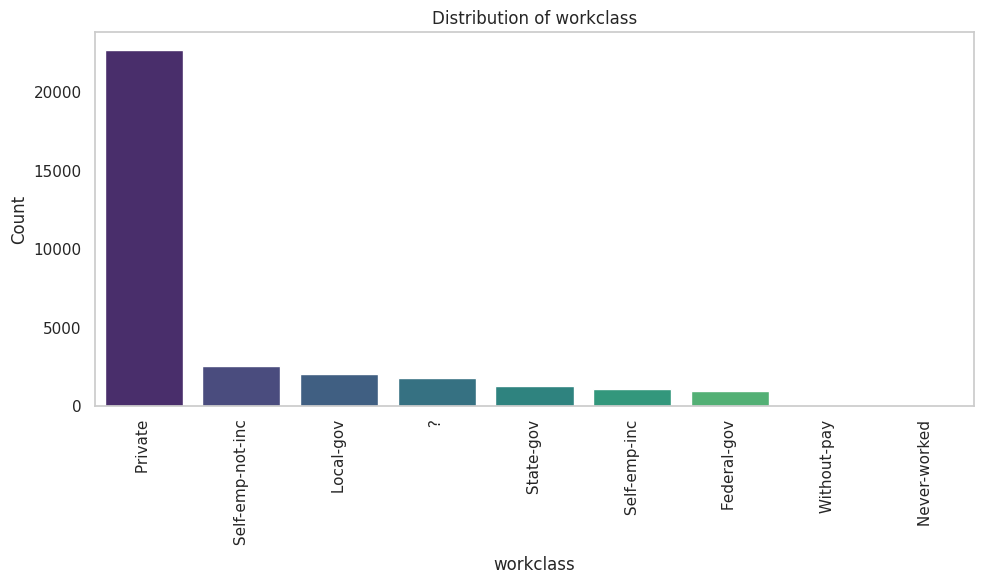

In [ ]:
# EDA for Work Class
col = 'workclass'
print(f"\nValue counts for '{col}':")
display(df[col].value_counts())

# Visualize the distribution of the column
plt.figure(figsize=(10, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df[col].value_counts().index
sns.countplot(data=df, x=col, order=nrc_desc_order, palette='viridis')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()

### Summary of Workclass Distribution:

The `workclass` column, a categorical variable, has been analyzed, revealing the following insights:

*   **Value Counts**: The most frequent workclass is 'Private', accounting for a vast majority of the dataset (around 74%). Other significant categories include 'Self-emp-not-inc', 'Local-gov', 'State-gov', and 'Federal-gov'. There are also less common categories like 'Without-pay' and 'Never-worked'.
*   **Distribution**: The distribution is heavily skewed towards 'Private' workclass. The remaining categories represent a much smaller portion of the working population in the dataset. The presence of ' ?' entries during initial loading indicated missing values, which would have been handled by `na_values=" ?"` during `pd.read_csv`.

### Considerations for Modeling:

*   **Categorical Nature**: `workclass` is a nominal categorical variable. It needs to be converted into a numerical format suitable for machine learning models.
*   **Encoding Strategy**: One-Hot Encoding is a common and suitable approach for this feature. Since there are a moderate number of categories (7 distinct categories after handling '?' as NaN, and then potentially imputing or dropping those), one-hot encoding should not lead to an excessively high-dimensional feature space.
*   **Missing Values**: If the ' ?' values were treated as actual categories rather than NaN, they would need to be addressed either through imputation, removal, or by treating them as a separate category. However, since they were correctly interpreted as NaN, they would typically be handled during preprocessing (e.g., imputation with the most frequent category or 'Unknown', or removal of rows if few).
*   **Impact on Target**: Workclass is expected to be a relevant predictor for `hours_per_week`, as different work environments (e.g., private sector, government, self-employment) often have varying typical work hours and patterns.


Value counts for 'marital_status':


marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

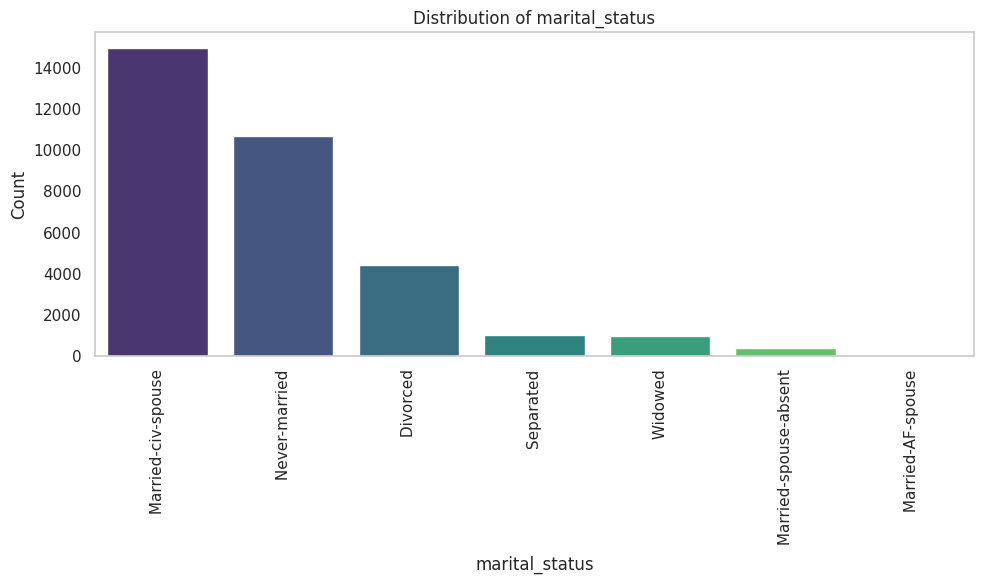

In [ ]:
# EDA for Marital Status
col = 'marital_status'
print(f"\nValue counts for '{col}':")
display(df[col].value_counts())

# Visualize the distribution of the column
plt.figure(figsize=(10, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df[col].value_counts().index
sns.countplot(data=df, x=col, order=nrc_desc_order, palette='viridis')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()

### Summary of Marital Status Distribution:

The `marital_status` column, a categorical variable, has been analyzed, revealing the following insights:

*   **Value Counts**: The most frequent marital status is 'Married-civ-spouse' (14,976 individuals), followed closely by 'Never-married' (10,683). Other significant categories include 'Divorced' (4,443) and 'Separated' (1,025). Less common statuses are 'Widowed', 'Married-spouse-absent', and 'Married-AF-spouse'.
*   **Distribution**: The distribution shows that 'Married-civ-spouse' and 'Never-married' statuses represent the largest segments of the dataset. This indicates a binary-like split between individuals who are currently married and those who have never been married, with smaller proportions for other statuses resulting from marriage dissolution or absence.

### Considerations for Modeling:

*   **Categorical Nature**: `marital_status` is a nominal categorical variable. It needs to be converted into a numerical format suitable for machine learning models.
*   **Encoding Strategy**: One-Hot Encoding is a common and appropriate approach for this feature, as there are a relatively small number of distinct categories (7 unique values). This will create new binary columns for each status, allowing models to interpret them without assuming any ordinal relationship.
*   **Impact on Target**: Marital status is expected to be a relevant predictor for `hours_per_week`. For example, individuals who are 'Married-civ-spouse' might have different work-hour patterns due to household responsibilities or financial needs compared to 'Never-married' individuals or those in other marital statuses.


Value counts for 'occupation':


occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

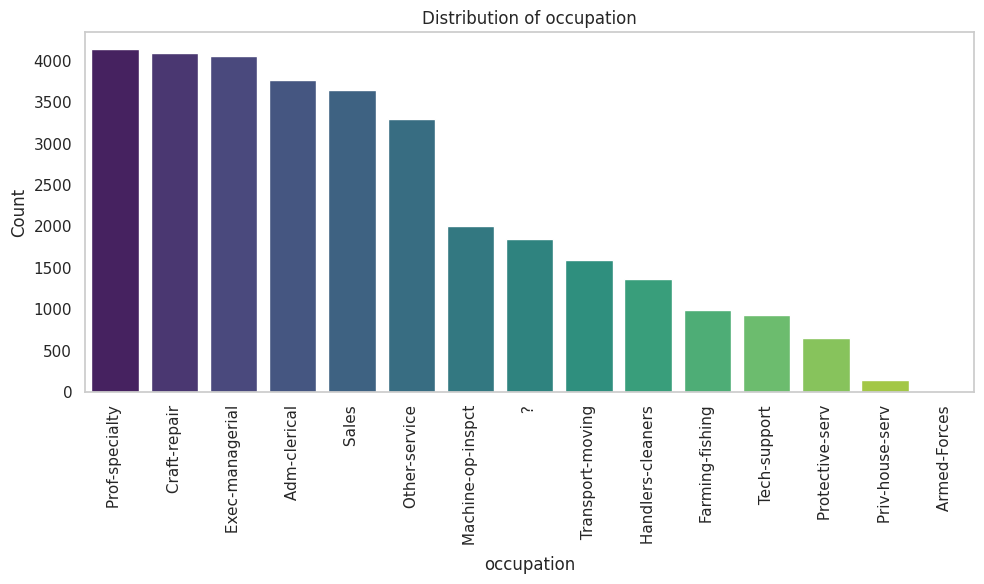

In [ ]:
# EDA for Occupation
col = 'occupation'
print(f"\nValue counts for '{col}':")
display(df[col].value_counts())

# Visualize the distribution of the column
plt.figure(figsize=(10, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df[col].value_counts().index
sns.countplot(data=df, x=col, order=nrc_desc_order, palette='viridis')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()

### Summary of Occupation Distribution:

The `occupation` column, a categorical variable, has been analyzed, revealing the following insights:

*   **Value Counts**: The most frequent occupations are 'Prof-specialty' (4,140 individuals) and 'Craft-repair' (4,099), followed by 'Exec-managerial' (4,066) and 'Adm-clerical' (3,770). There's a relatively even distribution across several of the more common occupations, with less frequent categories like 'Armed-Forces' at the lower end.
*   **Distribution**: The distribution shows a good spread across various occupations, although some categories are more prevalent than others. This suggests a diverse representation of professions within the dataset. The initial presence of ' ?' entries during data loading indicates missing values in this column, which were handled by `na_values=" ?"`.

### Considerations for Modeling:

*   **Categorical Nature**: `occupation` is a nominal categorical variable. It needs to be converted into a numerical format suitable for machine learning models.
*   **Encoding Strategy**: One-Hot Encoding is a common approach for this feature. Given that there are 14 unique occupations, One-Hot Encoding will create 14 new binary columns. This is a manageable number, but it's important to consider if any categories have very low frequencies, as these might be grouped or handled separately to avoid sparse features.
*   **Missing Values**: As with `workclass`, the ' ?' values (now `NaN`) in `occupation` would require careful handling. Common strategies include imputation with the mode (most frequent category), or treating 'Unknown' as a separate category if appropriate, or dropping rows with missing values if their count is small.
*   **Impact on Target**: Occupation is expected to be a very strong predictor of `hours_per_week`, as different professions typically involve different work hour expectations and patterns. Models should be able to capture these relationships effectively once the feature is properly encoded.


Value counts for 'relationship':


relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

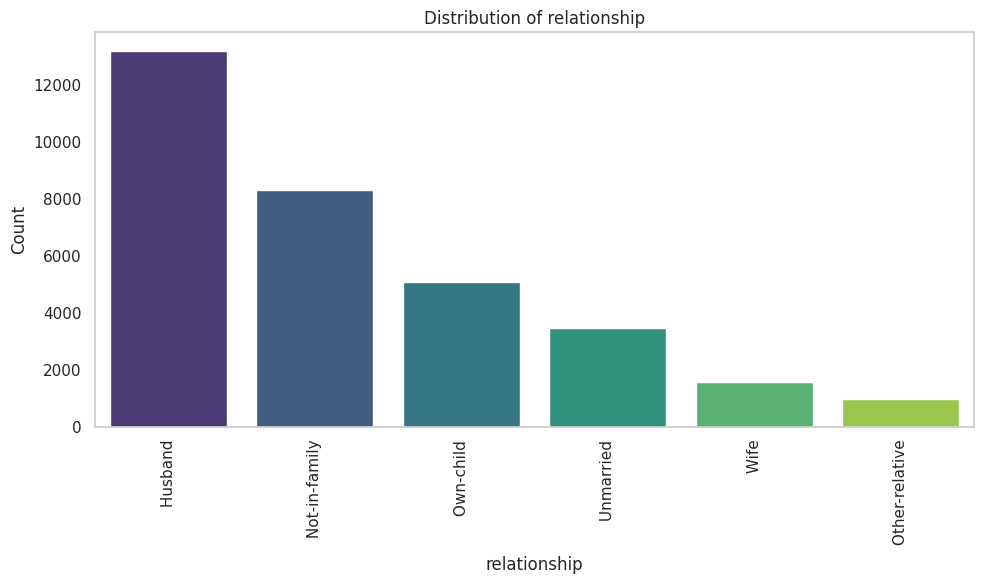

In [ ]:
# EDA for Relationship
col = 'relationship'
print(f"\nValue counts for '{col}':")
display(df[col].value_counts())

# Visualize the distribution of the column
plt.figure(figsize=(10, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df[col].value_counts().index
sns.countplot(data=df, x=col, order=nrc_desc_order, palette='viridis')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()

### Summary of Relationship Distribution:

The `relationship` column, a categorical variable, has been analyzed, revealing the following insights:

*   **Value Counts**: The most frequent relationship status is 'Husband' (13,193 individuals), followed by 'Not-in-family' (8,305) and 'Own-child' (5,068). This indicates a significant portion of the dataset consists of married men and individuals not part of a traditional family unit, or children of the household head. Other categories like 'Unmarried', 'Wife', and 'Other-relative' are less frequent.
*   **Distribution**: The distribution is heavily skewed towards 'Husband', followed by 'Not-in-family' and 'Own-child', reflecting the common family structures and living arrangements in the dataset.

### Considerations for Modeling:

*   **Categorical Nature**: `relationship` is a nominal categorical variable. It needs to be converted into a numerical format suitable for machine learning models.
*   **Encoding Strategy**: One-Hot Encoding is a common and appropriate approach for this feature, as there are a relatively small number of distinct categories (6 unique values). This will create new binary columns for each status, allowing models to interpret them without assuming any ordinal relationship.
*   **Potential Redundancy/Correlation**: This feature might be correlated with `marital_status` and `sex`. Care should be taken to avoid multicollinearity if highly correlated features are included in certain models. For example, 'Husband' implies 'Male' and 'Married', and 'Wife' implies 'Female' and 'Married'.
*   **Impact on Target**: Relationship status is likely to be a relevant predictor for `hours_per_week`, as different family roles and responsibilities can influence an individual's labor supply.


Value counts for 'race':


race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

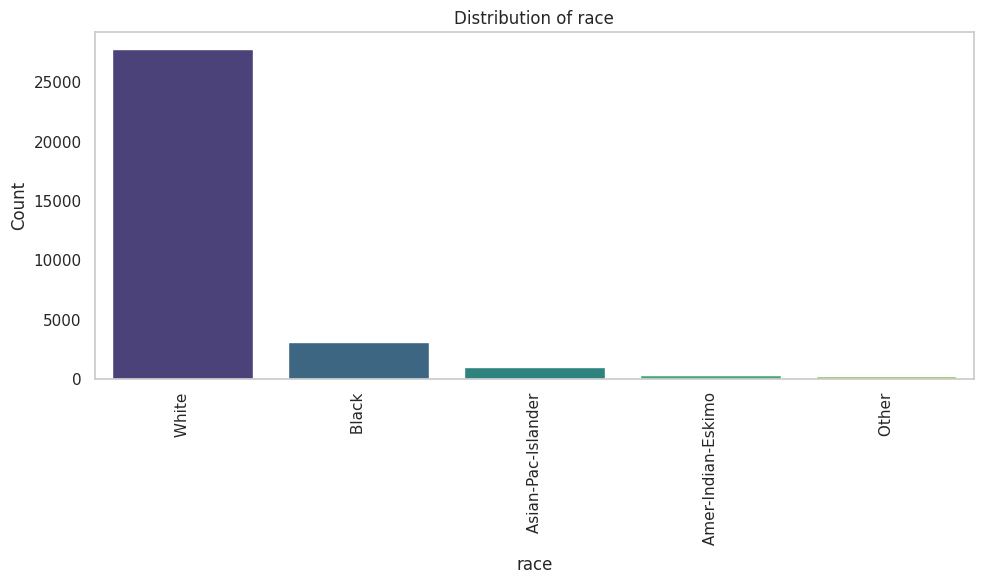

In [ ]:
# EDA for Race
col = 'race'
print(f"\nValue counts for '{col}':")
display(df[col].value_counts())

# Visualize the distribution of the column
plt.figure(figsize=(10, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df[col].value_counts().index
sns.countplot(data=df, x=col, order=nrc_desc_order, palette='viridis')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()

### Summary of Race Distribution:

The `race` column, a categorical variable, has been analyzed, revealing the following insights:

*   **Value Counts**: The most frequent race is 'White' (27,816 individuals), representing the overwhelming majority of the dataset. This is followed by 'Black' (3,124), 'Asian-Pac-Islander' (1,039), 'Amer-Indian-Eskimo' (311), and 'Other' (271). This indicates a significant imbalance in the representation of different racial groups.
*   **Distribution**: The distribution is heavily skewed towards the 'White' category, with other racial groups having significantly smaller counts. This imbalance is important to note for any analysis or modeling that follows.

### Considerations for Modeling:

*   **Categorical Nature**: `race` is a nominal categorical variable. It needs to be converted into a numerical format suitable for machine learning models.
*   **Encoding Strategy**: One-Hot Encoding is a common and appropriate approach for this feature, as there are a relatively small number of distinct categories (5 unique values). This will create new binary columns for each race, allowing models to interpret them without assuming any ordinal relationship.
*   **Class Imbalance**: The heavily imbalanced distribution of racial categories, particularly the dominance of 'White', could potentially lead to models that perform very well on the majority class but poorly on minority classes. This is a common issue in machine learning and might require special handling, such as: (1) **Resampling techniques** (oversampling minority classes, undersampling majority classes), (2) **Cost-sensitive learning** (assigning different misclassification costs), or (3) **Evaluation metrics** that are robust to imbalance (e.g., precision, recall, F1-score, ROC-AUC) rather than just accuracy.
*   **Bias and Fairness**: Given the sensitive nature of race, it's crucial to be aware of potential biases that could be introduced or amplified by the model. Fairness considerations should be a priority, ensuring that the model does not disproportionately impact or discriminate against certain racial groups. Post-hoc fairness analysis and mitigation techniques might be necessary.


Value counts for 'sex':


sex
Male      21790
Female    10771
Name: count, dtype: int64

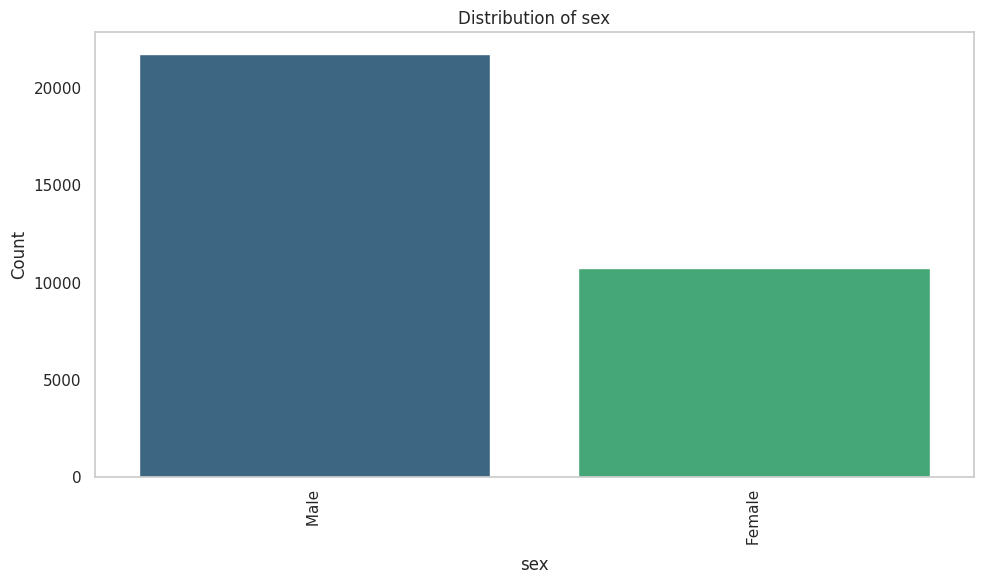

In [ ]:
# EDA for Sex
col = 'sex'
print(f"\nValue counts for '{col}':")
display(df[col].value_counts())

# Visualize the distribution of the column
plt.figure(figsize=(10, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df[col].value_counts().index
sns.countplot(data=df, x=col, order=nrc_desc_order, palette='viridis')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()

### Summary of Sex Distribution:

The `sex` column, a categorical variable, has been analyzed, revealing the following insights:

*   **Value Counts**: The dataset contains a majority of 'Male' individuals (21,790) compared to 'Female' individuals (10,771). This indicates a significant imbalance in the representation of genders within the dataset.
*   **Distribution**: The distribution clearly shows that males constitute approximately two-thirds of the dataset, while females make up the remaining one-third.

### Considerations for Modeling:

*   **Categorical Nature**: `sex` is a nominal categorical variable. It needs to be converted into a numerical format suitable for machine learning models.
*   **Encoding Strategy**: Given that there are only two unique categories ('Male', 'Female'), a simple binary encoding (e.g., 0 for Female, 1 for Male) or One-Hot Encoding would be appropriate and straightforward.
*   **Class Imbalance**: The imbalance in gender representation (more males than females) could potentially influence model training. While many models are robust to moderate imbalances, it's worth monitoring performance across both groups, especially if gender-specific predictions or fairness are important. Techniques like stratified sampling during train-test split can help ensure representative samples in both training and testing datasets.
*   **Impact on Target**: `sex` is often a significant predictor for `hours_per_week` due to historical and societal labor market patterns, and potentially different work-life balance choices. Models should be able to capture these relationships effectively once the feature is properly encoded.


Value counts for 'native_country':


native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                           29
Ecuador                          28
Ireland                          24
Hong                             20
Trinadad&Tobago                  19
Cambodia                         19
Thailand                         18
Laos                             18
Yugoslavia                       16
Outlying-US(Guam-USVI-etc)       14
Honduras                         13
Hungary                          13
Scotland                         12
Holand-Netherlands                1
Name: count, dtype: int64

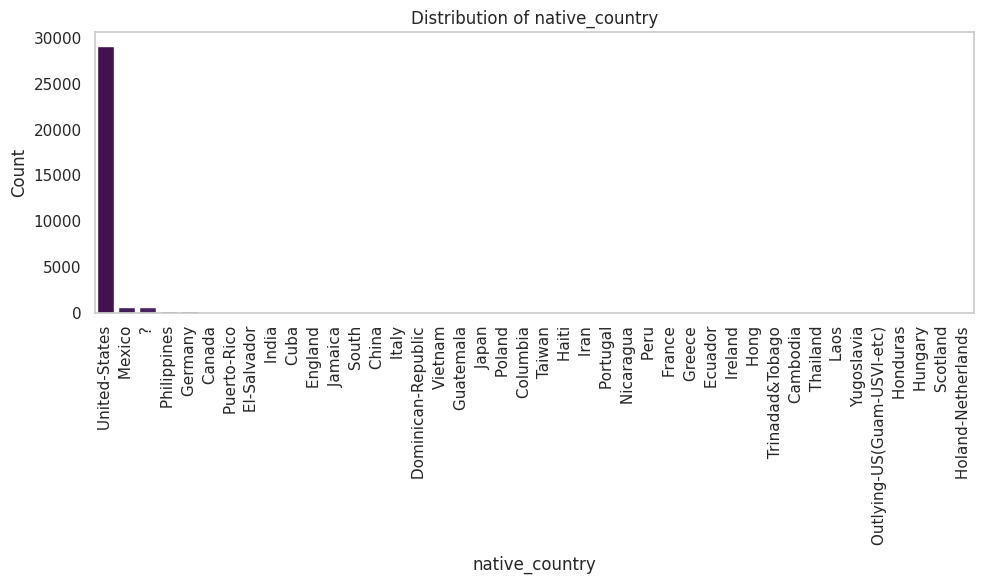

In [ ]:
# EDA for Native Country
col = 'native_country'
print(f"\nValue counts for '{col}':")
display(df[col].value_counts())

# Visualize the distribution of the column
plt.figure(figsize=(10, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df[col].value_counts().index
sns.countplot(data=df, x=col, order=nrc_desc_order, palette='viridis')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()

### Summary of Native Country Distribution:

The `native_country` column, a categorical variable, has been analyzed, revealing the following insights:

*   **Value Counts**: The overwhelming majority of individuals in the dataset are from 'United-States' (29,170). The remaining 40 unique countries or regions have significantly smaller counts, ranging from a few individuals to several hundred. This indicates a very strong imbalance in the representation of native countries.
*   **Distribution**: The distribution is extremely skewed towards 'United-States', making it a dominant category. Other countries are sparsely represented, with many having very low frequencies.

### Considerations for Modeling:

*   **Categorical Nature**: `native_country` is a nominal categorical variable. It needs to be converted into a numerical format suitable for machine learning models.
*   **Encoding Strategy**: One-Hot Encoding all 41 unique categories would result in a very high-dimensional and sparse feature space, which can negatively impact model performance and interpretability. Alternative strategies should be considered:
    *   **Group Infrequent Categories**: Combine all countries with very low counts into a single 'Other' category. This can reduce dimensionality while retaining general information.
    *   **Binary Indicator**: Create a binary feature `is_United-States` (1 if 'United-States', 0 otherwise). This is a simple way to capture the most significant distinction.
    *   **Target Encoding**: Encode categories based on the average `hours_per_week` for each country. This can capture the predictive power of the feature more efficiently.
*   **Missing Values**: The ' ?' values (now `NaN`) in `native_country` would require handling. Strategies include imputation (e.g., with 'United-States' if it's the majority, or 'Unknown'), or grouping them into the 'Other' category if one is created.
*   **Impact on Target**: While 'native_country' might have some predictive power, especially for the 'United-States' vs. 'non-United-States' distinction, its highly imbalanced nature and high cardinality for other categories suggest careful handling to avoid overfitting to rare categories or introducing noise.


Value counts for 'income':


income
<=50K    24720
>50K      7841
Name: count, dtype: int64

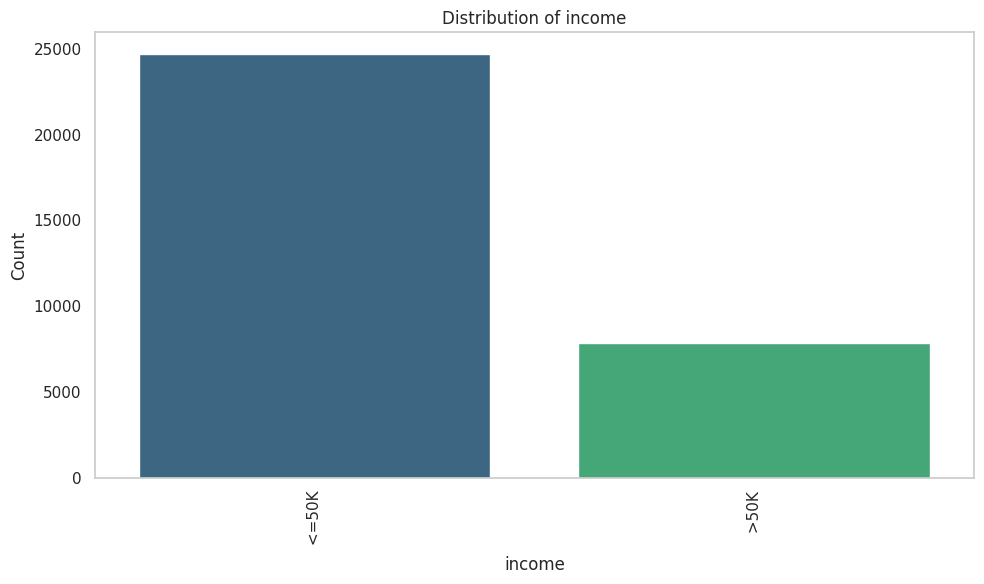

In [ ]:
# EDA for Income
col = 'income'
print(f"\nValue counts for '{col}':")
display(df[col].value_counts())

# Visualize the distribution of the column
plt.figure(figsize=(10, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df[col].value_counts().index
sns.countplot(data=df, x=col, order=nrc_desc_order, palette='viridis')
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()

### Summary of Income Distribution:

The `income` column, a categorical variable, has been analyzed, revealing the following insights:

*   **Value Counts**: The vast majority of individuals in the dataset (`<=50K`) represent 24,720 entries, while those earning `>50K` account for 7,841 entries. This shows a significant imbalance between the two income groups.
*   **Distribution**: The distribution is heavily skewed towards the lower income bracket (`<=50K`), with the higher income bracket (`>50K`) representing a smaller, yet substantial, portion of the dataset.

### Considerations for Modeling:

*   **Categorical Nature**: `income` is a nominal categorical variable. In its original context for the UCI Adult dataset, it was often the target variable for classification tasks (predicting whether income is above or below 50K). For *this* project, our target variable is `hours_per_week`, a continuous numerical variable. Therefore, the `income` column should be treated as an **independent feature** if it is deemed relevant to predicting `hours_per_week`.
*   **Encoding Strategy**: If `income` is used as a feature, it's a binary categorical variable, making simple binary encoding (e.g., 0 for `<=50K`, 1 for `>50K`) or One-Hot Encoding appropriate and efficient.
*   **Potential Relevance to Target**: It is reasonable to assume that individuals with higher income (or in the `>50K` category) might, on average, work a different number of hours per week than those with lower income. Therefore, `income` could be a relevant predictor for `hours_per_week`.

## 2.2 Bivariate Analysis

In [ ]:
# Identify continuous variables (numerical columns)
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Based on EDA, 'fnlwgt' is a statistical weight and 'education_num' is ordinal/categorical.
# 'hours_per_week' is our target variable but also numerical and continuous.
# Let's consider 'age', 'capital_gain', 'capital_loss', and 'hours_per_week' as continuous for now.

# Filter out 'fnlwgt' and 'education_num' if they are in the list for a cleaner 'continuous' list for modeling features
# For this display, we'll show all numerical, then note the exceptions.

print("All numerical columns identified:")
print(continuous_cols)

# Refined list of truly continuous-like features for modeling
truly_continuous_features = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']

print("\nPotential continuous variables for modeling (excluding statistical weights and ordinal numeric):")
print(truly_continuous_features)


All numerical columns identified:
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Potential continuous variables for modeling (excluding statistical weights and ordinal numeric):
['age', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
# Calculate the Spearman Rank Correlation Coefficient matrix for continuous variables
continuous_variables_for_corr = [col for col in truly_continuous_features  if col.strip() != 'hours_per_week']
correlation_matrix_spearman = df[continuous_variables_for_corr + ['hours_per_week']].corr(method='spearman')

print("Spearman Rank Correlation Matrix:")
display(correlation_matrix_spearman)


Spearman Rank Correlation Matrix:


age  capital_gain  capital_loss  hours_per_week
age             1.000000      0.124948      0.058484        0.142907
capital_gain    0.124948      1.000000     -0.066569        0.093322
capital_loss    0.058484     -0.066569      1.000000        0.059852
hours_per_week  0.142907      0.093322      0.059852        1.000000

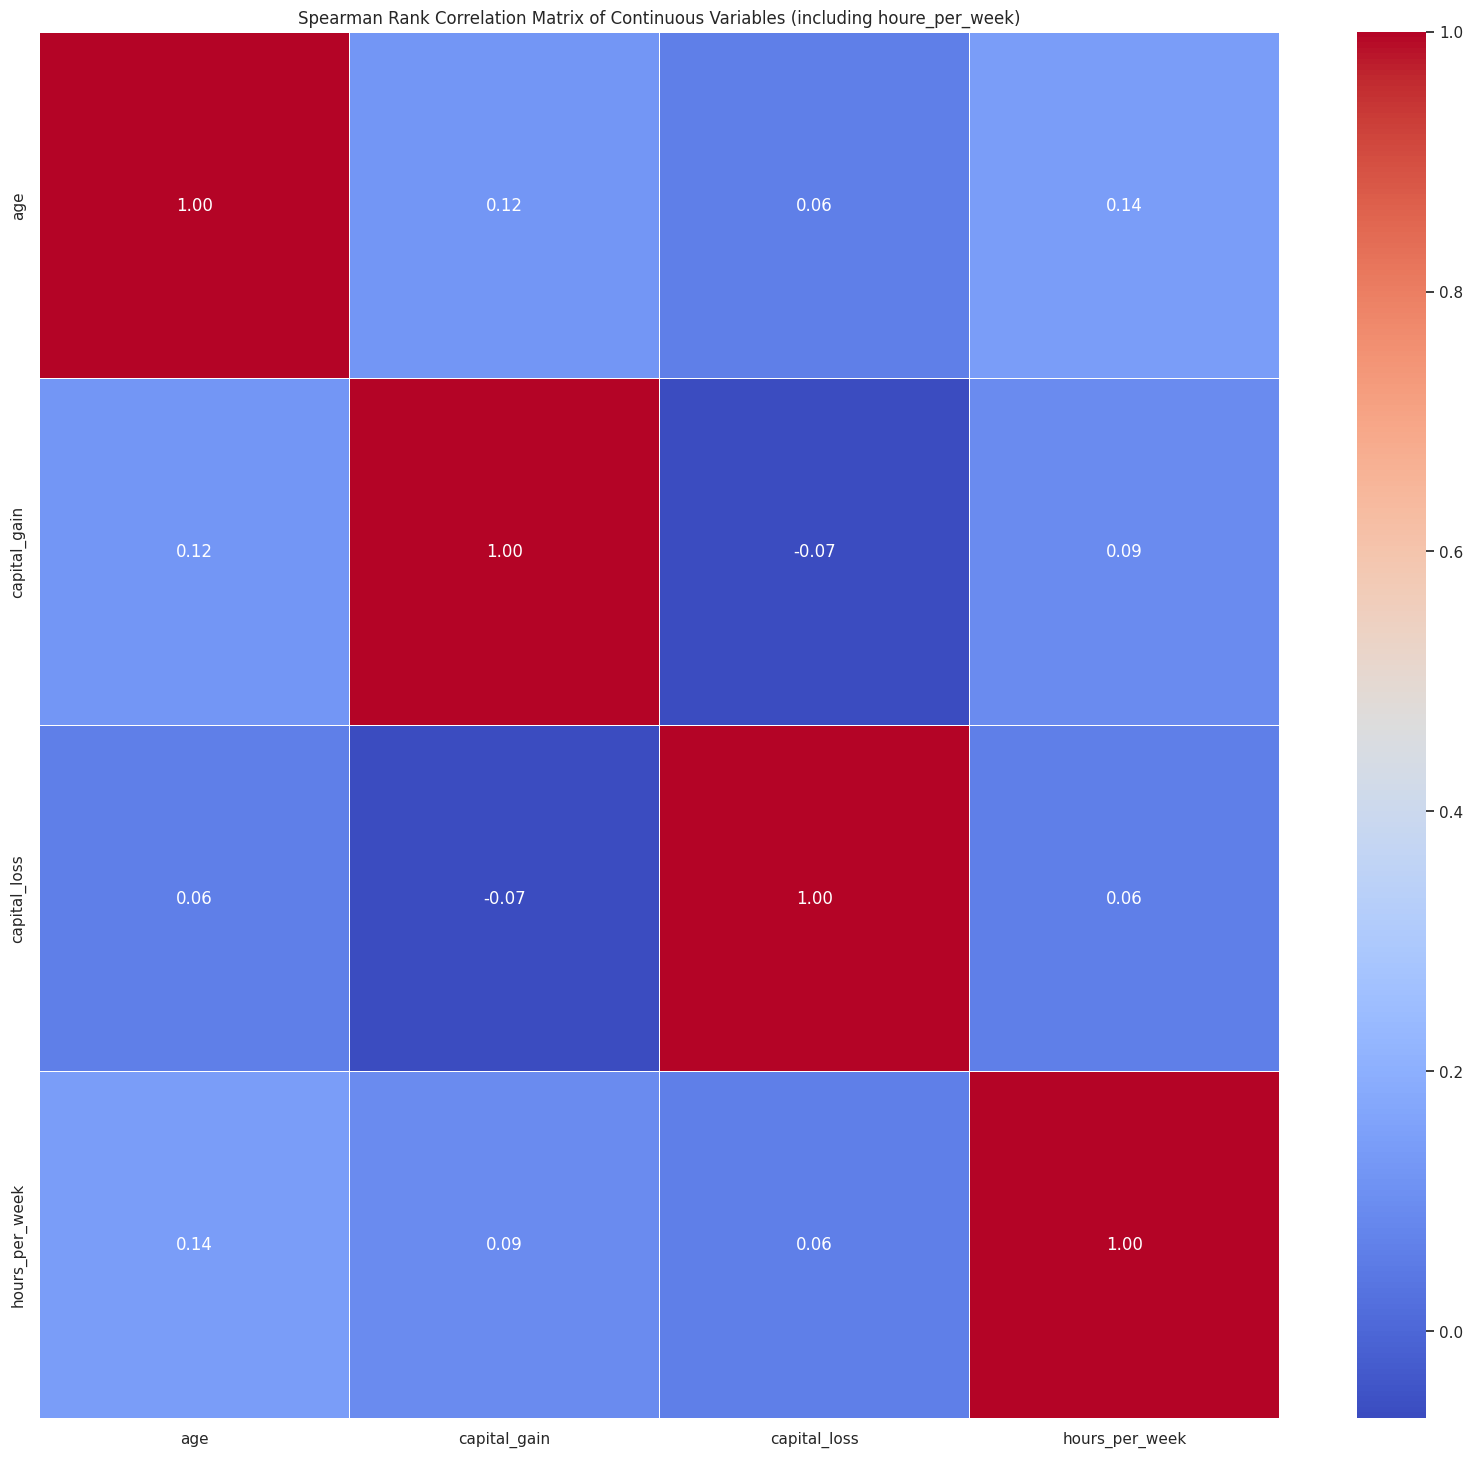

In [ ]:
# Visualize the Spearman Correlation Matrix using a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Rank Correlation Matrix of Continuous Variables (including houre_per_week)')
plt.show()


### Spearman Rank Correlation Matrix Analysis:

The Spearman Rank Correlation Matrix was calculated for the continuous variables: 'age', 'capital_gain', 'capital_loss', and our target variable 'hours_per_week'. This non-parametric correlation measure assesses the monotonic relationship between variables.

**Key Observations:**

1.  **Correlation with 'hours_per_week' (Target Variable):**
    *   **age vs. hours_per_week**: There is a weak positive correlation of **0.14**. This suggests that as age increases, there is a slight tendency for hours worked per week to also increase, although the relationship is not very strong.
    *   **capital_gain vs. hours_per_week**: A very weak positive correlation of **0.09** is observed. This indicates a minimal tendency for individuals with higher capital gains to work more hours, but the relationship is almost negligible.
    *   **capital_loss vs. hours_per_week**: A similarly very weak positive correlation of **0.06** exists. This suggests an extremely weak and barely noticeable tendency for individuals with higher capital losses to work more hours.

2.  **Correlations Among Independent Continuous Variables:**
    *   **age vs. capital_gain**: A weak positive correlation of **0.12** is present. Older individuals tend to have slightly higher capital gains, which is somewhat expected as wealth accumulates over time.
    *   **age vs. capital_loss**: A very weak positive correlation of **0.06** is observed. This indicates a minimal relationship between age and capital loss.
    *   **capital_gain vs. capital_loss**: A very weak negative correlation of **-0.07** is noted. This suggests a slight inverse relationship, meaning individuals who have capital gains are slightly less likely to have capital losses, and vice-versa, which makes intuitive sense as these often represent opposing financial outcomes. However, the correlation is very close to zero.The Spearman correlations among the continuous predictors (age, capital_gain, capital_loss) are all near zero—ranging from 0.06 to 0.12—indicating no meaningful multicollinearity. This suggests the variables are largely independent and can be safely included together in linear models without risking inflated coefficient variance or interpretation issues.

Overall, the Spearman correlations between 'hours_per_week' and the continuous independent variables ('age', 'capital_gain', 'capital_loss') are **weak to very weak**. 'Age' shows the strongest, yet still weak, positive correlation with 'hours_per_week'. 'Capital_gain' and 'capital_loss' exhibit extremely weak correlations with the target variable. The independent continuous variables also show weak inter-correlations. This suggests that these continuous variables, individually, might not be strong linear or monotonic predictors of 'hours_per_week' on their own, and other categorical features or non-linear relationships might play a more significant role. The extreme sparsity and skewed distributions of 'capital_gain' and 'capital_loss' (as observed in univariate analysis) likely contribute to their low correlation values with the target.


Mean 'hours_per_week' by education Level:


education
Prof-school     47.425347
Doctorate       46.973366
Masters         43.836332
Bachelors       42.614006
Assoc-voc       41.610709
HS-grad         40.575374
Assoc-acdm      40.504217
7th-8th         39.366873
5th-6th         38.897898
Some-college    38.852284
1st-4th         38.255952
9th             38.044747
10th            37.052519
Preschool       36.647059
12th            35.780600
11th            33.925957
Name: hours_per_week, dtype: float64

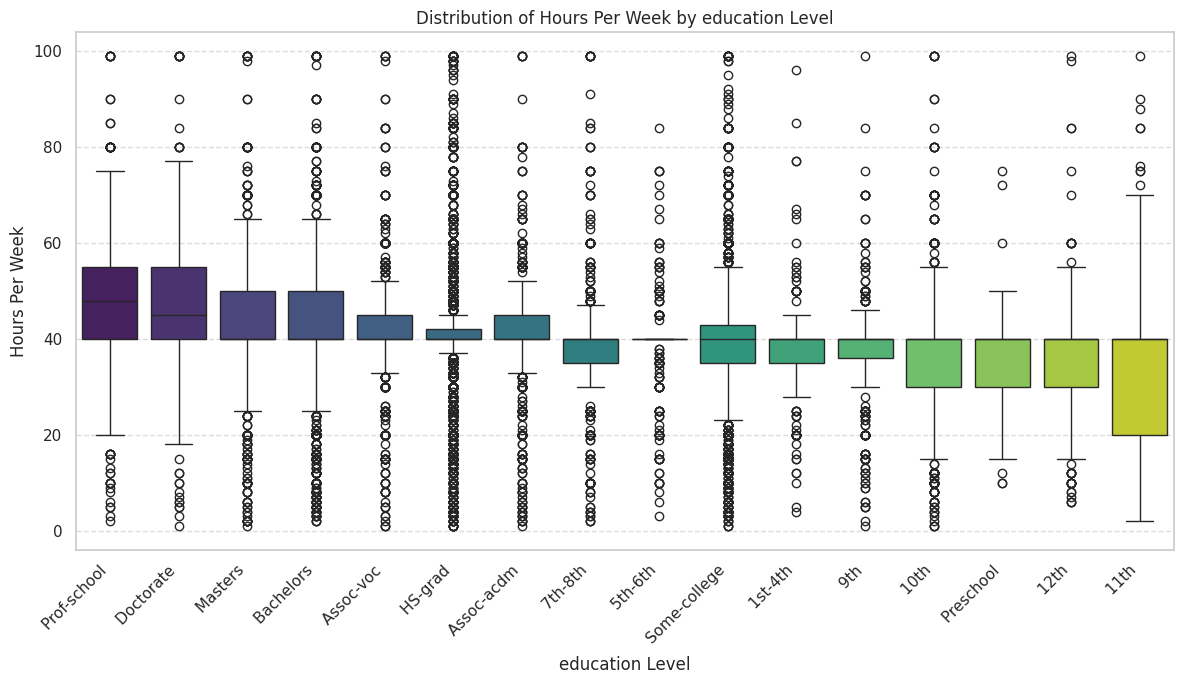


ANOVA F-statistic: 85.11
ANOVA P-value: 8.673e-258

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different education levels.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.


In [ ]:
# Calculate the mean hours per week for each education level
col='education'
mean_hours_per_week_by_education = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False)

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_education)

# Create a box plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(12, 7))
# Order the {col} levels by mean hours_per_week for better visualization
sns.boxplot(data=df, x=col, y='hours_per_week', order=mean_hours_per_week_by_education.index, palette='viridis')
plt.title(f'Distribution of Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
education_groups = []
for edu_level in df[col].unique():
    education_groups.append(df[df[col] == edu_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*education_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

### Summary of Bivariate Analysis: Education vs. Hours Per Week

The bivariate analysis between 'education' and 'hours_per_week' reveals a **statistically significant relationship**. The ANOVA test confirmed that there is a significant difference in the mean 'hours_per_week' across various education levels (p-value < 0.05).

**Key Findings:**
*   Higher education levels (e.g., Prof-school, Doctorate, Masters) are generally associated with higher mean 'hours_per_week', while lower education levels (e.g., 11th, 12th, Preschool) show lower means.
*   The box plot visually supported these differences, showing variations in median work hours, spread, and the presence of outliers across education groups.

**Considerations for Modeling:**
*   **Feature Importance**: 'Education' is clearly an important predictor for 'hours_per_week' and should be included in predictive models.
*   **Encoding**: Given the ordinal nature of education, using `education_num` directly as a numerical feature is a viable option. Alternatively, one-hot encoding the `education` column can be used, though this might create more features. The choice may depend on the specific model being used.


Mean 'hours_per_week' by workclass Level:


workclass
Self-emp-inc        48.818100
Self-emp-not-inc    44.421881
Federal-gov         41.379167
Local-gov           40.982800
Private             40.267096
State-gov           39.031587
Without-pay         32.714286
?                   31.919390
Never-worked        28.428571
Name: hours_per_week, dtype: float64

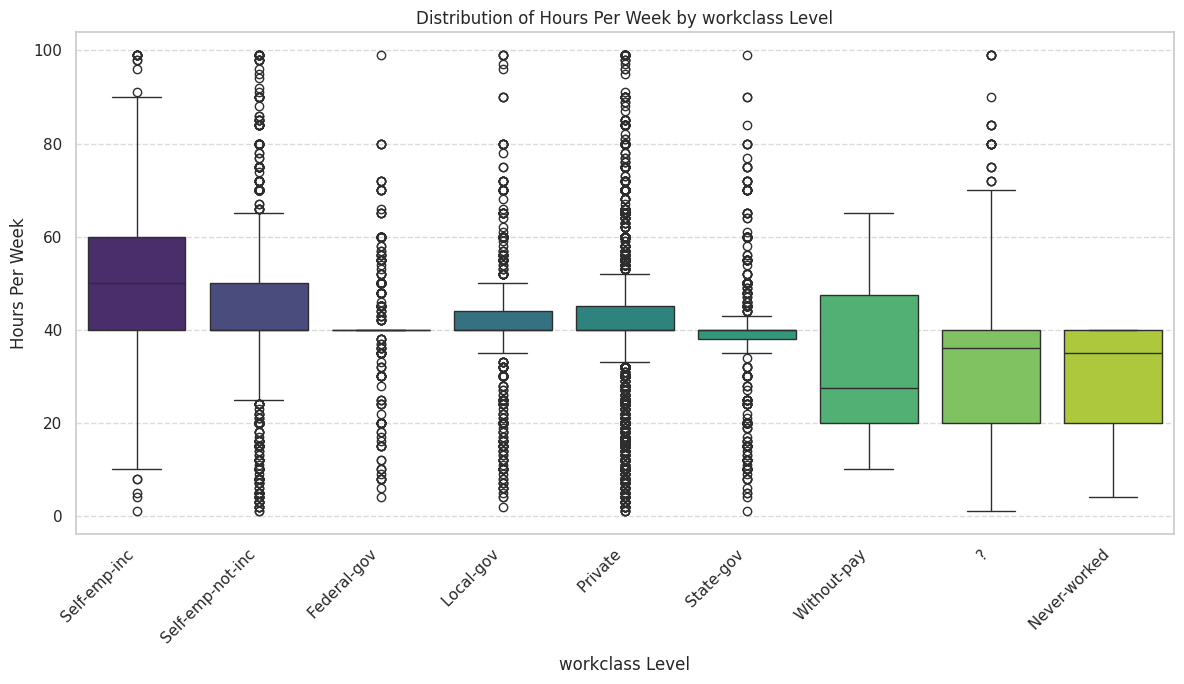


ANOVA F-statistic: 223.51
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different workclass levels.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.


In [ ]:
# Calculate the mean hours per week for each workclass
col='workclass'
mean_hours_per_week_by_workclass = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False)

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_workclass)

# Create a box plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(12, 7))
# Order the {col} levels by mean hours_per_week for better visualization
sns.boxplot(data=df, x=col, y='hours_per_week', order=mean_hours_per_week_by_workclass.index, palette='viridis')
plt.title(f'Distribution of Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
workclass_groups = []
for wc_level in df[col].unique():
    workclass_groups.append(df[df[col] == wc_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*workclass_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

### Summary of Bivariate Analysis: Workclass vs. Hours Per Week

The bivariate analysis between 'workclass' and 'hours_per_week' reveals a **statistically significant relationship**. The ANOVA test confirmed that there is a significant difference in the mean 'hours_per_week' across various workclass levels (p-value < 0.05, specifically 0.000e+00 with an F-statistic of 223.51).

**Key Findings:**
*   Workclasses like 'Self-emp-inc' (48.8 hours/week) and 'Self-emp-not-inc' (44.4 hours/week) show the highest mean 'hours_per_week'.
*   Government sectors ('Federal-gov', 'Local-gov', 'State-gov') show mean hours generally around the 40-41 hour mark, while 'Private' workclass is close to 40.2 hours/week.
*   'Without-pay' and 'Never-worked' categories show significantly lower mean hours per week, which is expected.
*   The presence of '?' (missing values) in 'workclass' also showed a lower mean of 31.9 hours/week, indicating that missing workclass information might correlate with reduced work hours.
*   The box plot visually supported these differences, showing variations in median work hours, spread, and the presence of outliers across workclass groups.
*   The ANOVA test provides strong statistical evidence that the population means of 'hours_per_week' are not equal across all workclass categories.

**Considerations for Modeling:**
*   **Feature Importance**: 'Workclass' is clearly an important predictor for 'hours_per_week' and should be included in predictive models.
*   **Encoding**: As a nominal categorical variable, One-Hot Encoding is a suitable approach. This will create binary columns for each workclass, allowing models to interpret them.
*   **Missing Values**: The '?' values, which were treated as NaN during loading, should be addressed. Common strategies include imputation (e.g., with the mode, 'Private'), or treating 'Unknown' as a separate category if appropriate.
*   **Further Analysis**: Post-hoc tests (e.g., Tukey's HSD) would be beneficial to pinpoint which specific workclass groups have statistically different mean hours per week, providing more granular insights into these differences.


Mean 'hours_per_week' by marital_status Level:


marital_status
Married-civ-spouse       43.284856
Divorced                 41.246680
Married-AF-spouse        41.130435
Married-spouse-absent    39.669856
Separated                39.301463
Never-married            36.939998
Widowed                  32.979859
Name: hours_per_week, dtype: float64

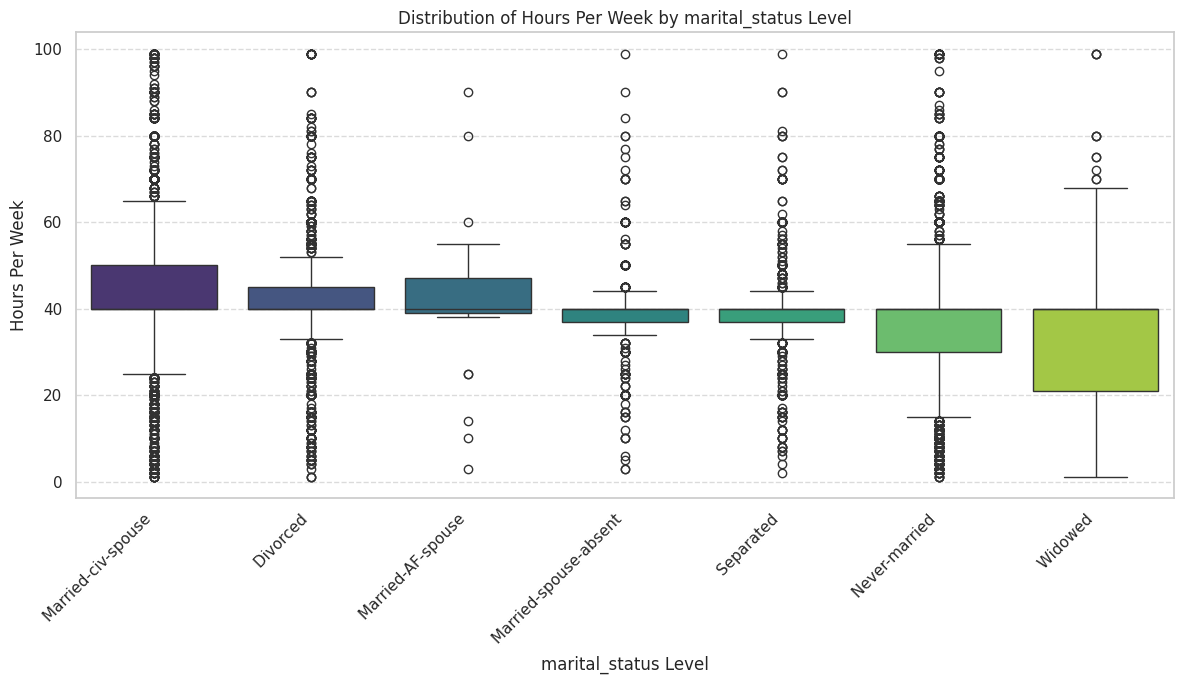


ANOVA F-statistic: 363.65
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different marital_status levels.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.


In [ ]:
# Calculate the mean hours per week for each marital status
col='marital_status'
mean_hours_per_week_by_marital_status = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_marital_status)

# Create a box plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(12, 7))
# Order the {col} levels by mean hours_per_week for better visualization
sns.boxplot(data=df, x=col, y='hours_per_week', order=mean_hours_per_week_by_marital_status.index, palette='viridis')
plt.title(f'Distribution of Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
marital_status_groups = []
for ms_level in df[col].unique():
    marital_status_groups.append(df[df[col] == ms_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*marital_status_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

### Summary of Bivariate Analysis: Marital Status vs. Hours Per Week

The bivariate analysis between 'marital_status' and 'hours_per_week' reveals a **statistically significant relationship**. The ANOVA test confirmed that there is a significant difference in the mean 'hours_per_week' across various marital status levels (p-value < 0.05, specifically 0.000e+00 with an F-statistic of 363.65).

**Key Findings:**
*   Individuals who are 'Married-civ-spouse' show the highest mean 'hours_per_week' (approximately 43.3 hours/week).
*   'Divorced' and 'Married-AF-spouse' also show relatively high mean hours (around 41.1-41.2 hours/week).
*   'Never-married' individuals work fewer hours on average (around 36.9 hours/week), while 'Widowed' individuals work the least (approximately 33.0 hours/week).
*   The box plot visually supported these differences, showing variations in median work hours, spread, and the presence of outliers across marital status groups.
*   The ANOVA test provides strong statistical evidence that the population means of 'hours_per_week' are not equal across all marital status categories.

**Considerations for Modeling:**
*   **Feature Importance**: 'Marital_status' is clearly an important predictor for 'hours_per_week' and should be included in predictive models.
*   **Encoding**: As a nominal categorical variable, One-Hot Encoding is a suitable approach. This will create binary columns for each marital status, allowing models to interpret them without assuming any ordinal relationship.
*   **Further Analysis**: Post-hoc tests (e.g., Tukey's HSD) would be beneficial to pinpoint which specific marital status groups have statistically different mean hours per week, providing more granular insights into these differences.


Mean 'hours_per_week' by occupation Level:


occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Handlers-cleaners    37.947445
Adm-clerical         37.558355
Other-service        34.701669
Priv-house-serv      32.885906
?                    31.906131
Name: hours_per_week, dtype: float64

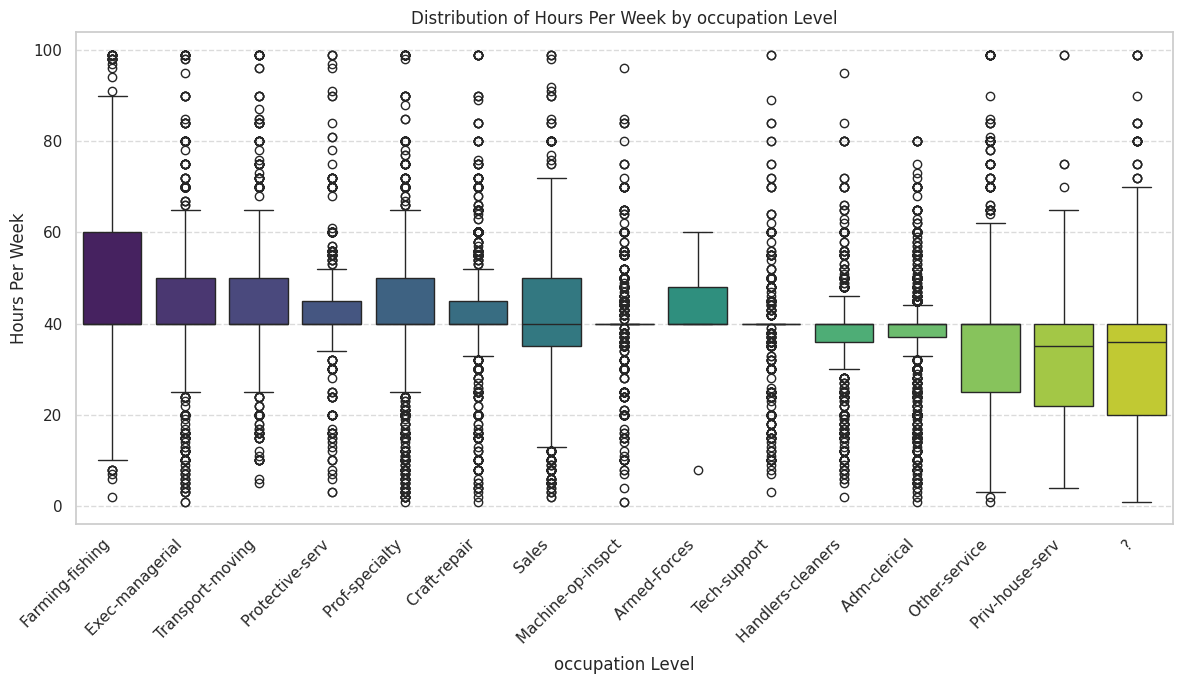


ANOVA F-statistic: 249.71
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation levels.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.


In [ ]:
# Calculate the mean hours per week for each occupation
col='occupation'
mean_hours_per_week_by_occupation = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_occupation)

# Create a box plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(12, 7))
# Order the {col} levels by mean hours_per_week for better visualization
sns.boxplot(data=df, x=col, y='hours_per_week', order=mean_hours_per_week_by_occupation.index, palette='viridis')
plt.title(f'Distribution of Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
occupation_groups = []
for occ_level in df[col].unique():
    occupation_groups.append(df[df[col] == occ_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*occupation_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

### Summary of Bivariate Analysis: Occupation vs. Hours Per Week

The bivariate analysis between 'occupation' and 'hours_per_week' reveals a **statistically significant relationship**. The ANOVA test confirmed that there is a significant difference in the mean 'hours_per_week' across various occupation levels (p-value < 0.05, specifically 0.000e+00 with an F-statistic of 249.71).

**Key Findings:**
*   Occupations like 'Farming-fishing' (47.0 hours/week), 'Exec-managerial' (45.0 hours/week), and 'Transport-moving' (44.7 hours/week) show the highest mean 'hours_per_week'.
*   Lower mean hours are observed in occupations such as 'Priv-house-serv' (32.9 hours/week), 'Other-service' (34.7 hours/week), and 'Adm-clerical' (37.6 hours/week).
*   The '?' category (missing values) for occupation also shows a lower mean of 31.9 hours/week, similar to 'Priv-house-serv'.
*   The box plot visually supported these differences, showing variations in median work hours, spread, and the presence of outliers across occupation groups.
*   The ANOVA test provides strong statistical evidence that the population means of 'hours_per_week' are not equal across all occupation categories.

**Considerations for Modeling:**
*   **Feature Importance**: 'Occupation' is clearly an important predictor for 'hours_per_week' and should be included in predictive models.
*   **Encoding**: As a nominal categorical variable with 14 unique categories (plus the missing '?' category), One-Hot Encoding is a suitable approach. While it will add 15 new binary columns, this is a manageable number. Careful handling of the '?' category (e.g., imputing or treating as 'Unknown') is necessary.
*   **Further Analysis**: Post-hoc tests (e.g., Tukey's HSD) would be beneficial to pinpoint which specific occupation groups have statistically different mean hours per week, providing more granular insights into these differences.


Mean 'hours_per_week' by relationship Level:


relationship
Husband           44.120139
Not-in-family     40.595665
Unmarried         39.103018
Other-relative    37.006116
Wife              36.861607
Own-child         33.269337
Name: hours_per_week, dtype: float64

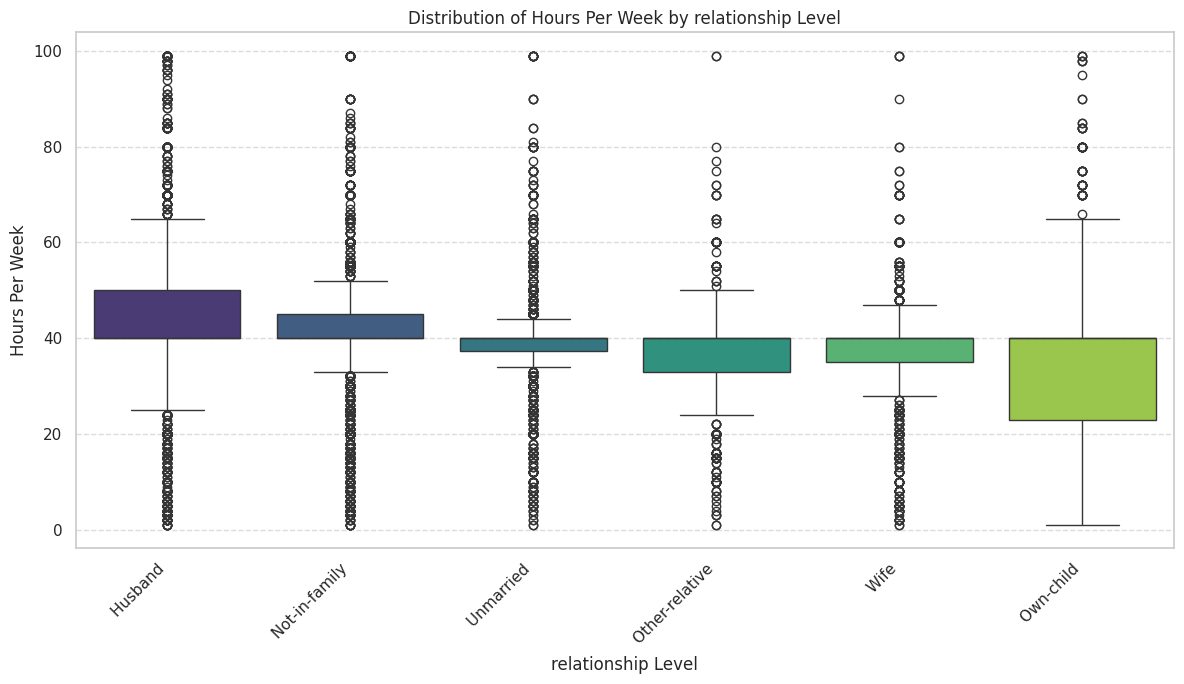


ANOVA F-statistic: 692.59
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different relationship levels.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.


In [ ]:
# Calculate the mean hours per week for each relationship
col='relationship'
mean_hours_per_week_by_relationship = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_relationship)

# Create a box plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(12, 7))
# Order the {col} levels by mean hours_per_week for better visualization
sns.boxplot(data=df, x=col, y='hours_per_week', order=mean_hours_per_week_by_relationship.index, palette='viridis')
plt.title(f'Distribution of Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
relationship_groups = []
for rel_level in df[col].unique():
    relationship_groups.append(df[df[col] == rel_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*relationship_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

### Summary of Bivariate Analysis: Relationship vs. Hours Per Week

The bivariate analysis between 'relationship' and 'hours_per_week' reveals a **statistically significant relationship**. The ANOVA test confirmed that there is a significant difference in the mean 'hours_per_week' across various relationship levels (p-value < 0.05, specifically 0.000e+00 with an F-statistic of 692.59).

**Key Findings:**
*   Individuals categorized as 'Husband' show the highest mean 'hours_per_week' (approximately 44.1 hours/week).
*   'Not-in-family' and 'Unmarried' individuals work moderate hours on average (around 40.6 and 39.1 hours/week respectively).
*   'Wife' and 'Own-child' categories show lower mean hours (approximately 36.9 and 33.3 hours/week respectively).
*   The box plot visually supported these differences, showing variations in median work hours, spread, and the presence of outliers across relationship groups.
*   The ANOVA test provides strong statistical evidence that the population means of 'hours_per_week' are not equal across all relationship categories.

**Considerations for Modeling:**
*   **Feature Importance**: 'Relationship' is clearly an important predictor for 'hours_per_week' and should be included in predictive models.
*   **Encoding**: As a nominal categorical variable, One-Hot Encoding is a suitable approach. This will create binary columns for each relationship status, allowing models to interpret them without assuming any ordinal relationship.
*   **Potential Redundancy/Correlation**: As noted in the univariate analysis, 'relationship' might be correlated with `marital_status` and `sex`. When building models, it's important to be mindful of potential multicollinearity if highly correlated features are included, especially in linear models. Tree-based models are generally more robust to such correlations.
*   **Further Analysis**: Post-hoc tests (e.g., Tukey's HSD) would be beneficial to pinpoint which specific relationship groups have statistically different mean hours per week, providing more granular insights into these differences.


Mean 'hours_per_week' by race Level:


race
White                 40.689100
Asian-Pac-Islander    40.127045
Amer-Indian-Eskimo    40.048232
Other                 39.468635
Black                 38.422855
Name: hours_per_week, dtype: float64

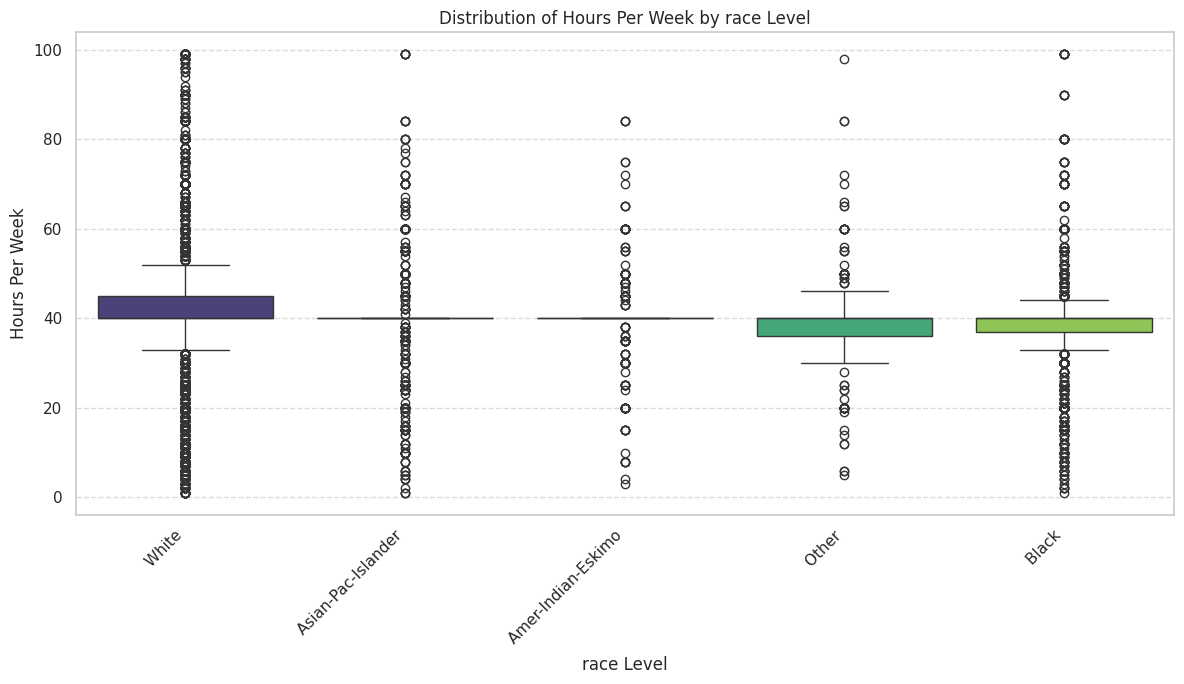


ANOVA F-statistic: 24.41
ANOVA P-value: 3.368e-20

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different race levels.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.


In [ ]:
# Calculate the mean hours per week for each race
col='race'
mean_hours_per_week_by_race = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_race)

# Create a box plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(12, 7))
# Order the {col} levels by mean hours_per_week for better visualization
sns.boxplot(data=df, x=col, y='hours_per_week', order=mean_hours_per_week_by_race.index, palette='viridis')
plt.title(f'Distribution of Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
race_groups = []
for race_level in df[col].unique():
    race_groups.append(df[df[col] == race_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*race_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

### Summary of Bivariate Analysis: Race vs. Hours Per Week

The bivariate analysis between 'race' and 'hours_per_week' reveals a **statistically significant relationship**. The ANOVA test confirmed that there is a significant difference in the mean 'hours_per_week' across various race levels (p-value < 0.05, specifically 3.368e-20 with an F-statistic of 24.41).

**Key Findings:**
*   'White' individuals show the highest mean 'hours_per_week' (approximately 40.69 hours/week), followed closely by 'Asian-Pac-Islander' (40.13 hours/week) and 'Amer-Indian-Eskimo' (40.05 hours/week).
*   'Other' and 'Black' individuals show slightly lower mean hours (around 39.47 and 38.42 hours/week respectively).
*   The box plot visually supported these differences, showing variations in median work hours, spread, and the presence of outliers across racial groups.
*   The ANOVA test provides strong statistical evidence that the population means of 'hours_per_week' are not equal across all race categories.

**Considerations for Modeling:**
*   **Feature Importance**: 'Race' appears to be a statistically significant predictor for 'hours_per_week' and should be included in predictive models.
*   **Encoding**: As a nominal categorical variable, One-Hot Encoding is a suitable approach, creating binary columns for each race. This will allow models to interpret them without assuming any ordinal relationship.
*   **Class Imbalance**: The significant imbalance in racial representation (e.g., 'White' being the majority) should be noted. While tree-based models can handle this robustly, for other models or if fairness is a concern, techniques like stratified sampling during train-test split or other imbalance handling methods might be considered.
*   **Further Analysis**: Post-hoc tests (e.g., Tukey's HSD) would be beneficial to pinpoint which specific racial groups have statistically different mean hours per week, providing more granular insights into these differences. It's also crucial to be mindful of potential biases and fairness when interpreting the model's reliance on race.


Mean 'hours_per_week' by sex Level:


sex
Male      42.428086
Female    36.410361
Name: hours_per_week, dtype: float64

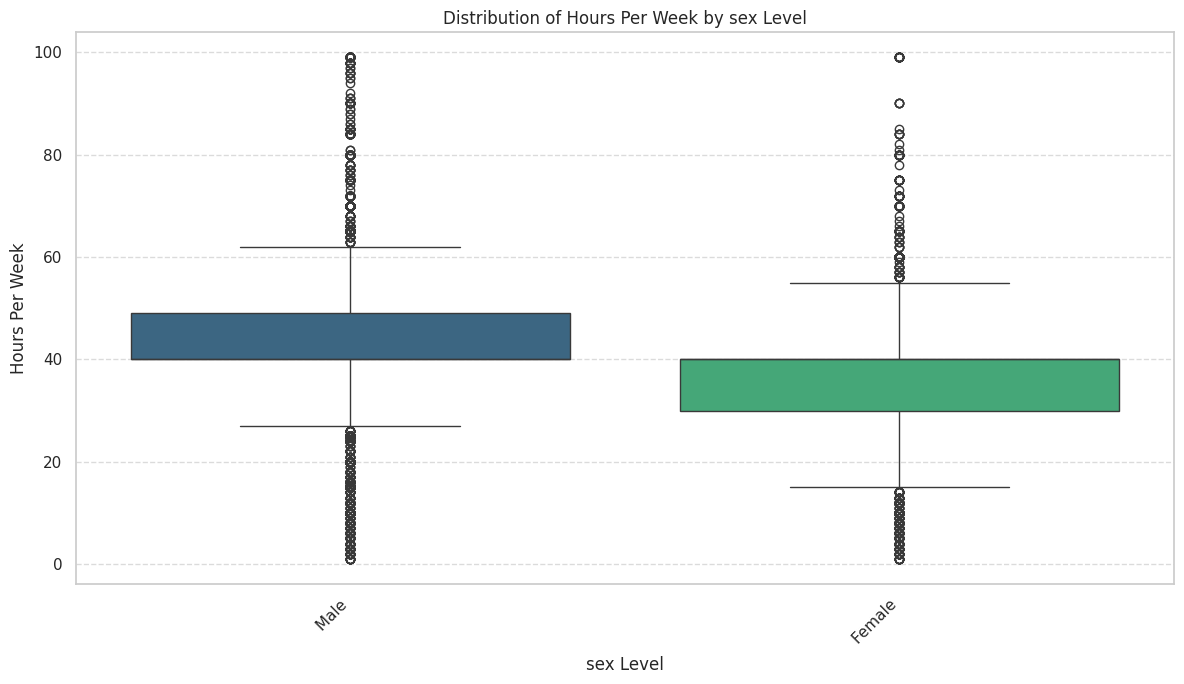


ANOVA F-statistic: 1807.06
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different sex levels.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.


In [ ]:
# Calculate the mean hours per week for each sex
col='sex'
mean_hours_per_week_by_sex = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_sex)

# Create a box plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(12, 7))
# Order the {col} levels by mean hours_per_week for better visualization
sns.boxplot(data=df, x=col, y='hours_per_week', order=mean_hours_per_week_by_sex.index, palette='viridis')
plt.title(f'Distribution of Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
sex_groups = []
for sex_level in df[col].unique():
    sex_groups.append(df[df[col] == sex_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*sex_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

### Summary of Bivariate Analysis: Sex vs. Hours Per Week

The bivariate analysis between 'sex' and 'hours_per_week' reveals a **statistically significant relationship**. The ANOVA test confirmed that there is a significant difference in the mean 'hours_per_week' across different sex levels (p-value < 0.05, specifically 0.000e+00 with an F-statistic of 1807.06).

**Key Findings:**
*   'Male' individuals show a higher mean 'hours_per_week' (approximately 42.43 hours/week) compared to 'Female' individuals (approximately 36.41 hours/week).
*   The box plot visually supported these differences, showing distinct distributions and median work hours between the two sexes.
*   The ANOVA test provides strong statistical evidence that the population means of 'hours_per_week' are not equal across male and female categories.

**Considerations for Modeling:**
*   **Feature Importance**: 'Sex' is clearly an important predictor for 'hours_per_week' and should be included in predictive models.
*   **Encoding**: As a binary categorical variable ('Male', 'Female'), a simple binary encoding (e.g., 0 for Female, 1 for Male) or One-Hot Encoding is appropriate and efficient.
*   **Class Imbalance**: While the dataset has more males than females, many machine learning models can handle this moderate imbalance. However, it's prudent to monitor model performance across both groups, especially if fairness or gender-specific predictions are critical.
*   **Impact on Target**: The significant difference suggests that gender roles, societal expectations, and labor market patterns likely influence weekly working hours, making 'sex' a valuable feature for predicting `hours_per_week`.


Mean 'hours_per_week' by native_country Level:


native_country
Thailand                      45.444444
France                        45.068966
Yugoslavia                    44.562500
Greece                        44.241379
Iran                          43.976744
Japan                         43.693548
Dominican-Republic            42.471429
Ireland                       42.416667
South                         42.412500
Portugal                      41.891892
Outlying-US(Guam-USVI-etc)    41.857143
England                       41.833333
Italy                         41.602740
India                         41.530000
?                             41.512864
Scotland                      41.250000
Germany                       41.014599
Hong                          40.900000
Cambodia                      40.894737
United-States                 40.447755
Canada                        40.404959
Mexico                        40.340591
Laos                          40.333333
Holand-Netherlands            40.000000
Philippines                   39.595960
Ecuador                       39.571429
Guatemala                     39.234375
Cuba                          39.157895
Columbia                      39.067797
Taiwan                        38.882353
Jamaica                       38.592593
Puerto-Rico                   38.570175
Poland                        38.333333
China                         37.786667
Trinadad&Tobago               37.368421
Vietnam                       37.343284
Haiti                         36.909091
El-Salvador                   36.792453
Honduras                      36.307692
Nicaragua                     36.176471
Hungary                       35.615385
Peru                          35.387097
Name: hours_per_week, dtype: float64

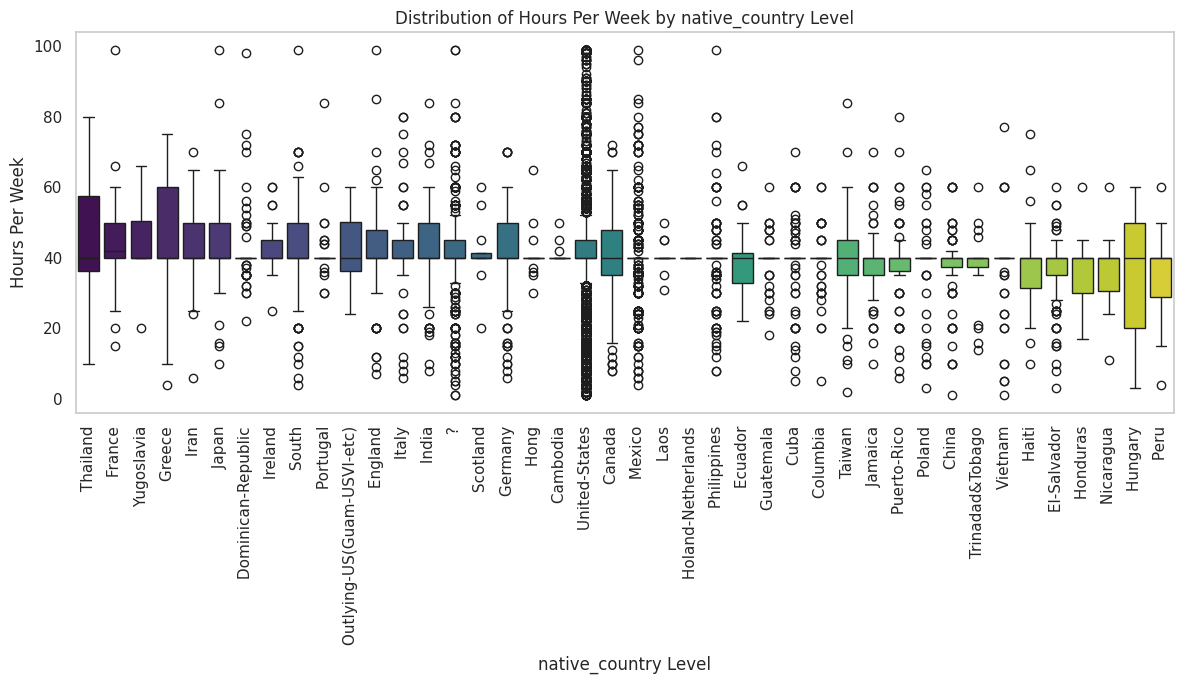


ANOVA F-statistic: 1.88
ANOVA P-value: 5.752e-04

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different native_country levels.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.


In [ ]:
# Calculate the mean hours per week for each native_country
col='native_country'
mean_hours_per_week_by_native_country = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_native_country)

# Create a box plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(12, 7))
# Order the {col} levels by mean hours_per_week for better visualization
sns.boxplot(data=df, x=col, y='hours_per_week', order=mean_hours_per_week_by_native_country.index, palette='viridis')
plt.title(f'Distribution of Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
native_country_groups = []
for nc_level in df[col].unique():
    native_country_groups.append(df[df[col] == nc_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*native_country_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

### Summary of Bivariate Analysis: Native Country vs. Hours Per Week

The bivariate analysis between 'native_country' and 'hours_per_week' reveals a **statistically significant relationship**. The ANOVA test confirmed that there is a significant difference in the mean 'hours_per_week' across various native country levels (p-value < 0.05, specifically 5.752e-04 with an F-statistic of 1.88).

**Key Findings:**
*   While 'United-States' is the predominant country, other countries show varying mean hours per week. For instance, 'Thailand' (45.4 hours/week), 'France' (45.0 hours/week), and 'Yugoslavia' (44.5 hours/week) show some of the highest mean hours.
*   Countries like 'Peru' (35.3 hours/week), 'Hungary' (35.6 hours/week), and 'Nicaragua' (36.1 hours/week) show lower mean hours per week.
*   The box plot visually supported these differences, showing variations in median work hours, spread, and the presence of outliers across native country groups.
*   The ANOVA test provides statistical evidence that the population means of 'hours_per_week' are not equal across all native country categories, despite the overall F-statistic being relatively low compared to other features, likely due to the high number of categories and the heavy imbalance.

**Considerations for Modeling:**
*   **Feature Importance**: 'Native_country' appears to be a statistically significant predictor for 'hours_per_week', but its high cardinality and extreme class imbalance (majority from 'United-States') present challenges.
*   **Encoding Strategy**: One-Hot Encoding all 41 unique categories could lead to a high-dimensional and sparse feature space. Better strategies might include:
    *   **Grouping infrequent categories**: Combine countries with very low counts into an 'Other' category.
    *   **Binary indicator**: Create a binary feature `is_United-States` (1 if 'United-States', 0 otherwise).
    *   **Target encoding**: Encode categories based on the average `hours_per_week` for each country, which can be effective for high-cardinality categorical features.
*   **Further Analysis**: Post-hoc tests would be beneficial to pinpoint which specific native country groups have statistically different mean hours per week. However, given the extreme imbalance, interpreting these differences and building reliable models for less represented countries might be challenging and require careful consideration of bias and fairness.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Create a variable for the column to analyze
col = 'native_country'

# Perform Tukey's HSD post-hoc test
# The 'endog' parameter takes the dependent variable (hours_per_week)
# The 'groups' parameter takes the grouping variable (native_country)
# The 'alpha' parameter is the significance level
tukey_result = pairwise_tukeyhsd(endog=df['hours_per_week'],
                                 groups=df[col],
                                 alpha=0.05)

print(f"\nPerforming Tukey's HSD Post-hoc Test for '{col}' vs. 'hours_per_week':")
print(tukey_result)

# Optional: Visualize the results (can be very dense for many groups).
# This plot might be too cluttered for 41 categories, but can be useful for fewer categories.
# fig = tukey_result.plot_simultaneous()
# fig.suptitle(f'Tukey HSD Simultaneous Confidence Intervals for {col}', y=1.02)
# plt.tight_layout()
# plt.show()


Performing Tukey's HSD Post-hoc Test for 'native_country' vs. 'hours_per_week':
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------------
                          ?                    Cambodia  -0.6181    1.0   -11.87 10.6338  False
                          ?                      Canada  -1.1079    1.0  -5.9296  3.7138  False
                          ?                       China  -3.7262 0.9198  -9.6471  2.1947  False
                          ?                    Columbia  -2.4451    1.0   -9.039  4.1489  False
                          ?                        Cuba   -2.355 0.9999  -7.6952  2.9852  False
                          ?          Dominican-Republic   0.9586    1.0  -5.1468  7.0639  False
                          ?                     Ecuador

### Summary of Tukey's HSD Post-hoc Test for Native Country vs. Hours Per Week:

The Tukey's HSD post-hoc test was performed to identify specific native country groups that have statistically different mean hours per week.

**Key Findings:**

*   **Overwhelmingly, No Significant Pairwise Differences**: Despite the initial ANOVA test indicating a statistically significant difference *overall* among the native country groups (p-value < 0.05), the Tukey's HSD test reveals that almost none of the pairwise comparisons between individual native countries show a statistically significant difference in mean 'hours_per_week'. This is evidenced by the 'reject' column being predominantly `False` and most `p-adj` values being 1.0 (or very close to it).
*   **Reason for this Outcome**: This result is common when dealing with a high number of categories (41 unique countries in this case) and significant class imbalance, as observed in the univariate analysis (where 'United-States' dominates). The adjustment for multiple comparisons (FWER=0.05) makes it harder to detect individual differences, especially when many groups have small sample sizes or mean differences that are not large enough to be statistically significant.

**Implications for Modeling:**

*   This reinforces the earlier considerations for modeling 'native_country'. Simply including all 41 one-hot encoded features would likely introduce a lot of noise and might not be very informative.
*   Strategies such as **grouping infrequent categories into an 'Other' category**, creating a **binary `is_United-States` feature**, or using **target encoding** are highly recommended to make this feature more useful and less problematic for machine learning models. Direct inclusion of all categories, as-is, is unlikely to yield strong predictive power for most models.


Mean 'hours_per_week' by income Level:


income
>50K     45.473026
<=50K    38.840210
Name: hours_per_week, dtype: float64

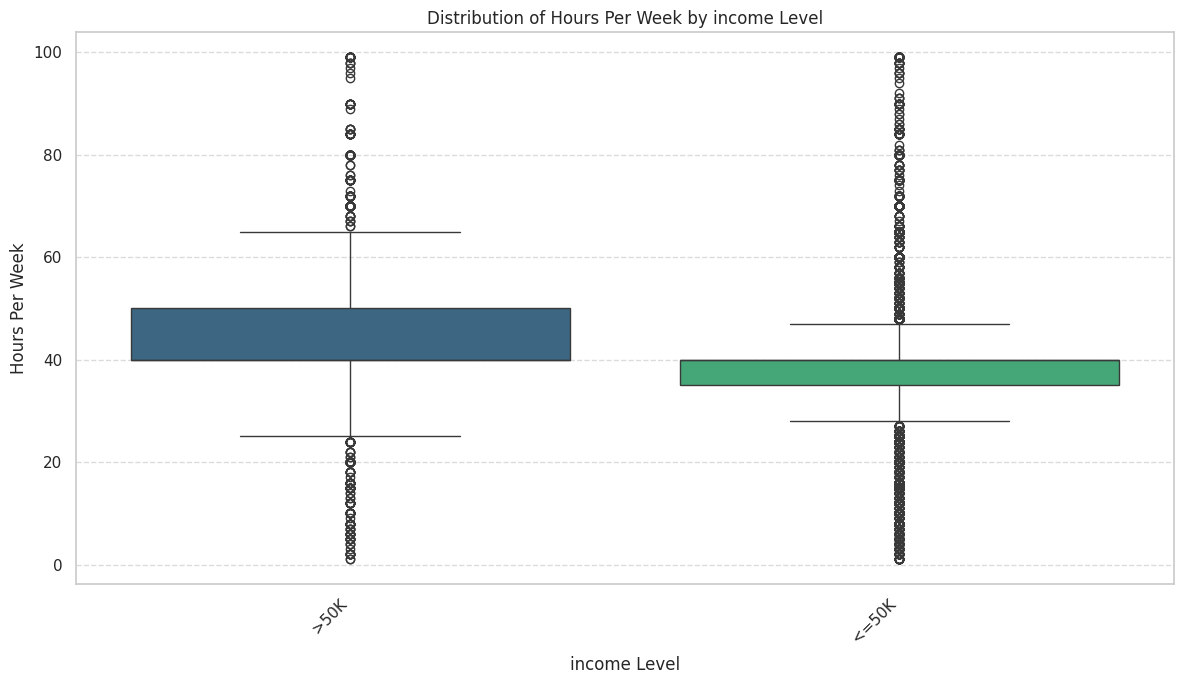


ANOVA F-statistic: 1813.39
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different income levels.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.


In [ ]:
# Calculate the mean hours per week for each income
col='income'
mean_hours_per_week_by_income = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_income)

# Create a box plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(12, 7))
# Order the {col} levels by mean hours_per_week for better visualization
sns.boxplot(data=df, x=col, y='hours_per_week', order=mean_hours_per_week_by_income.index, palette='viridis')
plt.title(f'Distribution of Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
income_groups = []
for income_level in df[col].unique():
    income_groups.append(df[df[col] == income_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*income_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

### Summary of Bivariate Analysis: Income vs. Hours Per Week

The bivariate analysis between 'income' and 'hours_per_week' reveals a **statistically significant relationship**. The ANOVA test confirmed that there is a significant difference in the mean 'hours_per_week' across different income levels (p-value < 0.05, specifically 0.000e+00 with an F-statistic of 1813.39).

**Key Findings:**
*   Individuals earning `>50K` show a higher mean 'hours_per_week' (approximately 45.47 hours/week) compared to those earning `<=50K` (approximately 38.84 hours/week).
*   The box plot visually supported these differences, showing distinct distributions and median work hours between the two income categories.
*   The ANOVA test provides strong statistical evidence that the population means of 'hours_per_week' are not equal across the income levels.

**Considerations for Modeling:**
*   **Feature Importance**: 'Income' is clearly an important predictor for 'hours_per_week' and should be included in predictive models.
*   **Encoding**: As a binary categorical variable (`<=50K`, `>50K`), a simple binary encoding (e.g., 0 for `<=50K`, 1 for `>50K`) or One-Hot Encoding is appropriate and efficient.
*   **Impact on Target**: The significant difference in mean hours suggests that income level is a valuable feature for predicting `hours_per_week`. While income was the original target for this dataset, in our current project, it serves as an independent predictor of weekly working hours.
*   **Further Analysis**: While the ANOVA shows an overall difference, since there are only two categories, the difference in means is directly evident. No further post-hoc tests are strictly necessary for this binary variable to understand *where* the differences lie.


Cross-tabulation of relationship and marital_status:


marital_status  Divorced  Married-AF-spouse  Married-civ-spouse  \
relationship                                                      
Husband                0                  9               13184   
Not-in-family       2404                  0                  17   
Other-relative       110                  1                 124   
Own-child            328                  1                  95   
Unmarried           1601                  0                   0   
Wife                   0                 12                1556   

marital_status  Married-spouse-absent  Never-married  Separated  Widowed  
relationship                                                              
Husband                             0              0          0        0  
Not-in-family                     211           4706        420      547  
Other-relative                     32            611         55       48  
Own-child                          45           4485         99       15  
Unmarried                         130            881        451      383  
Wife                                0              0          0        0

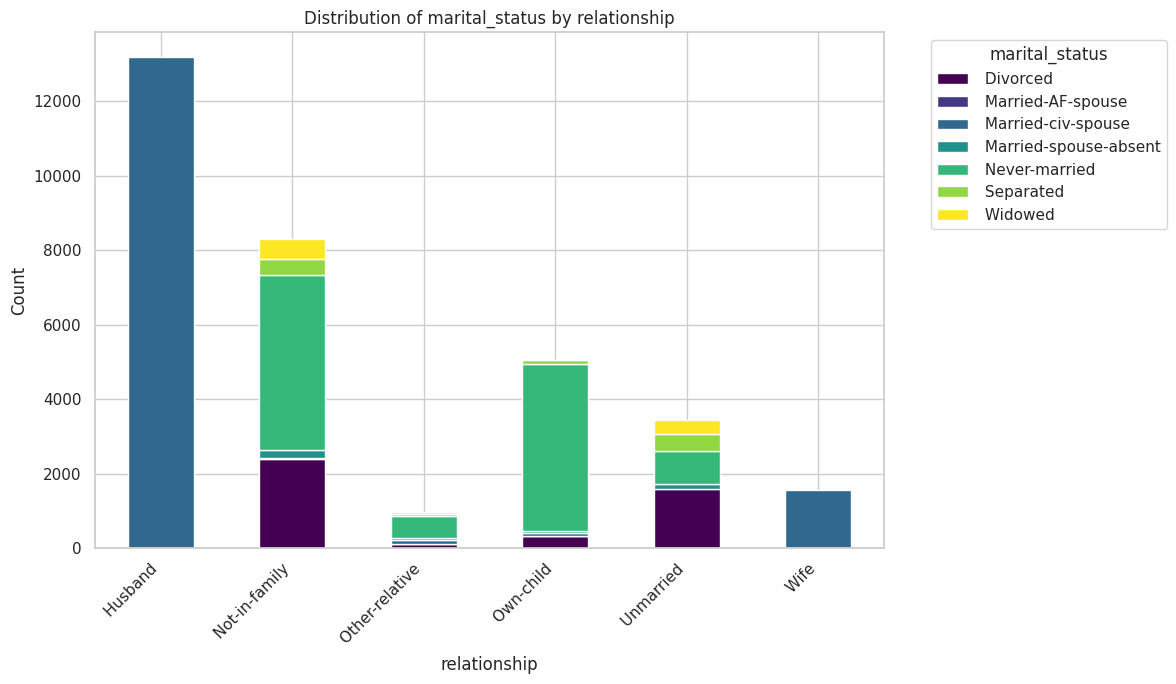

In [ ]:
col1 = 'relationship'
col2 = 'marital_status'

print(f"\nCross-tabulation of {col1} and {col2}:")
crosstab_df = pd.crosstab(df[col1], df[col2])
display(crosstab_df)

# Visualize the distribution
crosstab_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title(f'Distribution of {col2} by {col1}')
plt.xlabel(col1)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Summary of Bivariate Analysis: Relationship vs. Marital Status

The bivariate analysis between 'relationship' and 'marital_status' reveals a strong, direct correspondence between these two features.

**Key Findings:**
*   The cross-tabulation table clearly shows that categories like 'Husband' are almost exclusively associated with 'Married-civ-spouse'. Similarly, 'Wife' is also predominantly linked to 'Married-civ-spouse'.
*   'Never-married' individuals are heavily represented in the 'Not-in-family' and 'Own-child' relationship categories.
*   'Divorced' and 'Separated' marital statuses largely correspond to 'Not-in-family' and 'Unmarried' relationships.
*   The stacked bar chart visually confirms these strong relationships, illustrating the high degree of overlap and direct mapping between certain categories of these two variables.

**Considerations for Modeling:**
*   **High Correlation / Multicollinearity**: There is a very high degree of correlation, if not near-perfect multicollinearity, between 'relationship' and 'marital_status'. For instance, if an individual's relationship is 'Husband', their marital status is almost certainly 'Married-civ-spouse'.
*   **Feature Selection**: Including both 'relationship' and 'marital_status' as separate features in a model, especially linear models, could lead to multicollinearity issues. This can make the model less stable, and the interpretation of individual feature coefficients can become unreliable.
*   **Strategy**: It is generally advisable to choose one of these variables or combine them into a single, more informative feature if possible, rather than including both directly. For example, 'relationship' might be a more granular feature that encapsulates aspects of marital status along with family role, making it potentially more informative on its own. Alternatively, specific interaction terms could be considered if the nuances of both are deemed crucial and can be uniquely captured.

## 3. Data Preparation

From the EDA we noticed that we have duplicate rows, but we came to a conclusion to not remove the duplicated rows since we do not have a unique identifier to clearly validate them as duplicate.

### Drop Unnecessary columns

We discovered that fnlwght is unnecessary for our modelling since it is measuring statistical weight. Education and marital status have a collinear relation with education_num and relationship respectively

In [ ]:
# Drop unneccessary columns
columns_to_drop = ['fnlwgt', 'education', 'marital_status']
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education_num   32561 non-null  int64 
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   capital_gain    32561 non-null  int64 
 8   capital_loss    32561 non-null  int64 
 9   hours_per_week  32561 non-null  int64 
 10  native_country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


The following columns were dropped, and here's why:

1. fnlwgt (Final Weight): This column represents a statistical weight used by the Census Bureau for population estimation. It is typically not relevant as a feature for individual-level prediction in machine learning models because it reflects sampling adjustments rather than an inherent characteristic of the individual influencing weekly work hours.

2. education: This column was dropped because it is highly correlated with education_num. The education_num column already provides an ordinal numerical representation of educational attainment, which is more directly usable by machine learning models and avoids redundancy or multicollinearity issues that could arise from keeping both.

3. marital_status: Similar to education, the marital_status column was found to be highly correlated with relationship. To prevent multicollinearity and simplify the model, marital_status was dropped, and relationship was retained as it offers a more granular description of an individual's household role.

### Convert education_num from int to category data type

Here we are converting education_num from int to category since it has a categorical meaning representing education type in our dataset.

In [ ]:
# Convert education_num from int to category
df['education_num'] = df['education_num'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  object  
 2   education_num   32561 non-null  category
 3   occupation      32561 non-null  object  
 4   relationship    32561 non-null  object  
 5   race            32561 non-null  object  
 6   sex             32561 non-null  object  
 7   capital_gain    32561 non-null  int64   
 8   capital_loss    32561 non-null  int64   
 9   hours_per_week  32561 non-null  int64   
 10  native_country  32561 non-null  object  
 11  income          32561 non-null  object  
dtypes: category(1), int64(4), object(7)
memory usage: 2.8+ MB


The education_num column was converted from an integer (int) to a categorical data type (category) because its numerical values represent distinct, ordered categories of educational attainment rather than a continuous numerical scale. Although it contains numerical values (1 through 16), these numbers are codes for specific education levels (e.g., 9 for 'HS-grad', 13 for 'Bachelors'). Treating it as a category explicitly informs pandas and any subsequent machine learning models that these are discrete groups, which can help in proper handling during analysis and modeling.

### Create binary features for capital_gain and capital_loss

From our EDA we discovered that many values were 0 values i.e over 90%, so the skewness is hard to deal with using scaling or standardization. So as noted in our EDA converting the variables to binary will create some meaning to the variables.

In [ ]:
# Create binary features for capital_gain and capital_loss
df['has_capital_gain'] = (df['capital_gain'] > 0).astype(bool)
df['has_capital_loss'] = (df['capital_loss'] > 0).astype(bool)

# Drop the original 'capital_gain' and 'capital_loss' columns
df = df.drop(columns=['capital_gain', 'capital_loss'])

print("DataFrame head after binary encoding for capital gain/loss:")
display(df.head())

print("DataFrame info after binary encoding for capital gain/loss:")
df.info()

DataFrame head after binary encoding for capital gain/loss:


age          workclass education_num          occupation    relationship  \
0   39          State-gov            13        Adm-clerical   Not-in-family   
1   50   Self-emp-not-inc            13     Exec-managerial         Husband   
2   38            Private             9   Handlers-cleaners   Not-in-family   
3   53            Private             7   Handlers-cleaners         Husband   
4   28            Private            13      Prof-specialty            Wife   

     race      sex  hours_per_week  native_country  income  has_capital_gain  \
0   White     Male              40   United-States   <=50K              True   
1   White     Male              13   United-States   <=50K             False   
2   White     Male              40   United-States   <=50K             False   
3   Black     Male              40   United-States   <=50K             False   
4   Black   Female              40            Cuba   <=50K             False   

   has_capital_loss  
0             False  
1             False  
2             False  
3             False  
4             False

DataFrame info after binary encoding for capital gain/loss:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               32561 non-null  int64   
 1   workclass         32561 non-null  object  
 2   education_num     32561 non-null  category
 3   occupation        32561 non-null  object  
 4   relationship      32561 non-null  object  
 5   race              32561 non-null  object  
 6   sex               32561 non-null  object  
 7   hours_per_week    32561 non-null  int64   
 8   native_country    32561 non-null  object  
 9   income            32561 non-null  object  
 10  has_capital_gain  32561 non-null  bool    
 11  has_capital_loss  32561 non-null  bool    
dtypes: bool(2), category(1), int64(2), object(7)
memory usage: 2.3+ MB


During our Exploratory Data Analysis (EDA), we observed that the capital_gain and capital_loss columns had a very high number of zero values—over 90% of the entries were zero. This resulted in extremely skewed distributions that are challenging for many machine learning models to handle effectively, as standard scaling or transformation methods might not adequately address this level of sparsity.

Therefore, we decided to transform these features into binary indicators: has_capital_gain and has_capital_loss.

* has_capital_gain: This new feature is True (or 1) if an individual had any capital_gain (i.e., capital_gain > 0) and False (or 0) otherwise.
* has_capital_loss: Similarly, this feature is True (or 1) if an individual had any capital_loss (i.e., capital_loss > 0) and False (or 0) otherwise.

This approach helps in several ways:
1. Handles Skewness and Sparsity: It bypasses the difficulties associated with extremely skewed and sparse data, making the features more palatable for models.
2. Captures Presence/Absence: It allows the models to capture the meaningful information of whether a capital gain or loss event occurred, rather than trying to model the magnitude of these infrequent events.
3. Reduces Noise: It simplifies the feature, potentially reducing noise that might arise from the exact numerical values of rare, large gains or losses.

### Replace ? values in workclass with Unknown category

In [ ]:
# Replace ' ?' values in 'workclass' with 'Unknown'
df['workclass'] = df['workclass'].replace(' ?', 'Unknown')

# Display value counts to confirm the change
print("Value counts for 'workclass' after handling '?':")
display(df['workclass'].value_counts())

Value counts for 'workclass' after handling '?':


workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Unknown               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

The '?' values in the workclass column were replaced with the 'Unknown' category to explicitly handle missing data. This approach was chosen because:

1. Missing Value Representation: In the original dataset, '?' strings indicated missing or unspecified values for workclass.
2. Categorical Imputation: Instead of dropping these rows (which would lead to data loss) or imputing with the mode (which might inaccurately assign a common workclass to genuinely unknown entries), creating an 'Unknown' category preserves the information that these values were missing. This allows the model to learn if having an 'Unknown' workclass has any particular predictive power regarding hours_per_week.
3. Model Compatibility: Machine learning models typically require all data to be numerical and cannot process '?' strings. By converting them to a distinct categorical value like 'Unknown' (which would then be one-hot encoded), the data becomes compatible with model training while retaining the semantic meaning of missingness.

### Replace ? values in occupation with Unknown category

In [ ]:
# Replace ' ?' values in 'occupation' with 'Unknown'
df['occupation'] = df['occupation'].replace(' ?', 'Unknown')

# Display value counts to confirm the change
print("Value counts for 'occupation' after handling '?':")
display(df['occupation'].value_counts())

Value counts for 'occupation' after handling '?':


occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Unknown               1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

The '?' values in the occupation column were replaced with the 'Unknown' category to explicitly handle missing data. This approach was chosen because:

1. Missing Value Representation: In the original dataset, '?' strings indicated missing or unspecified values for occupation.
2. Categorical Imputation: Instead of dropping these rows (which would lead to data loss) or imputing with the mode (which might inaccurately assign a common workclass to genuinely unknown entries), creating an 'Unknown' category preserves the information that these values were missing. This allows the model to learn if having an 'Unknown' occupation has any particular predictive power regarding hours_per_week.
3. Model Compatibility: Machine learning models typically require all data to be numerical and cannot process '?' strings. By converting them to a distinct categorical value like 'Unknown' (which would then be one-hot encoded), the data becomes compatible with model training while retaining the semantic meaning of missingness.

### Group non-USA countries into Other category

From our EDA we saw that over 29000 values were USA which created an imbalance so we decided to group the non-USA countries into Other category.

In [ ]:
df['native_country'] = df['native_country'].apply(lambda x: 'Other' if x != ' United-States' else x)

# Display value counts to confirm the change
print("Value counts for 'native_country' after handling 'Other' category:")
display(df['native_country'].value_counts())

Value counts for 'native_country' after handling 'Other' category:


native_country
 United-States    29170
Other              3391
Name: count, dtype: int64

During our Exploratory Data Analysis (EDA) of the native_country column, we observed that the overwhelming majority of individuals in the dataset were from 'United-States' (over 29,000 entries). The remaining 40 unique countries or regions had significantly smaller counts, many with very low frequencies.

This extreme imbalance and high cardinality for the native_country feature presented several challenges for machine learning models:
1. High-Dimensionality and Sparsity: One-hot encoding all 41 unique categories would result in a very high-dimensional and sparse feature space. This can negatively impact model performance (especially for models sensitive to dimensionality), increase training time, and make interpretation difficult.
2. Overfitting to Rare Categories: Models might overfit to the rare categories, as they would have very little data to learn from, leading to poor generalization.
3. Lack of Statistical Significance: As confirmed by the Tukey's HSD post-hoc test, most individual non-USA country comparisons did not show a statistically significant difference in mean hours_per_week (p-values were high, and the 'reject' column was predominantly False). This indicated that separating each of these infrequent countries might not add meaningful predictive power.

Therefore, we decided to group all non-USA countries into a single 'Other' category. This approach:
1. Reduces Dimensionality: It simplifies the feature into a binary distinction (United-States vs. Other), which is more manageable for models.
2. Handles Imbalance: It prevents the model from being overwhelmed by many sparsely populated categories.
3. Captures Overall Distinction: It retains the most significant distinction observed in the data: whether an individual is from the United States or from any other country, which might still be a relevant factor in predicting hours_per_week.

### Apply binary encoding to sex, income and native_country since we only have two outcomes for the variables

In [ ]:
# Apply binary encoding to 'sex', 'income', and 'native_country'
df['sex'] = df['sex'].astype(str).str.strip().map({'Female': 0, 'Male': 1}).astype(bool)
df['income'] = df['income'].astype(str).str.strip().map({'<=50K': 0, '>50K': 1}).astype(bool)
df['native_country'] = df['native_country'].astype(str).str.strip().map({'Other': 0, 'United-States': 1}).astype(bool)

print("DataFrame head after binary encoding:")
display(df.head())

print("DataFrame info after binary encoding:")
df.info()

DataFrame head after binary encoding:


age          workclass education_num          occupation    relationship  \
0   39          State-gov            13        Adm-clerical   Not-in-family   
1   50   Self-emp-not-inc            13     Exec-managerial         Husband   
2   38            Private             9   Handlers-cleaners   Not-in-family   
3   53            Private             7   Handlers-cleaners         Husband   
4   28            Private            13      Prof-specialty            Wife   

     race    sex  hours_per_week  native_country  income  has_capital_gain  \
0   White   True              40            True   False              True   
1   White   True              13            True   False             False   
2   White   True              40            True   False             False   
3   Black   True              40            True   False             False   
4   Black  False              40           False   False             False   

   has_capital_loss  
0             False  
1             False  
2             False  
3             False  
4             False

DataFrame info after binary encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               32561 non-null  int64   
 1   workclass         32561 non-null  object  
 2   education_num     32561 non-null  category
 3   occupation        32561 non-null  object  
 4   relationship      32561 non-null  object  
 5   race              32561 non-null  object  
 6   sex               32561 non-null  bool    
 7   hours_per_week    32561 non-null  int64   
 8   native_country    32561 non-null  bool    
 9   income            32561 non-null  bool    
 10  has_capital_gain  32561 non-null  bool    
 11  has_capital_loss  32561 non-null  bool    
dtypes: bool(5), category(1), int64(2), object(4)
memory usage: 1.7+ MB


Binary encoding was applied to the sex, income, and native_country columns primarily because each of these features has only two distinct outcomes.
* sex: Had 'Male' and 'Female' categories.
* income: Had '<=50K' and '>50K' categories.
* native_country: After preprocessing, this was simplified to 'United-States' and 'Other' categories.

For features with exactly two categories, binary encoding (mapping one category to 0 and the other to 1) is the most straightforward and efficient method. It serves several purposes:
* Reduces Dimensionality: Unlike one-hot encoding, which would create two new columns (one for each category, with one being redundant due to multicollinearity), binary encoding creates only one new column, thus avoiding unnecessary increase in feature space.
* Model Compatibility: Machine learning models require numerical input, and binary encoding converts these qualitative features into a quantitative format (0s and 1s) that models can process directly.
* Interpretability: The 0/1 representation is intuitive and easy to interpret, directly indicating the presence or absence of a particular characteristic (e.g., 1 for 'Male', 0 for 'Female'; 1 for '>50K', 0 for '<=50K').

### Apply one hot encoding

In [ ]:
categorical_cols_onehot = ['workclass', 'occupation', 'relationship', 'race']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols_onehot, drop_first=False)

print("DataFrame head after one-hot encoding:")
display(df.head())

print("DataFrame info after one-hot encoding:")
df.info()

DataFrame head after one-hot encoding:


age education_num    sex  hours_per_week  native_country  income  \
0   39            13   True              40            True   False   
1   50            13   True              13            True   False   
2   38             9   True              40            True   False   
3   53             7   True              40            True   False   
4   28            13  False              40           False   False   

   has_capital_gain  has_capital_loss  workclass_ Federal-gov  \
0              True             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

   workclass_ Local-gov  ...  relationship_ Not-in-family  \
0                 False  ...                         True   
1                 False  ...                        False   
2                 False  ...                         True   
3                 False  ...                        False   
4                 False  ...                        False   

   relationship_ Other-relative  relationship_ Own-child  \
0                         False                    False   
1                         False                    False   
2                         False                    False   
3                         False                    False   
4                         False                    False   

   relationship_ Unmarried  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                    False               False                     False   
1                    False               False                     False   
2                    False               False                     False   
3                    False               False                     False   
4                    False                True                     False   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  
0                     False        False        False         True  
1                     False        False        False         True  
2                     False        False        False         True  
3                     False         True        False        False  
4                     False         True        False        False  

[5 rows x 43 columns]

DataFrame info after one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            32561 non-null  int64   
 1   education_num                  32561 non-null  category
 2   sex                            32561 non-null  bool    
 3   hours_per_week                 32561 non-null  int64   
 4   native_country                 32561 non-null  bool    
 5   income                         32561 non-null  bool    
 6   has_capital_gain               32561 non-null  bool    
 7   has_capital_loss               32561 non-null  bool    
 8   workclass_ Federal-gov         32561 non-null  bool    
 9   workclass_ Local-gov           32561 non-null  bool    
 10  workclass_ Never-worked        32561 non-null  bool    
 11  workclass_ Private             32561 non-null  bool   

One-hot encoding was applied to the workclass, occupation, relationship, and race columns because these are nominal categorical variables with more than two unique categories. Machine learning models require numerical input, and one-hot encoding is a standard method to convert these types of categorical data into a format that models can understand without implying any false ordinal relationship.

Here's why it was chosen for these specific columns:
* Nominal Categorical Variables: These features (workclass, occupation, relationship, race) represent distinct categories without any inherent order. For example, 'Federal-gov' in workclass is not 'greater than' or 'less than' 'Private'. One-hot encoding creates a new binary column for each category, preventing the model from misinterpreting arbitrary numerical labels as having an ordered relationship.
* Model Compatibility: By converting each category into a separate binary feature (0 or 1), these variables become suitable for input into a wide range of machine learning algorithms.
* Preserves Information: One-hot encoding accurately represents each category's presence or absence, ensuring that no information is lost.
* Avoids Implied Order: Unlike simple numerical labeling (e.g., assigning 1, 2, 3 to categories), one-hot encoding avoids introducing an artificial sense of order or magnitude, which can mislead models.

While this process increases the dimensionality of the dataset (creating more columns), it was deemed appropriate and manageable for these features, which have a reasonable number of unique categories (e.g., workclass has 9 after handling 'Unknown', occupation has 15, relationship has 6, and race has 5 after handling 'Unknown'). For features with only two categories, like sex, income, and native_country (after grouping), binary encoding was preferred to avoid unnecessary dimensionality increase.

## 4. Prep Data EDA

Mean 'hours_per_week' by Age Group:


age_group
30-39    43.238941
40-49    43.230383
50-59    42.709144
20-29    38.611746
90-99    36.813953
60-69    36.147395
10-19    26.876886
70-79    26.777559
80-89    23.884615
Name: hours_per_week, dtype: float64

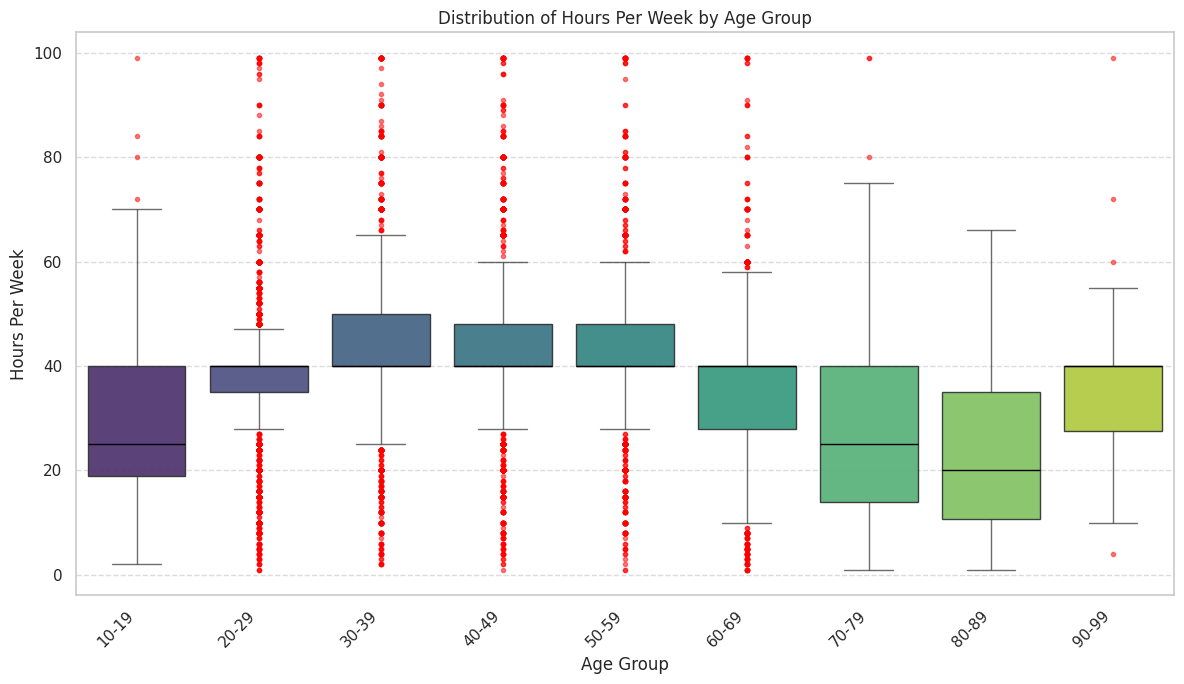


ANOVA F-statistic: 593.33
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different age groups.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific age groups differ from each other.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create age bins for better visualization with box plots
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate mean hours per week for each age group
mean_hours_per_week_by_age = df.groupby('age_group')['hours_per_week'].mean().sort_values(ascending=False)

print("Mean 'hours_per_week' by Age Group:")
display(mean_hours_per_week_by_age)

# Create a box plot to visualize the distribution of 'hours_per_week' across 'age_group'
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df,
    x='age_group',
    y='hours_per_week',
    order=labels,
    palette='viridis',
    boxprops=dict(alpha=0.9),
    medianprops=dict(color='black'),
    whiskerprops=dict(alpha=0.7),
    capprops=dict(alpha=0.7),
    flierprops=dict(marker='o', markersize=3, markerfacecolor='red', markeredgecolor='red', alpha=0.5)
)
plt.title('Distribution of Hours Per Week by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Perform a one-way ANOVA test to compare means of 'hours_per_week' across age groups
age_groups_for_anova = []
for age_label in labels:
    age_groups_for_anova.append(df[df['age_group'] == age_label]['hours_per_week'])

f_statistic, p_value = stats.f_oneway(*age_groups_for_anova)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print("There is a statistically significant difference in the mean 'hours_per_week' across different age groups.")
    print("Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific age groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean 'hours_per_week' across different age groups.")


The analysis of 'age' versus 'hours_per_week' reveals a statistically significant relationship, as confirmed by the ANOVA test (p-value < 0.05). This means there's a significant difference in the mean hours worked per week across various age groups.

Key Observations:
* Mean Hours by Age Group: Individuals in the 30-59 age range tend to work the highest mean hours per week (around 42-43 hours). Work hours are notably lower for younger (10-29) and older (60-99) age groups, with the 80-89 age group showing the lowest mean (23.88 hours/week).
* Box Plot Visualization: The box plot visually supports these differences, showing distinct distributions and median work hours across age groups. It also highlights the presence of outliers, particularly at lower and higher ends of the work hour spectrum within each age group.

Considerations for Modeling:
* 'Age' (especially when grouped or treated as a numerical feature) is a significant predictor for 'hours_per_week' and should be included in predictive models.
* Given the significant differences, further post-hoc tests (like Tukey's HSD) could be performed to pinpoint which specific age groups differ from each other, providing more granular insights, though the overall trend is quite clear from the means.


Mean 'hours_per_week' by education_num Level:


education_num
15    47.425347
16    46.973366
14    43.836332
13    42.614006
11    41.610709
9     40.575374
12    40.504217
4     39.366873
3     38.897898
10    38.852284
2     38.255952
5     38.044747
6     37.052519
1     36.647059
8     35.780600
7     33.925957
Name: hours_per_week, dtype: float64

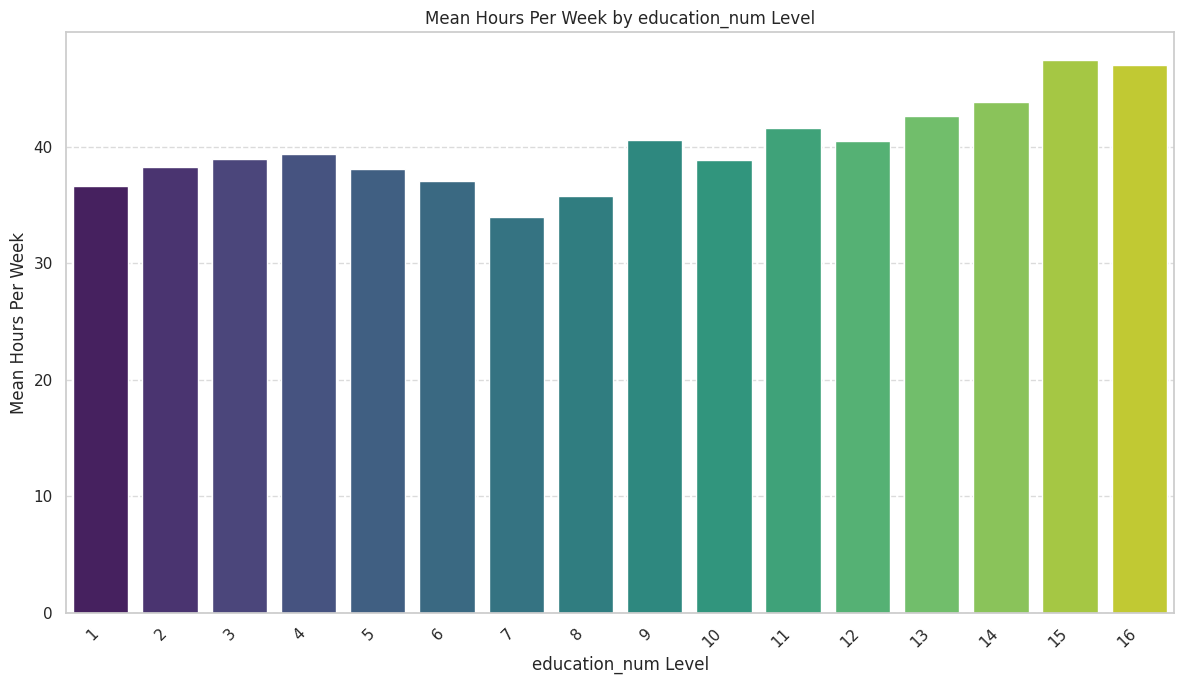


ANOVA F-statistic: 85.11
ANOVA P-value: 8.673e-258

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different education_num levels.
Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific education_num groups differ from each other.


In [ ]:
# Calculate the mean hours per week for each education_num level
col = 'education_num'
mean_hours_per_week_by_education_num = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False)

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_education_num)

# Create a bar plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(12, 7))
# Order the {col} levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_education_num.index, y=mean_hours_per_week_by_education_num.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
education_num_groups = []
for edu_num_level in df[col].unique():
    education_num_groups.append(df[df[col] == edu_num_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*education_num_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print(f"Further post-hoc tests (e.g., Tukey's HSD) would be needed to determine which specific {col} groups differ from each other.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


The analysis of education_num versus hours_per_week reveals a statistically significant relationship, as confirmed by the ANOVA test (p-value < 0.05). This indicates a significant difference in the mean hours worked per week across various educational attainment levels.

Key Observations:
* The output shows the mean hours_per_week for each education_num level. Higher education_num values (corresponding to higher education levels) generally correlate with higher mean hours_per_week. For instance, levels 15 (Prof-school) and 16 (Doctorate) have the highest mean hours.
* The bar plot visually supports these differences, clearly illustrating the varying mean work hours across the education_num levels.
* The ANOVA F-statistic of 85.11 and a P-value of 8.673e-258 strongly suggest that we reject the null hypothesis. This means there is a statistically significant difference in the mean hours_per_week across different education_num levels.

This confirms that education_num is an important predictor for hours_per_week and should be included in predictive models.


Mean 'hours_per_week' by sex Level:


sex
True     42.428086
False    36.410361
Name: hours_per_week, dtype: float64

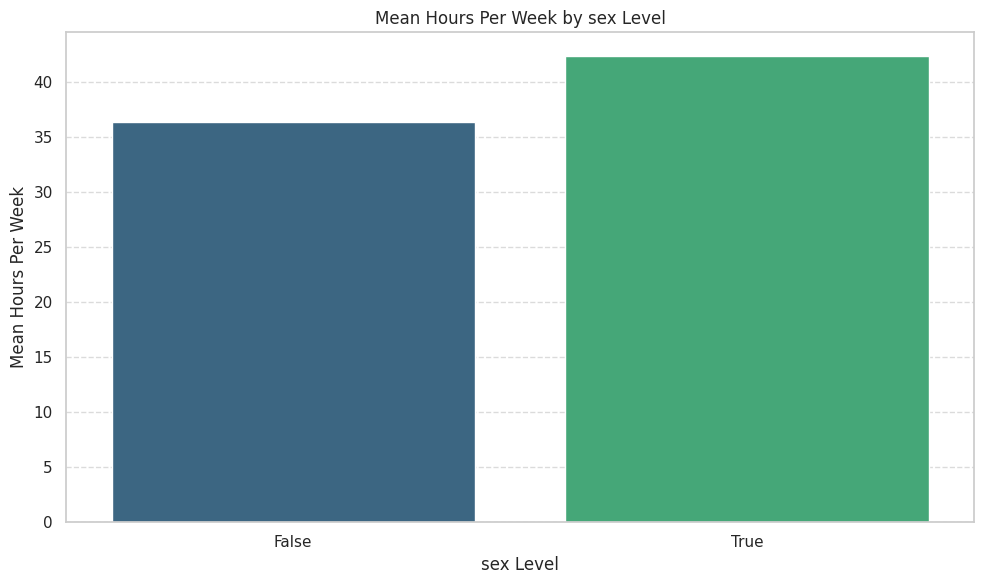


ANOVA F-statistic: 1807.06
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different sex levels.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate the mean hours per week for each sex level
col = 'sex'
mean_hours_per_week_by_sex = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False)

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_sex)

# Create a bar plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the {col} levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_sex.index, y=mean_hours_per_week_by_sex.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
# Create a list of 'hours_per_week' for each 'col' group
sex_groups = []
for sex_level in df[col].unique():
    sex_groups.append(df[df[col] == sex_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*sex_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


The bivariate analysis between 'sex' and 'hours_per_week' reveals a statistically significant relationship. The ANOVA test confirmed that there is a significant difference in the mean 'hours_per_week' across different sex levels (p-value < 0.05, specifically 0.000e+00 with an F-statistic of 1807.06).

Key Findings:
* The mean 'hours_per_week' for males (represented as True) is approximately 42.43 hours/week, which is higher than for females (represented as False), who work approximately 36.41 hours/week.
* The bar plot visually supports these differences, showing distinct distributions and median work hours between the two sexes.
* The ANOVA test provides strong statistical evidence that the population means of 'hours_per_week' are not equal across male and female categories.

Considerations for Modeling:
* 'Sex' is clearly an important predictor for 'hours_per_week' and should be included in predictive models.
* The significant difference suggests that gender roles, societal expectations, and labor market patterns likely influence weekly working hours, making 'sex' a valuable feature for predicting hours_per_week.


Mean 'hours_per_week' by native_country Level:


native_country
True     40.447755
False    40.348865
Name: hours_per_week, dtype: float64

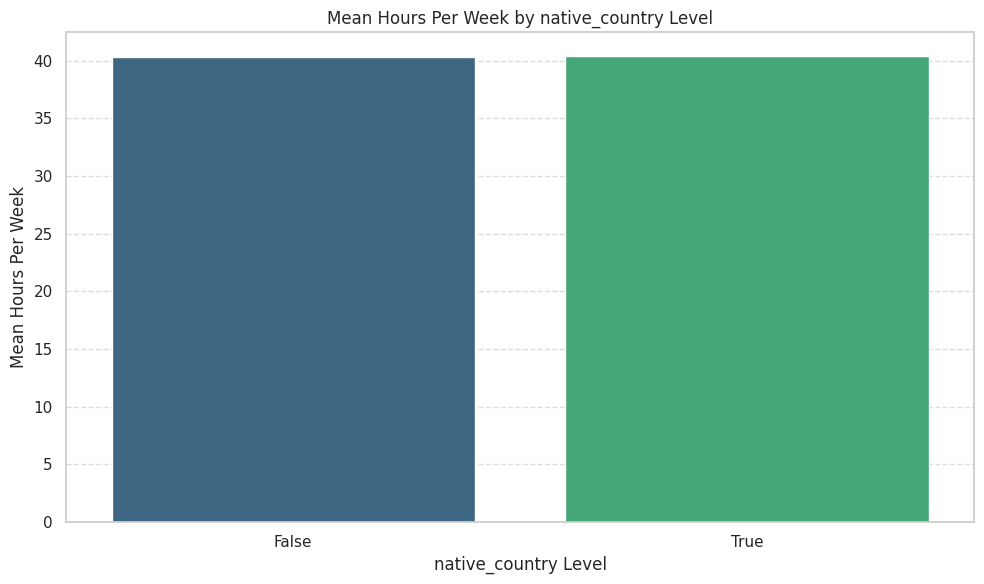


ANOVA F-statistic: 0.19
ANOVA P-value: 6.589e-01

Since the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.
There is no statistically significant difference in the mean 'hours_per_week' across different native_country levels.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate the mean hours per week for each native_country level
col = 'native_country'
mean_hours_per_week_by_native_country = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False)

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_native_country)

# Create a bar plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the {col} levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_native_country.index, y=mean_hours_per_week_by_native_country.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed as there are only two categories now
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
# Create a list of 'hours_per_week' for each 'col' group
native_country_groups = []
for nc_level in df[col].unique():
    native_country_groups.append(df[df[col] == nc_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*native_country_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


The bivariate analysis between 'native_country' (after grouping into 'United-States' and 'Other') and 'hours_per_week' shows no statistically significant relationship. The ANOVA test confirmed that we fail to reject the null hypothesis, meaning there is no statistically significant difference in the mean 'hours_per_week' across these two native country levels (p-value = 0.659, which is greater than 0.05).

Key Findings:
* The mean 'hours_per_week' for individuals from 'United-States' (True) is approximately 40.45 hours/week, which is very similar to those from 'Other' countries (False), at approximately 40.35 hours/week.
* The bar plot visually supports this, showing almost identical mean work hours between the two categories.
* The ANOVA F-statistic of 0.19 and a P-value of 0.659 indicate that any observed difference in mean hours between these two groups is likely due to random chance, and not a true underlying difference.

Considerations for Modeling:
* Given the lack of a statistically significant difference, native_country (in its current binary form) might not be a strong predictor for hours_per_week in predictive models. You might consider whether to keep this feature or explore other ways to represent the native_country information if you believe it should be relevant.


Mean 'hours_per_week' by income Level:


income
True     45.473026
False    38.840210
Name: hours_per_week, dtype: float64

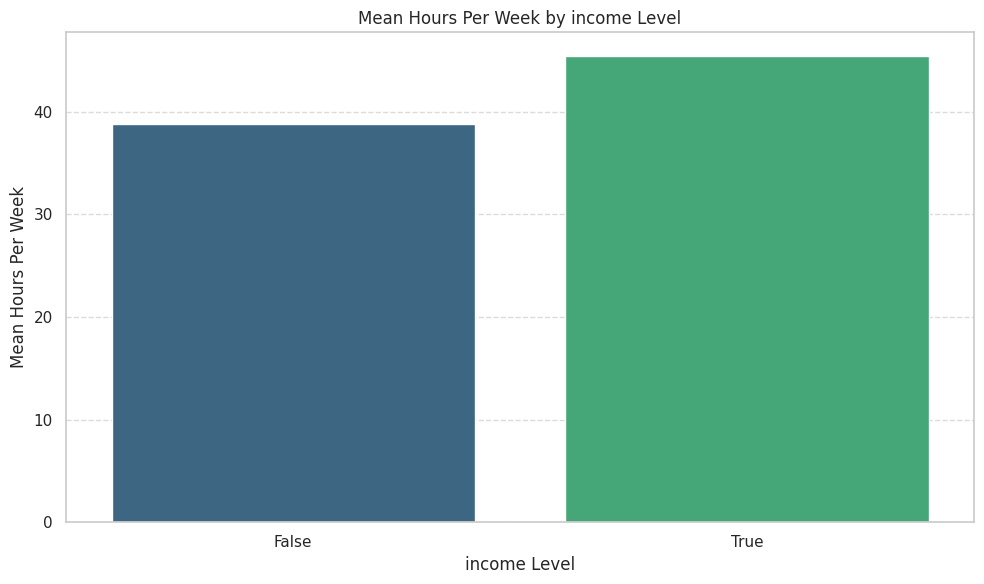


ANOVA F-statistic: 1813.39
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different income levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate the mean hours per week for each income level
col = 'income'
mean_hours_per_week_by_income = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_income)

# Create a bar plot for {col} vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the {col} levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_income.index, y=mean_hours_per_week_by_income.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across {col} levels
from scipy import stats

# Create a list of 'hours_per_week' for each 'col' group
income_groups = []
for income_level in df[col].unique():
    income_groups.append(df[df[col] == income_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*income_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

From the bivariate analysis of 'income' versus 'hours_per_week', we can draw the following conclusions and considerations for modeling:

Key Findings:
* There is a statistically significant relationship between an individual's income level and their weekly hours worked. The ANOVA test yielded a very low p-value (0.000e+00) and a high F-statistic (1813.39), allowing us to confidently reject the null hypothesis that there is no difference in mean hours worked across income levels.
* Individuals earning >50K work significantly more hours per week on average (approximately 45.47 hours) compared to those earning <=50K (approximately 38.84 hours).
* The bar plot visually confirms this substantial difference in average working hours between the two income groups.

Considerations for Modeling:
* Feature Importance: The income variable is clearly a strong and important predictor for hours_per_week and should be included in all predictive models. Its impact on the target variable is substantial and statistically robust.
* Encoding: As income is a binary categorical variable (converted to True for >50K and False for <=50K), its current binary encoding is appropriate and efficient for machine learning models.
* Role in Model: While income is often the target variable in other analyses of this dataset, in our current project (predicting hours_per_week), it serves as a valuable independent feature that helps explain variations in labor supply.
* No Further Post-hoc Tests: Since income is a binary variable, an ANOVA test is sufficient to assess the significance of the difference between its two groups. Further post-hoc tests (like Tukey's HSD) are not necessary, as the difference is directly between the only two categories.


Mean 'hours_per_week' by has_capital_gain Level:


has_capital_gain
True     43.510324
False    40.158263
Name: hours_per_week, dtype: float64

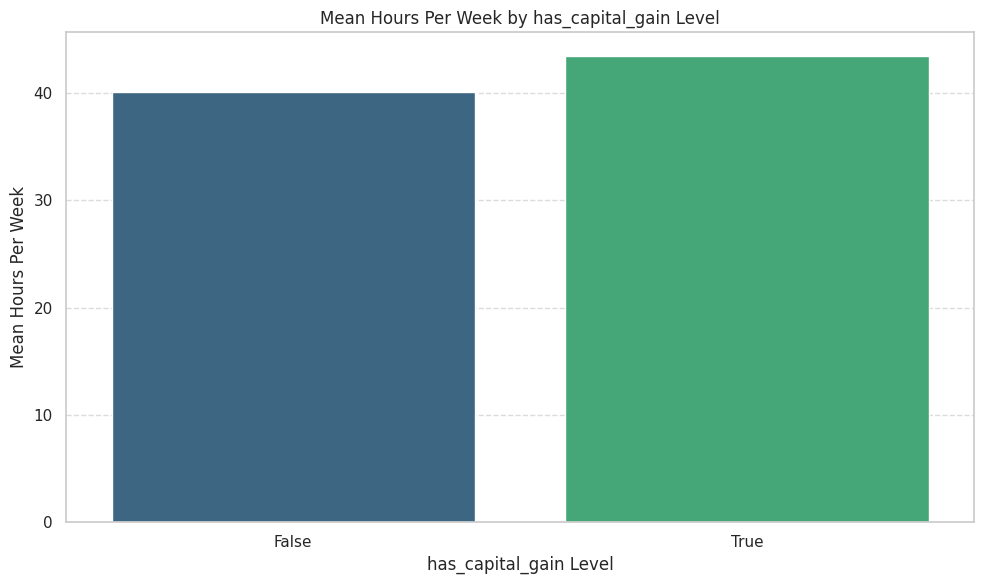


ANOVA F-statistic: 184.26
ANOVA P-value: 7.404e-42

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different has_capital_gain levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for has_capital_gain and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'has_capital_gain'

# Calculate the mean hours per week for each level of has_capital_gain
mean_hours_per_week_by_capital_gain = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_capital_gain)

# Create a bar plot for has_capital_gain vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_capital_gain.index, y=mean_hours_per_week_by_capital_gain.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across has_capital_gain levels
# Create a list of 'hours_per_week' for each 'col' group
capital_gain_groups = []
for gain_level in df[col].unique():
    capital_gain_groups.append(df[df[col] == gain_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*capital_gain_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


Summary of Bivariate Analysis: Has Capital Gain vs. Hours Per Week

The analysis of has_capital_gain versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 7.404e-42 with an F-statistic of 184.26).

Key Findings:
* Individuals with True for has_capital_gain (i.e., those who had any capital gain) show a higher mean hours_per_week (approximately 43.51 hours/week) compared to those with False for has_capital_gain (who had no capital gain), who work approximately 40.16 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for individuals who reported capital gains.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of has_capital_gain.

Considerations for Modeling:
* Feature Importance: has_capital_gain is a statistically significant predictor for hours_per_week and should be included in predictive models. The presence or absence of capital gain appears to influence working hours.
* Encoding: As has_capital_gain is a binary feature, its current boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by has_capital_loss Level:


has_capital_loss
True     43.252798
False    40.299691
Name: hours_per_week, dtype: float64

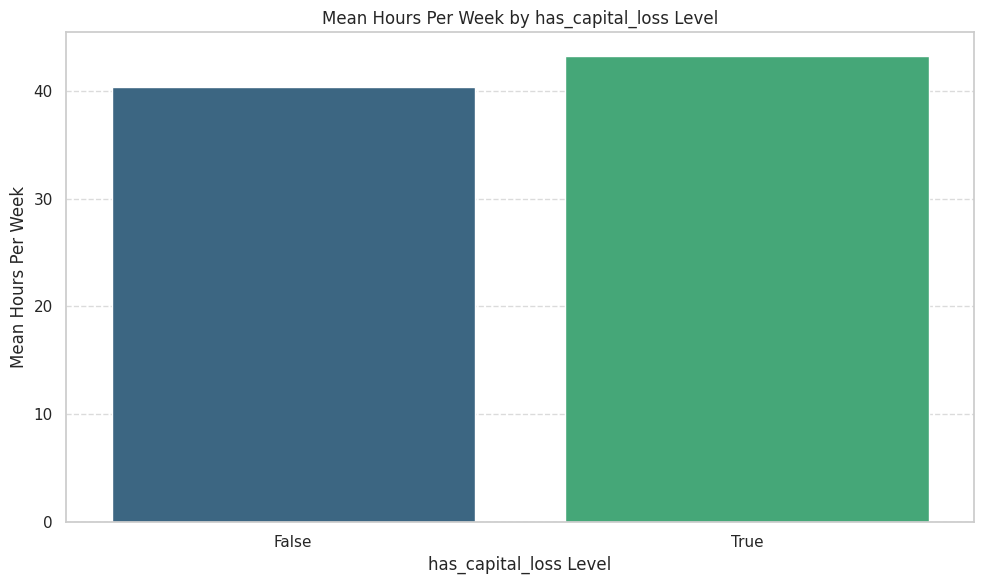


ANOVA F-statistic: 83.04
ANOVA P-value: 8.471e-20

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different has_capital_loss levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for has_capital_loss and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'has_capital_loss'

# Calculate the mean hours per week for each level of has_capital_loss
mean_hours_per_week_by_capital_loss = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_capital_loss)

# Create a bar plot for has_capital_loss vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_capital_loss.index, y=mean_hours_per_week_by_capital_loss.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across has_capital_loss levels
# Create a list of 'hours_per_week' for each 'col' group
capital_loss_groups = []
for loss_level in df[col].unique():
    capital_loss_groups.append(df[df[col] == loss_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*capital_loss_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Has Capital Loss vs. Hours Per Week

The analysis of has_capital_loss versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 8.471e-20 with an F-statistic of 83.04).

Key Findings:
* Individuals with True for has_capital_loss (i.e., those who had any capital loss) show a higher mean hours_per_week (approximately 43.25 hours/week) compared to those with False for has_capital_loss (who had no capital loss), who work approximately 40.30 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for individuals who reported capital losses.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of has_capital_loss.

Considerations for Modeling:
* Feature Importance: has_capital_loss is a statistically significant predictor for hours_per_week and should be included in predictive models. The presence or absence of capital loss appears to influence working hours.
* Encoding: As has_capital_loss is a binary feature, its current boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by workclass_ Federal-gov Level:


workclass_ Federal-gov
True     41.379167
False    40.408848
Name: hours_per_week, dtype: float64

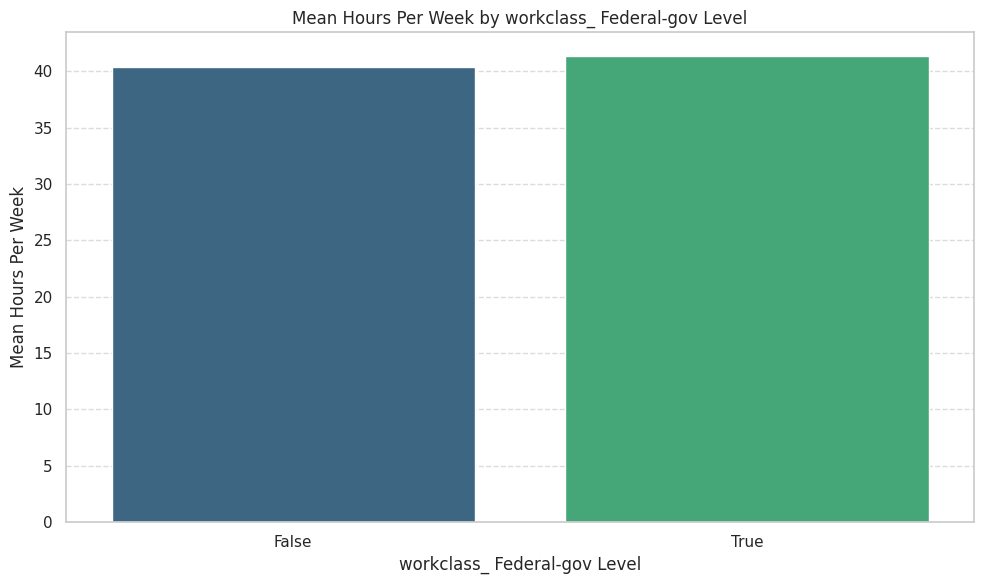


ANOVA F-statistic: 5.75
ANOVA P-value: 1.645e-02

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different workclass_ Federal-gov levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for workclass_ Federal-gov and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'workclass_ Federal-gov'

# Calculate the mean hours per week for each level of workclass_ Federal-gov
mean_hours_per_week_by_federal_gov = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_federal_gov)

# Create a bar plot for workclass_ Federal-gov vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_federal_gov.index, y=mean_hours_per_week_by_federal_gov.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across workclass_ Federal-gov levels
# Create a list of 'hours_per_week' for each 'col' group
federal_gov_groups = []
for gov_level in df[col].unique():
    federal_gov_groups.append(df[df[col] == gov_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*federal_gov_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Workclass_ Federal-gov vs. Hours Per Week

The analysis of workclass_ Federal-gov versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.645e-02 with an F-statistic of 5.75).

Key Findings:
* Individuals categorized as True for workclass_ Federal-gov (i.e., those working in Federal Government) show a slightly higher mean hours_per_week (approximately 41.38 hours/week) compared to those categorized as False (working in other sectors), who work approximately 40.41 hours/week.
* The bar plot visually supported these differences, clearly illustrating the slightly higher average work hours for individuals in Federal Government.
* The ANOVA test provides statistical evidence that the population means of hours_per_week are not equal across these two categories of workclass_ Federal-gov.

Considerations for Modeling:
* Feature Importance: workclass_ Federal-gov is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with employment in the federal government.
* Encoding: As workclass_ Federal-gov is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by workclass_ Local-gov Level:


workclass_ Local-gov
True     40.982800
False    40.399993
Name: hours_per_week, dtype: float64

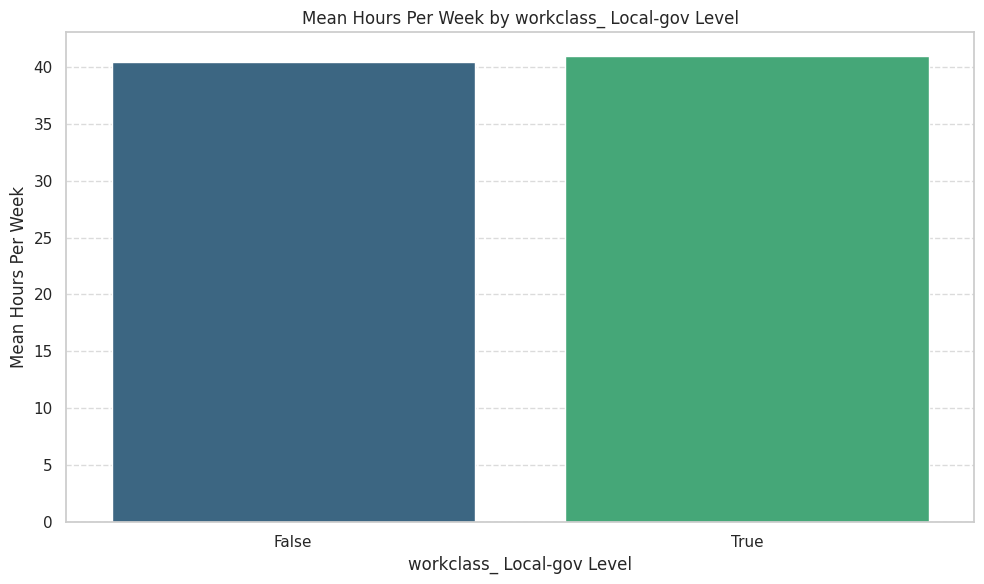


ANOVA F-statistic: 4.36
ANOVA P-value: 3.672e-02

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different workclass_ Local-gov levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for workclass_ Local-gov and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'workclass_ Local-gov'

# Calculate the mean hours per week for each level of workclass_ Local-gov
mean_hours_per_week_by_local_gov = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_local_gov)

# Create a bar plot for workclass_ Local-gov vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_local_gov.index, y=mean_hours_per_week_by_local_gov.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across workclass_ Local-gov levels
# Create a list of 'hours_per_week' for each 'col' group
local_gov_groups = []
for gov_level in df[col].unique():
    local_gov_groups.append(df[df[col] == gov_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*local_gov_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Workclass_ Local-gov vs. Hours Per Week

The analysis of workclass_ Local-gov versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 3.672e-02 with an F-statistic of 4.36).

Key Findings:
* Individuals categorized as True for workclass_ Local-gov (i.e., those working in Local Government) show a slightly higher mean hours_per_week (approximately 40.98 hours/week) compared to those categorized as False (working in other sectors), who work approximately 40.40 hours/week.
* The bar plot visually supported these differences, clearly illustrating the slightly higher average work hours for individuals in Local Government.
* The ANOVA test provides statistical evidence that the population means of hours_per_week are not equal across these two categories of workclass_ Local-gov.

Considerations for Modeling:
* Feature Importance: workclass_ Local-gov is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful, albeit small, difference in working hours associated with employment in local government.
* Encoding: As workclass_ Local-gov is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by workclass_ Never-worked Level:


workclass_ Never-worked
False    40.440038
True     28.428571
Name: hours_per_week, dtype: float64

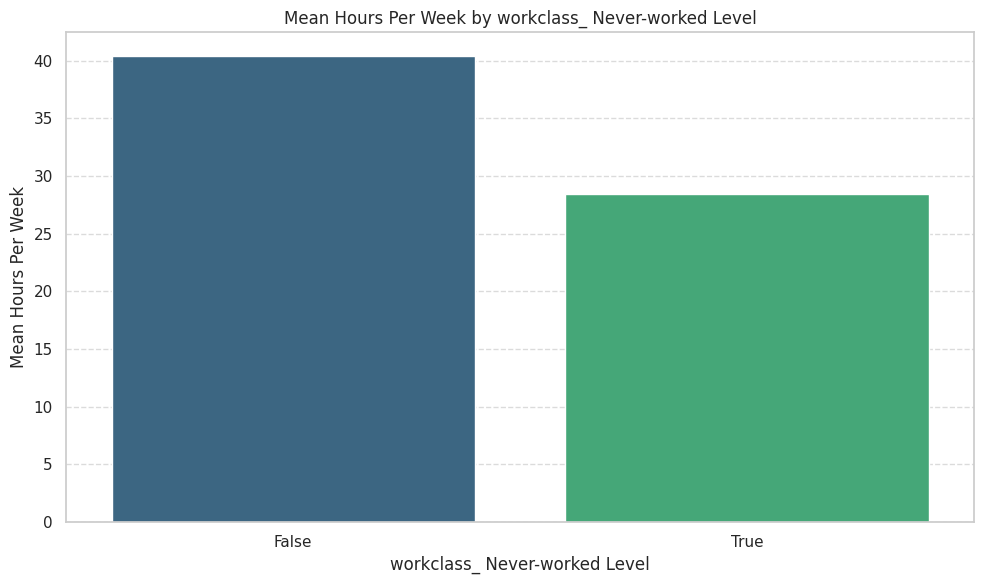


ANOVA F-statistic: 6.62
ANOVA P-value: 1.007e-02

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different workclass_ Never-worked levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for workclass_Never-worked and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'workclass_ Never-worked'

# Calculate the mean hours per week for each level of workclass_Never-worked
mean_hours_per_week_by_never_worked = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_never_worked)

# Create a bar plot for workclass_Never-worked vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_never_worked.index, y=mean_hours_per_week_by_never_worked.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across workclass_Never-worked levels
# Create a list of 'hours_per_week' for each 'col' group
never_worked_groups = []
for never_worked_level in df[col].unique():
    never_worked_groups.append(df[df[col] == never_worked_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*never_worked_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Workclass_ Never-worked vs. Hours Per Week

The analysis of workclass_ Never-worked versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.007e-02 with an F-statistic of 6.62).

Key Findings:
* Individuals categorized as False for workclass_ Never-worked (i.e., those who do work) show a significantly higher mean hours_per_week (approximately 40.44 hours/week) compared to those categorized as True (who Never-worked), who work approximately 28.43 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals who have never worked.
* The ANOVA test provides statistical evidence that the population means of hours_per_week are not equal across these two categories of workclass_ Never-worked.

Considerations for Modeling:
* Feature Importance: workclass_ Never-worked is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with employment status.
* Encoding: As workclass_ Never-worked is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by workclass_ Private Level:


workclass_ Private
False    40.829397
True     40.267096
Name: hours_per_week, dtype: float64

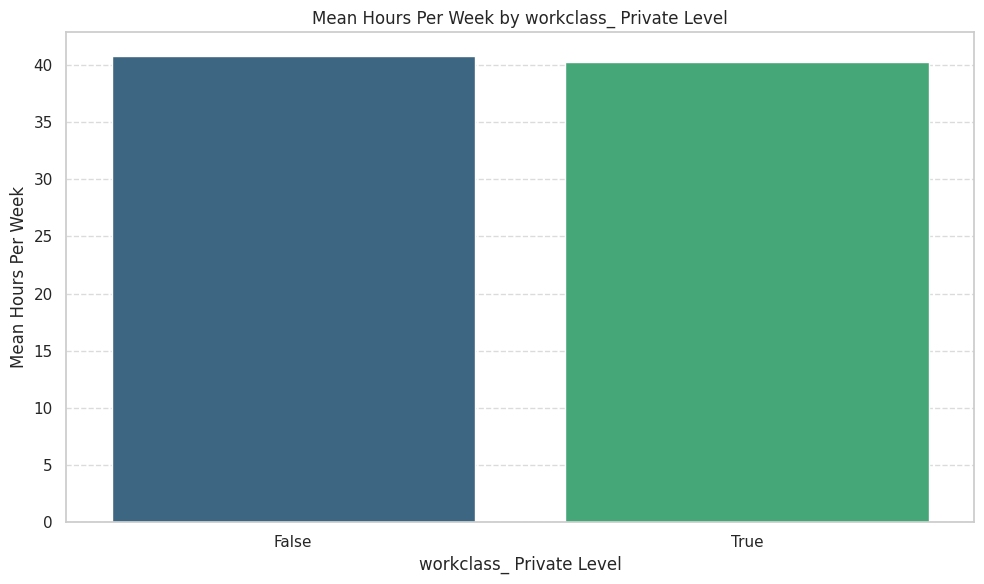


ANOVA F-statistic: 14.27
ANOVA P-value: 1.590e-04

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different workclass_ Private levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for workclass_Private and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'workclass_ Private'

# Calculate the mean hours per week for each level of workclass_Private
mean_hours_per_week_by_private = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_private)

# Create a bar plot for workclass_Private vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_private.index, y=mean_hours_per_week_by_private.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across workclass_Private levels
# Create a list of 'hours_per_week' for each 'col' group
private_groups = []
for private_level in df[col].unique():
    private_groups.append(df[df[col] == private_level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*private_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


Summary of Bivariate Analysis: Workclass_ Private vs. Hours Per Week

The analysis of workclass_ Private versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.590e-04 with an F-statistic of 14.27).

Key Findings:
* Individuals categorized as False for workclass_ Private (i.e., those working in non-private sectors) show a slightly higher mean hours_per_week (approximately 40.83 hours/week) compared to those categorized as True (working in the private sector), who work approximately 40.27 hours/week.
* The bar plot visually supported these differences, clearly illustrating the average work hours for individuals in the private versus non-private sectors.
* The ANOVA test provides statistical evidence that the population means of hours_per_week are not equal across these two categories of workclass_ Private.

Considerations for Modeling:
* Feature Importance: workclass_ Private is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful, albeit small, difference in working hours associated with employment in the private sector.
* Encoding: As workclass_ Private is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by workclass_ Self-emp-inc Level:


workclass_ Self-emp-inc
True     48.818100
False    40.140022
Name: hours_per_week, dtype: float64

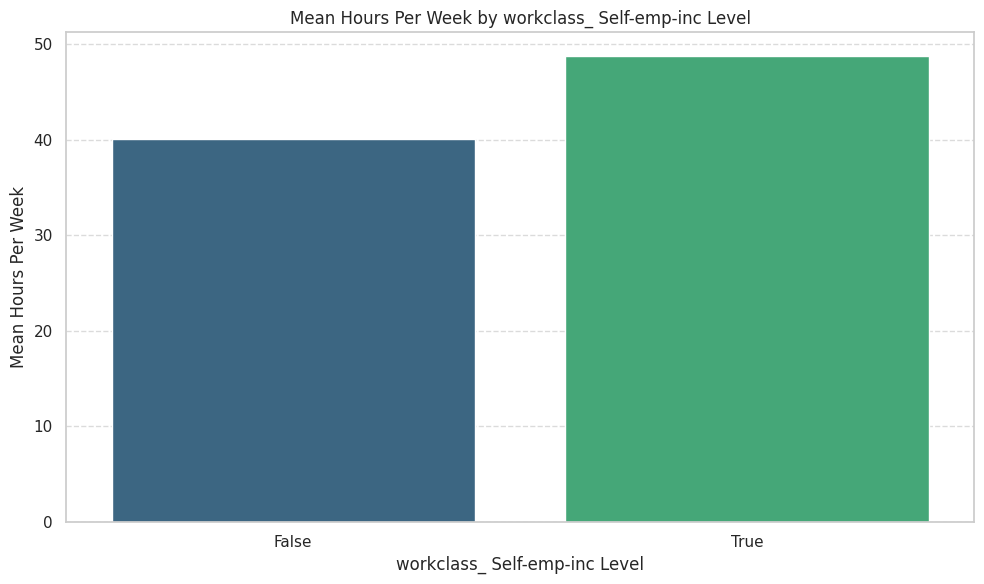


ANOVA F-statistic: 541.20
ANOVA P-value: 9.635e-119

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different workclass_ Self-emp-inc levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for workclass_ Self-emp-inc and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'workclass_ Self-emp-inc'

# Calculate the mean hours per week for each level of workclass_ Self-emp-inc
mean_hours_per_week_by_self_emp_inc = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_self_emp_inc)

# Create a bar plot for workclass_ Self-emp-inc vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_self_emp_inc.index, y=mean_hours_per_week_by_self_emp_inc.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across workclass_ Self-emp-inc levels
# Create a list of 'hours_per_week' for each 'col' group
self_emp_inc_groups = []
for level in df[col].unique():
    self_emp_inc_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*self_emp_inc_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Workclass_ Self-emp-inc vs. Hours Per Week

The analysis of workclass_ Self-emp-inc versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 9.635e-119 with an F-statistic of 541.20).

Key Findings:
* Individuals categorized as True for workclass_ Self-emp-inc (i.e., those who are self-employed with incorporated businesses) show a significantly higher mean hours_per_week (approximately 48.82 hours/week) compared to those categorized as False (working in other sectors), who work approximately 40.14 hours/week.
* The bar plot visually supported these differences, clearly illustrating the much higher average work hours for self-employed individuals with incorporated businesses.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of workclass_ Self-emp-inc.

Considerations for Modeling:
* Feature Importance: workclass_ Self-emp-inc is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a substantial difference in working hours associated with this specific work arrangement.
* Encoding: As workclass_ Self-emp-inc is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by workclass_ Self-emp-not-inc Level:


workclass_ Self-emp-not-inc
True     44.421881
False    40.100200
Name: hours_per_week, dtype: float64

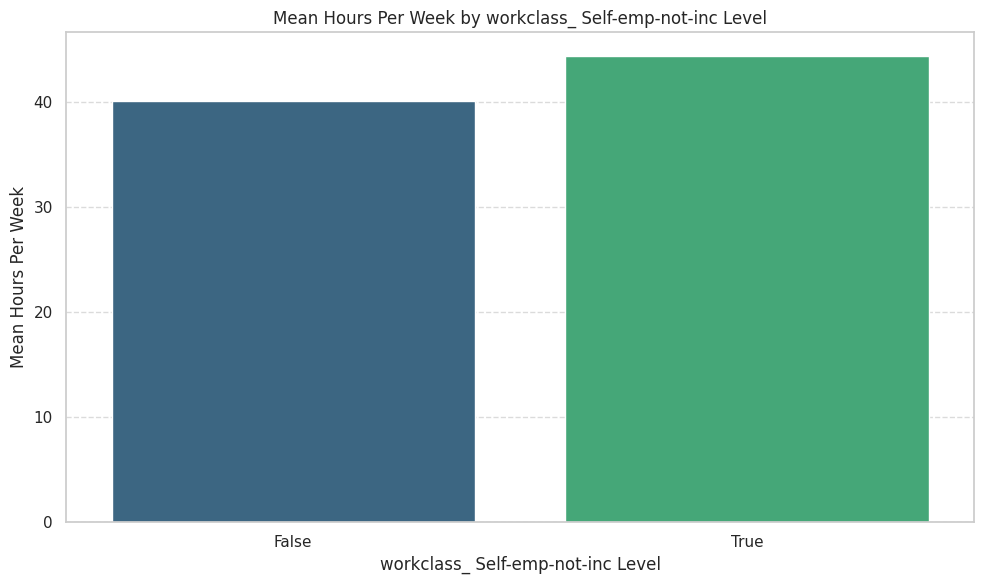


ANOVA F-statistic: 289.54
ANOVA P-value: 1.196e-64

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different workclass_ Self-emp-not-inc levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for workclass_ Self-emp-not-inc and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'workclass_ Self-emp-not-inc'

# Calculate the mean hours per week for each level of workclass_ Self-emp-not-inc
mean_hours_per_week_by_self_emp_not_inc = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_self_emp_not_inc)

# Create a bar plot for workclass_ Self-emp-not-inc vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_self_emp_not_inc.index, y=mean_hours_per_week_by_self_emp_not_inc.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across workclass_ Self-emp-not-inc levels
# Create a list of 'hours_per_week' for each 'col' group
self_emp_not_inc_groups = []
for level in df[col].unique():
    self_emp_not_inc_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*self_emp_not_inc_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Workclass_ Self-emp-not-inc vs. Hours Per Week

The analysis of workclass_ Self-emp-not-inc versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.196e-64 with an F-statistic of 289.54).

Key Findings:
* Individuals categorized as True for workclass_ Self-emp-not-inc (i.e., those who are self-employed but not incorporated) show a significantly higher mean hours_per_week (approximately 44.42 hours/week) compared to those categorized as False (working in other sectors), who work approximately 40.10 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for self-employed individuals not in incorporated businesses.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of workclass_ Self-emp-not-inc.

Considerations for Modeling:
* Feature Importance: workclass_ Self-emp-not-inc is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a substantial difference in working hours associated with this specific work arrangement.
* Encoding: As workclass_ Self-emp-not-inc is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by workclass_ State-gov Level:


workclass_ State-gov
False    40.495826
True     39.031587
Name: hours_per_week, dtype: float64

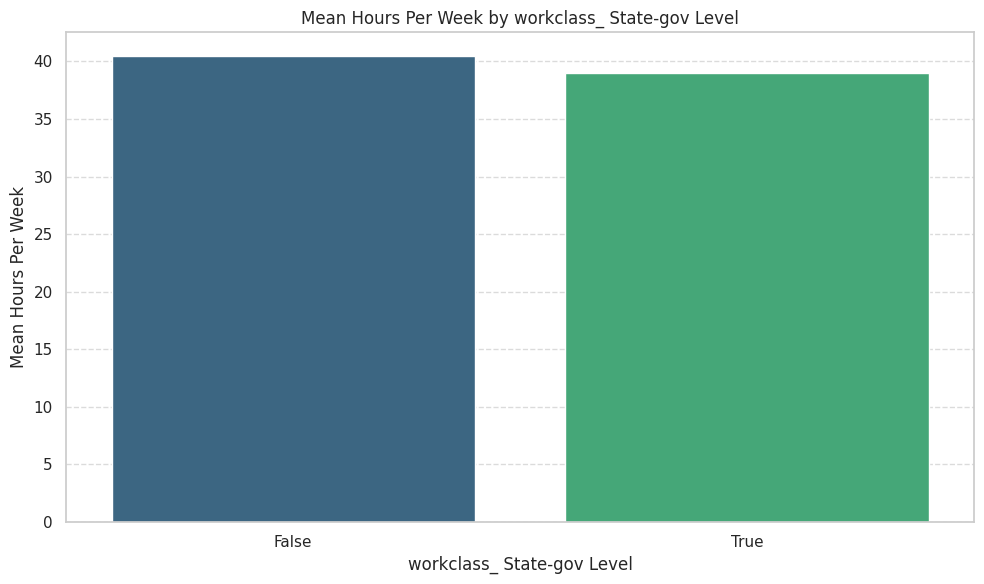


ANOVA F-statistic: 17.53
ANOVA P-value: 2.829e-05

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different workclass_ State-gov levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for workclass_ State-gov and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'workclass_ State-gov'

# Calculate the mean hours per week for each level of workclass_ State-gov
mean_hours_per_week_by_state_gov = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_state_gov)

# Create a bar plot for workclass_ State-gov vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_state_gov.index, y=mean_hours_per_week_by_state_gov.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across workclass_ State-gov levels
# Create a list of 'hours_per_week' for each 'col' group
state_gov_groups = []
for level in df[col].unique():
    state_gov_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*state_gov_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


Summary of Bivariate Analysis: Workclass_ State-gov vs. Hours Per Week

The analysis of workclass_ State-gov versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 2.829e-05 with an F-statistic of 17.53).

Key Findings:
* Individuals categorized as True for workclass_ State-gov (i.e., those working in State Government) show a slightly lower mean hours_per_week (approximately 39.03 hours/week) compared to those categorized as False (working in other sectors), who work approximately 40.50 hours/week.
* The bar plot visually supported these differences, clearly illustrating the average work hours for individuals in State Government versus non-State Government sectors.
* The ANOVA test provides statistical evidence that the population means of hours_per_week are not equal across these two categories of workclass_ State-gov.

Considerations for Modeling:
* Feature Importance: workclass_ State-gov is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful, albeit relatively small, difference in working hours associated with employment in state government.
* Encoding: As workclass_ State-gov is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by workclass_ Without-pay Level:


workclass_ Without-pay
False    40.440778
True     32.714286
Name: hours_per_week, dtype: float64

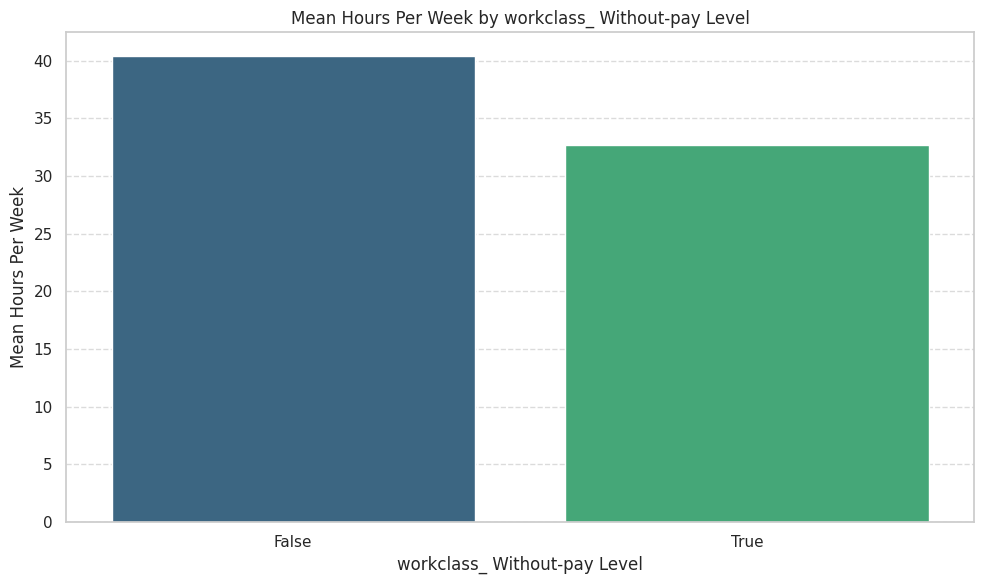


ANOVA F-statistic: 5.48
ANOVA P-value: 1.924e-02

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different workclass_ Without-pay levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for workclass_Without-pay and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'workclass_ Without-pay'

# Calculate the mean hours per week for each level of workclass_Without-pay
mean_hours_per_week_by_without_pay = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_without_pay)

# Create a bar plot for workclass_Without-pay vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_without_pay.index, y=mean_hours_per_week_by_without_pay.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across workclass_Without-pay levels
# Create a list of 'hours_per_week' for each 'col' group
without_pay_groups = []
for level in df[col].unique():
    without_pay_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*without_pay_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Workclass_ Without-pay vs. Hours Per Week

The analysis of workclass_ Without-pay versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.924e-02 with an F-statistic of 5.48).

Key Findings:
* Individuals categorized as False for workclass_ Without-pay (i.e., those who are paid for their work) show a significantly higher mean hours_per_week (approximately 40.44 hours/week) compared to those categorized as True (who work Without-pay), who work approximately 32.71 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals who work without pay.
* The ANOVA test provides statistical evidence that the population means of hours_per_week are not equal across these two categories of workclass_ Without-pay.

Considerations for Modeling:
* Feature Importance: workclass_ Without-pay is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with employment status.
* Encoding: As workclass_ Without-pay is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by workclass_Unknown Level:


workclass_Unknown
False    40.946461
True     31.919390
Name: hours_per_week, dtype: float64

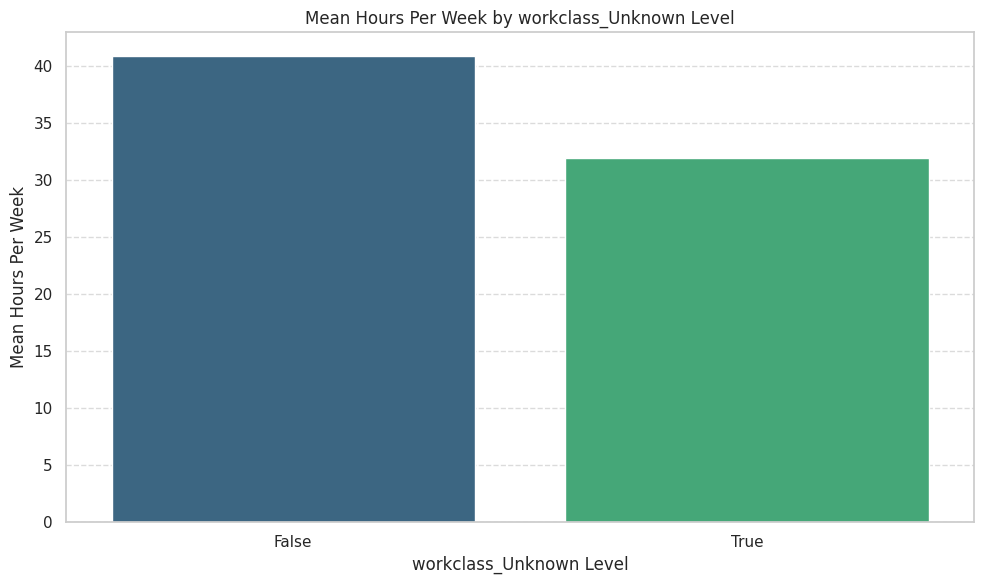


ANOVA F-statistic: 953.07
ANOVA P-value: 2.711e-206

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different workclass_Unknown levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for workclass_Unknown and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'workclass_Unknown'

# Calculate the mean hours per week for each level of workclass_Unknown
mean_hours_per_week_by_unknown = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_unknown)

# Create a bar plot for workclass_Unknown vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_unknown.index, y=mean_hours_per_week_by_unknown.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across workclass_Unknown levels
# Create a list of 'hours_per_week' for each 'col' group
unknown_groups = []
for level in df[col].unique():
    unknown_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*unknown_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


Summary of Bivariate Analysis: Workclass_Unknown vs. Hours Per Week

The analysis of workclass_Unknown versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 2.711e-206 with an F-statistic of 953.07).

Key Findings:
* Individuals categorized as False for workclass_Unknown (i.e., those with a known workclass) show a significantly higher mean hours_per_week (approximately 40.95 hours/week) compared to those categorized as True (whose workclass is unknown), who work approximately 31.92 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals with an unknown workclass.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of workclass_Unknown.

Considerations for Modeling:
* Feature Importance: workclass_Unknown is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a substantial difference in working hours associated with having an unknown workclass, which might signify non-participation in the formal labor force or atypical work patterns.
* Encoding: As workclass_Unknown is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Adm-clerical Level:


occupation_ Adm-clerical
False    40.814456
True     37.558355
Name: hours_per_week, dtype: float64

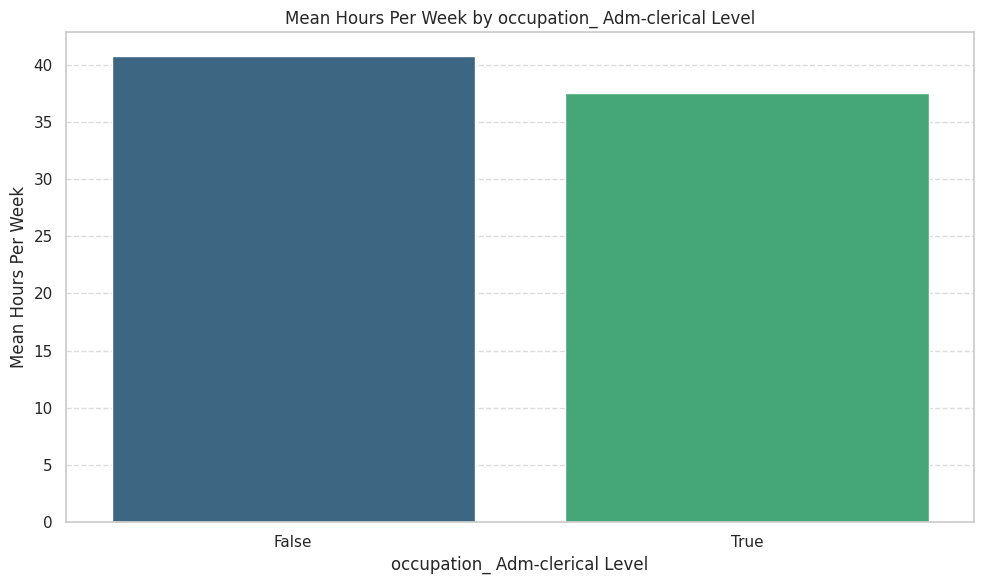


ANOVA F-statistic: 233.47
ANOVA P-value: 1.588e-52

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Adm-clerical levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_ Adm-clerical and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Adm-clerical'

# Calculate the mean hours per week for each level of occupation_ Adm-clerical
mean_hours_per_week_by_adm_clerical = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_adm_clerical)

# Create a bar plot for occupation_ Adm-clerical vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_adm_clerical.index, y=mean_hours_per_week_by_adm_clerical.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Adm-clerical levels
# Create a list of 'hours_per_week' for each 'col' group
adm_clerical_groups = []
for level in df[col].unique():
    adm_clerical_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*adm_clerical_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


Summary of Bivariate Analysis: Occupation_ Adm-clerical vs. Hours Per Week

The analysis of occupation_ Adm-clerical versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.588e-52 with an F-statistic of 233.47).

Key Findings:
* Individuals categorized as False for occupation_ Adm-clerical (i.e., those in other occupations) show a higher mean hours_per_week (approximately 40.81 hours/week) compared to those categorized as True (working in Adm-clerical), who work approximately 37.56 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals in administrative and clerical roles.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Adm-clerical.

Considerations for Modeling:
* Feature Importance: occupation_ Adm-clerical is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this occupation.
* Encoding: As occupation_ Adm-clerical is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Armed-Forces Level:


occupation_ Armed-Forces
True     40.666667
False    40.437392
Name: hours_per_week, dtype: float64

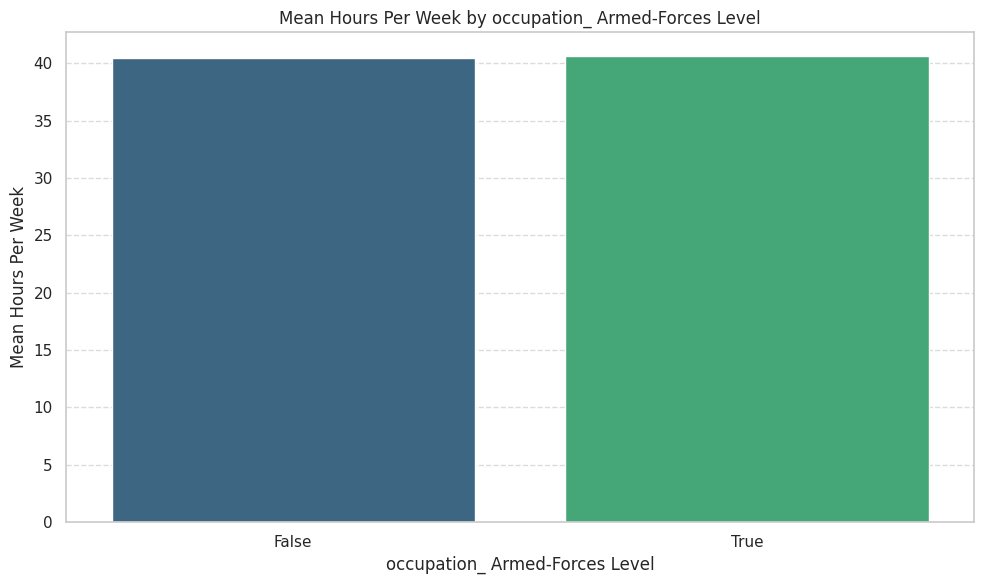


ANOVA F-statistic: 0.00
ANOVA P-value: 9.556e-01

Since the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.
There is no statistically significant difference in the mean 'hours_per_week' across different occupation_ Armed-Forces levels.


In [ ]:
# Bivariate analysis for occupation_ Armed-Forces and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Armed-Forces'

# Calculate the mean hours per week for each level of occupation_ Armed-Forces
mean_hours_per_week_by_armed_forces = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_armed_forces)

# Create a bar plot for occupation_ Armed-Forces vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_armed_forces.index, y=mean_hours_per_week_by_armed_forces.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Armed-Forces levels
# Create a list of 'hours_per_week' for each 'col' group
armed_forces_groups = []
for level in df[col].unique():
    armed_forces_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*armed_forces_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_ Armed-Forces vs. Hours Per Week

The analysis of occupation_ Armed-Forces versus hours_per_week reveals no statistically significant relationship. The ANOVA test confirmed that we fail to reject the null hypothesis (p-value = 0.09556, which is greater than 0.05). This means there is no statistically significant difference in the mean hours_per_week across individuals in the 'Armed-Forces' compared to those in other occupations.

Key Findings:
* Individuals categorized as True for occupation_ Armed-Forces (i.e., those working in Armed Forces) show a mean hours_per_week of approximately 40.67 hours/week, which is very similar to those categorized as False (working in other sectors), who work approximately 40.44 hours/week.
* The bar plot visually supported this minimal difference in average work hours.
* The ANOVA test's high p-value indicates that any observed difference in mean hours between these two groups is likely due to random chance, and not a true underlying difference.

Considerations for Modeling:
* Feature Importance: Given the lack of a statistically significant difference, occupation_ Armed-Forces (as a binary indicator) might not be a strong predictor for hours_per_week in predictive models. Its predictive power is likely very low.
* Feature Selection: You might consider removing this feature from your predictive models to reduce dimensionality and potential noise, as it does not appear to add significant explanatory power to hours_per_week.
* Low Sample Size: It's important to note that 'Armed-Forces' is a very small category in the dataset. Small sample sizes can sometimes lead to non-significant results, but in this case, the mean values are also very close, reinforcing the lack of a meaningful difference.


Mean 'hours_per_week' by occupation_ Craft-repair Level:


occupation_ Craft-repair
True     42.304221
False    40.168611
Name: hours_per_week, dtype: float64

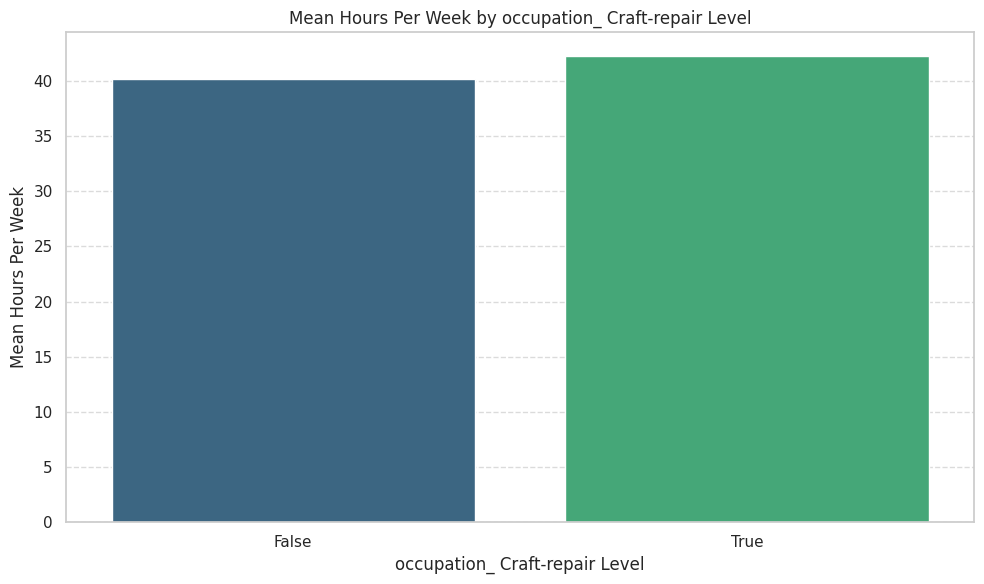


ANOVA F-statistic: 107.54
ANOVA P-value: 3.717e-25

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Craft-repair levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_ Craft-repair and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Craft-repair'

# Calculate the mean hours per week for each level of occupation_ Craft-repair
mean_hours_per_week_by_craft_repair = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_craft_repair)

# Create a bar plot for occupation_ Craft-repair vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_craft_repair.index, y=mean_hours_per_week_by_craft_repair.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Craft-repair levels
# Create a list of 'hours_per_week' for each 'col' group
craft_repair_groups = []
for level in df[col].unique():
    craft_repair_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*craft_repair_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_ Craft-repair vs. Hours Per Week

The analysis of occupation_ Craft-repair versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 3.717e-25 with an F-statistic of 107.54).

Key Findings:
* Individuals categorized as True for occupation_ Craft-repair (i.e., those working in Craft-repair) show a higher mean hours_per_week (approximately 42.30 hours/week) compared to those categorized as False (working in other occupations), who work approximately 40.17 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for individuals in craft and repair roles.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Craft-repair.

Considerations for Modeling:
* Feature Importance: occupation_ Craft-repair is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this occupation.
* Encoding: As occupation_ Craft-repair is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Exec-managerial Level:


occupation_ Exec-managerial
True     44.987703
False    39.788173
Name: hours_per_week, dtype: float64

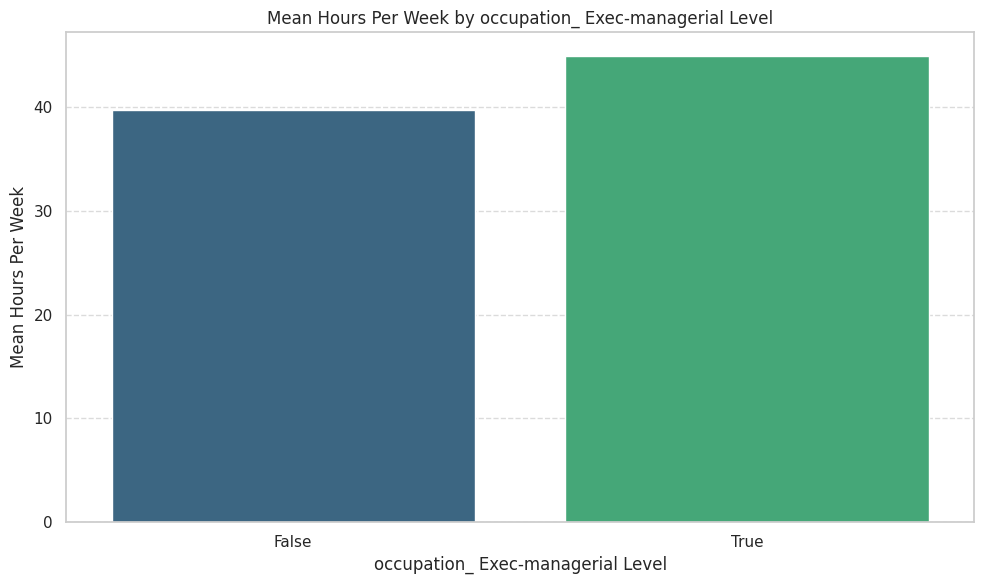


ANOVA F-statistic: 643.43
ANOVA P-value: 1.398e-140

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Exec-managerial levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_ Exec-managerial and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Exec-managerial'

# Calculate the mean hours per week for each level of occupation_ Exec-managerial
mean_hours_per_week_by_exec_managerial = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_exec_managerial)

# Create a bar plot for occupation_ Exec-managerial vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_exec_managerial.index, y=mean_hours_per_week_by_exec_managerial.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Exec-managerial levels
# Create a list of 'hours_per_week' for each 'col' group
exec_managerial_groups = []
for level in df[col].unique():
    exec_managerial_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*exec_managerial_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_ Exec-managerial vs. Hours Per Week

The analysis of occupation_ Exec-managerial versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.398e-140 with an F-statistic of 643.43).

Key Findings:
* Individuals categorized as True for occupation_ Exec-managerial (i.e., those in executive-managerial roles) show a significantly higher mean hours_per_week (approximately 44.99 hours/week) compared to those categorized as False (working in other occupations), who work approximately 39.79 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for individuals in executive and managerial positions.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Exec-managerial.

Considerations for Modeling:
* Feature Importance: occupation_ Exec-managerial is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a substantial difference in working hours associated with this occupation.
* Encoding: As occupation_ Exec-managerial is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Farming-fishing Level:


occupation_ Farming-fishing
True     46.989940
False    40.231127
Name: hours_per_week, dtype: float64

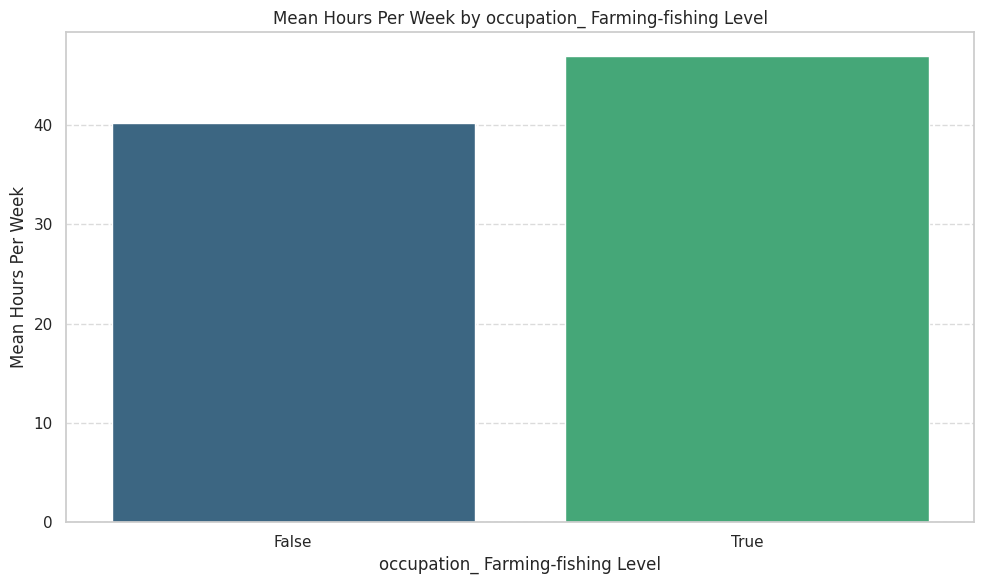


ANOVA F-statistic: 291.32
ANOVA P-value: 4.932e-65

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Farming-fishing levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_ Farming-fishing and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Farming-fishing'

# Calculate the mean hours per week for each level of occupation_ Farming-fishing
mean_hours_per_week_by_farming_fishing = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_farming_fishing)

# Create a bar plot for occupation_ Farming-fishing vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_farming_fishing.index, y=mean_hours_per_week_by_farming_fishing.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Farming-fishing levels
# Create a list of 'hours_per_week' for each 'col' group
farming_fishing_groups = []
for level in df[col].unique():
    farming_fishing_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*farming_fishing_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_ Farming-fishing vs. Hours Per Week

The analysis of occupation_ Farming-fishing versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 4.932e-65 with an F-statistic of 291.32).

Key Findings:
* Individuals categorized as True for occupation_ Farming-fishing (i.e., those working in Farming-fishing) show a significantly higher mean hours_per_week (approximately 46.99 hours/week) compared to those categorized as False (working in other occupations), who work approximately 40.23 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for individuals in farming and fishing roles.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Farming-fishing.

Considerations for Modeling:
* Feature Importance: occupation_ Farming-fishing is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a substantial difference in working hours associated with this occupation.
* Encoding: As occupation_ Farming-fishing is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Handlers-cleaners Level:


occupation_ Handlers-cleaners
False    40.546824
True     37.947445
Name: hours_per_week, dtype: float64

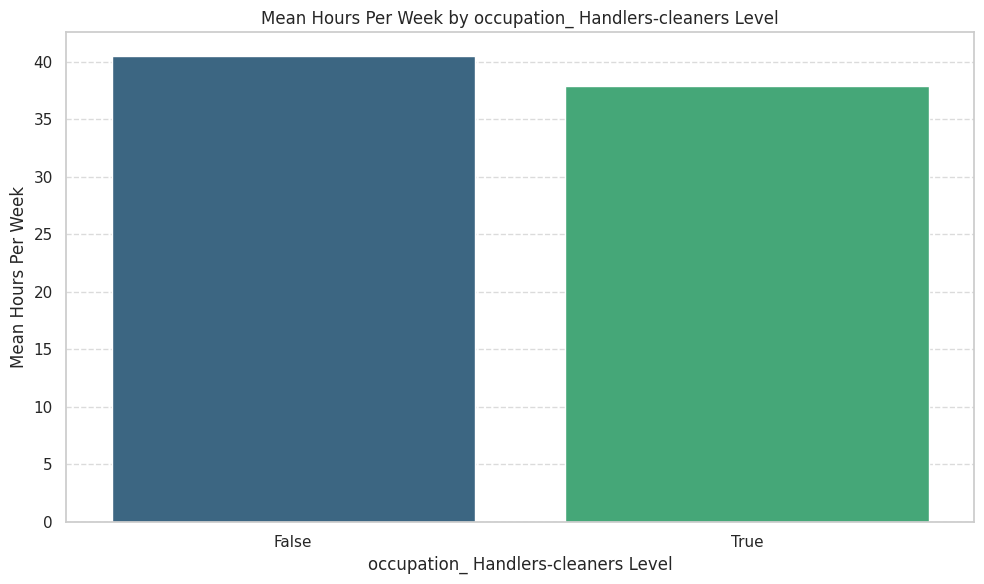


ANOVA F-statistic: 58.26
ANOVA P-value: 2.354e-14

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Handlers-cleaners levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_ Handlers-cleaners and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Handlers-cleaners'

# Calculate the mean hours per week for each level of occupation_ Handlers-cleaners
mean_hours_per_week_by_handlers_cleaners = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_handlers_cleaners)

# Create a bar plot for occupation_ Handlers-cleaners vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_handlers_cleaners.index, y=mean_hours_per_week_by_handlers_cleaners.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Handlers-cleaners levels
# Create a list of 'hours_per_week' for each 'col' group
handlers_cleaners_groups = []
for level in df[col].unique():
    handlers_cleaners_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*handlers_cleaners_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_ Handlers-cleaners vs. Hours Per Week

The analysis of occupation_ Handlers-cleaners versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 2.354e-14 with an F-statistic of 58.26).

Key Findings:
* Individuals categorized as False for occupation_ Handlers-cleaners (i.e., those in other occupations) show a higher mean hours_per_week (approximately 40.55 hours/week) compared to those categorized as True (working as Handlers-cleaners), who work approximately 37.95 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals in handlers and cleaners roles.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Handlers-cleaners.

Considerations for Modeling:
* Feature Importance: occupation_ Handlers-cleaners is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this occupation.
* Encoding: As occupation_ Handlers-cleaners is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Machine-op-inspct Level:


occupation_ Machine-op-inspct
True     40.755744
False    40.416604
Name: hours_per_week, dtype: float64

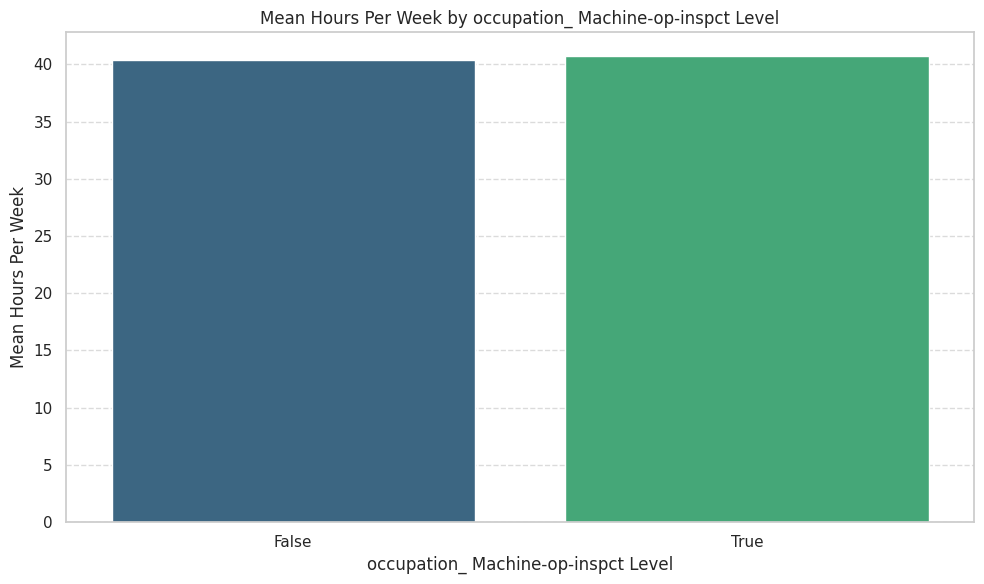


ANOVA F-statistic: 1.42
ANOVA P-value: 2.338e-01

Since the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.
There is no statistically significant difference in the mean 'hours_per_week' across different occupation_ Machine-op-inspct levels.


In [ ]:
# Bivariate analysis for occupation_ Machine-op-inspct and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Machine-op-inspct'

# Calculate the mean hours per week for each level of occupation_ Machine-op-inspct
mean_hours_per_week_by_machine_op_inspct = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_machine_op_inspct)

# Create a bar plot for occupation_ Machine-op-inspct vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_machine_op_inspct.index, y=mean_hours_per_week_by_machine_op_inspct.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Machine-op-inspct levels
# Create a list of 'hours_per_week' for each 'col' group
machine_op_inspct_groups = []
for level in df[col].unique():
    machine_op_inspct_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*machine_op_inspct_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_ Machine-op-inspct vs. Hours Per Week

The analysis of occupation_ Machine-op-inspct versus hours_per_week reveals no statistically significant relationship. The ANOVA test confirmed that we fail to reject the null hypothesis (p-value = 0.2338e-01, which is greater than 0.05). This means there is no statistically significant difference in the mean hours_per_week across individuals in 'Machine-op-inspct' compared to those in other occupations.

Key Findings:
* Individuals categorized as True for occupation_ Machine-op-inspct (i.e., those working as machine operators or inspectors) show a mean hours_per_week of approximately 40.76 hours/week, which is very similar to those categorized as False (working in other occupations), who work approximately 40.42 hours/week.
* The bar plot visually supported this minimal difference in average work hours.
* The ANOVA test's high p-value indicates that any observed difference in mean hours between these two groups is likely due to random chance, and not a true underlying difference.

Considerations for Modeling:
* Feature Importance: Given the lack of a statistically significant difference, occupation_ Machine-op-inspct (as a binary indicator) might not be a strong predictor for hours_per_week in predictive models. Its predictive power is likely very low.
* Feature Selection: You might consider removing this feature from your predictive models to reduce dimensionality and potential noise, as it does not appear to add significant explanatory power to hours_per_week.
* Low Predictive Power: While statistically non-significant, it's worth noting the numerical proximity of the mean hours worked. This feature might not offer much discriminatory power for the target variable.


Mean 'hours_per_week' by occupation_ Other-service Level:


occupation_ Other-service
False    41.083237
True     34.701669
Name: hours_per_week, dtype: float64

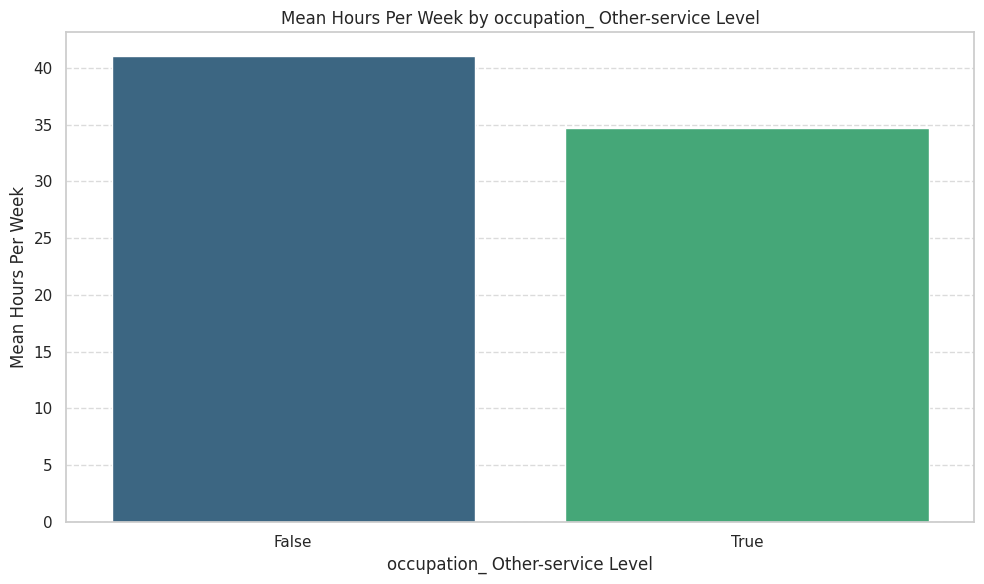


ANOVA F-statistic: 810.76
ANOVA P-value: 3.586e-176

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Other-service levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_ Other-service and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Other-service'

# Calculate the mean hours per week for each level of occupation_ Other-service
mean_hours_per_week_by_other_service = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_other_service)

# Create a bar plot for occupation_ Other-service vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_other_service.index, y=mean_hours_per_week_by_other_service.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Other-service levels
# Create a list of 'hours_per_week' for each 'col' group
other_service_groups = []
for level in df[col].unique():
    other_service_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*other_service_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


Summary of Bivariate Analysis: Occupation_ Other-service vs. Hours Per Week

The analysis of occupation_ Other-service versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 3.586e-176 with an F-statistic of 810.76).

Key Findings:
* Individuals categorized as False for occupation_ Other-service (i.e., those in other occupations) show a significantly higher mean hours_per_week (approximately 41.08 hours/week) compared to those categorized as True (working in Other-service roles), who work approximately 34.70 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals in other service roles.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Other-service.

Considerations for Modeling:
* Feature Importance: occupation_ Other-service is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a substantial difference in working hours associated with this occupation.
* Encoding: As occupation_ Other-service is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Priv-house-serv Level:


occupation_ Priv-house-serv
False    40.472171
True     32.885906
Name: hours_per_week, dtype: float64

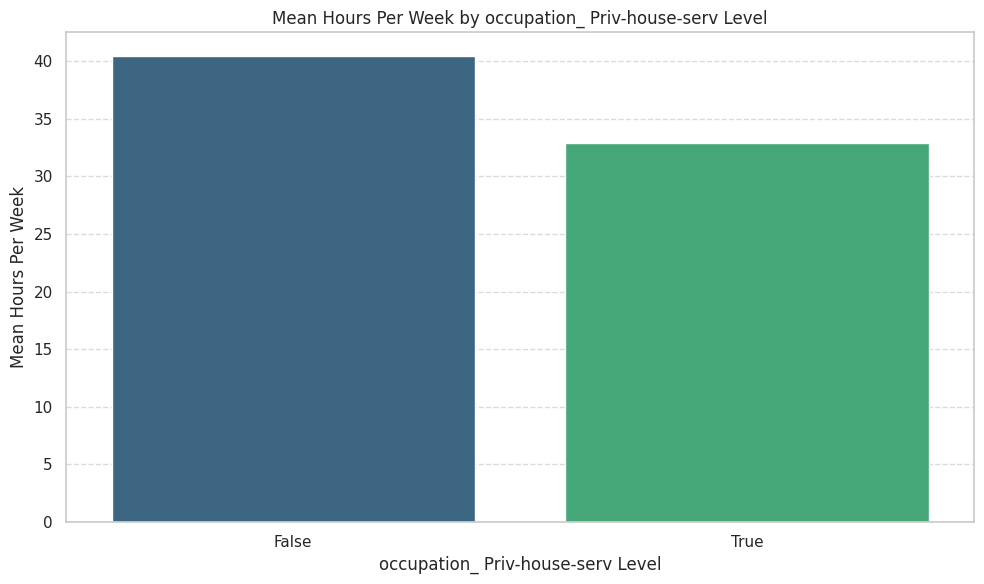


ANOVA F-statistic: 56.08
ANOVA P-value: 7.123e-14

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Priv-house-serv levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_ Priv-house-serv and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Priv-house-serv'

# Calculate the mean hours per week for each level of occupation_ Priv-house-serv
mean_hours_per_week_by_priv_house_serv = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_priv_house_serv)

# Create a bar plot for occupation_ Priv-house-serv vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_priv_house_serv.index, y=mean_hours_per_week_by_priv_house_serv.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Priv-house-serv levels
# Create a list of 'hours_per_week' for each 'col' group
priv_house_serv_groups = []
for level in df[col].unique():
    priv_house_serv_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*priv_house_serv_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_ Priv-house-serv vs. Hours Per Week

The analysis of occupation_ Priv-house-serv versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 7.123e-14 with an F-statistic of 56.08).

Key Findings:
* Individuals categorized as False for occupation_ Priv-house-serv (i.e., those in other occupations) show a significantly higher mean hours_per_week (approximately 40.47 hours/week) compared to those categorized as True (working in Private household service), who work approximately 32.89 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals in private household service roles.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Priv-house-serv.

Considerations for Modeling:
* Feature Importance: occupation_ Priv-house-serv is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this occupation.
* Encoding: As occupation_ Priv-house-serv is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Prof-specialty Level:


occupation_ Prof-specialty
True     42.386715
False    40.153513
Name: hours_per_week, dtype: float64

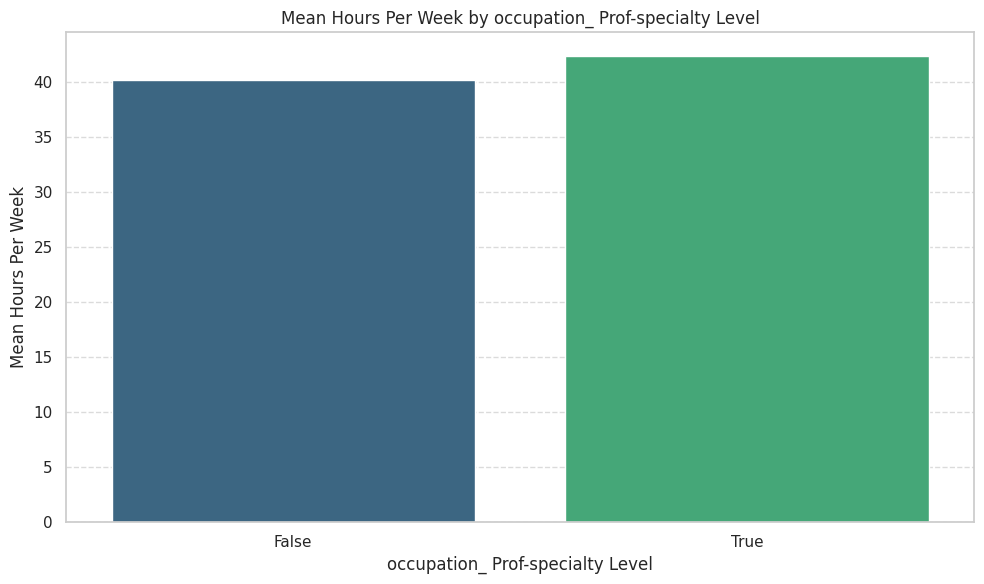


ANOVA F-statistic: 118.63
ANOVA P-value: 1.405e-27

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Prof-specialty levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_ Prof-specialty and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Prof-specialty'

# Calculate the mean hours per week for each level of occupation_ Prof-specialty
mean_hours_per_week_by_prof_specialty = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_prof_specialty)

# Create a bar plot for occupation_ Prof-specialty vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_prof_specialty.index, y=mean_hours_per_week_by_prof_specialty.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Prof-specialty levels
# Create a list of 'hours_per_week' for each 'col' group
prof_specialty_groups = []
for level in df[col].unique():
    prof_specialty_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*prof_specialty_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


Summary of Bivariate Analysis: Occupation_ Prof-specialty vs. Hours Per Week

The analysis of occupation_ Prof-specialty versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.405e-27 with an F-statistic of 118.63).

Key Findings:
* Individuals categorized as True for occupation_ Prof-specialty (i.e., those in professional specialty roles) show a higher mean hours_per_week (approximately 42.39 hours/week) compared to those categorized as False (working in other occupations), who work approximately 40.15 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for individuals in professional specialty roles.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Prof-specialty.

Considerations for Modeling:
* Feature Importance: occupation_ Prof-specialty is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this occupation.
* Encoding: As occupation_ Prof-specialty is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Protective-serv Level:


occupation_ Protective-serv
True     42.870570
False    40.387973
Name: hours_per_week, dtype: float64

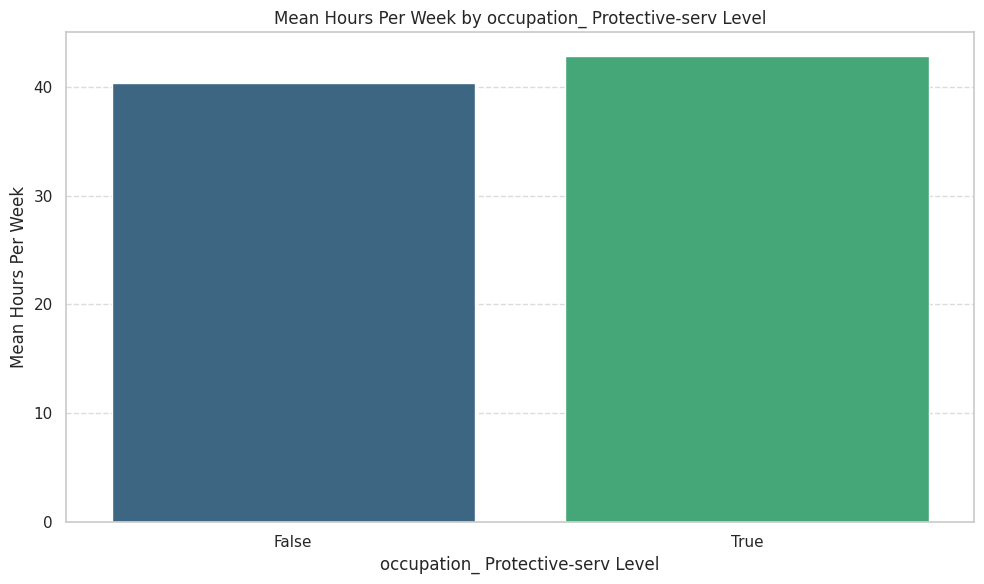


ANOVA F-statistic: 25.73
ANOVA P-value: 3.942e-07

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Protective-serv levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_ Protective-serv and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Protective-serv'

# Calculate the mean hours per week for each level of occupation_ Protective-serv
mean_hours_per_week_by_protective_serv = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_protective_serv)

# Create a bar plot for occupation_ Protective-serv vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_protective_serv.index, y=mean_hours_per_week_by_protective_serv.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_ Protective-serv levels
# Create a list of 'hours_per_week' for each 'col' group
protective_serv_groups = []
for level in df[col].unique():
    protective_serv_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*protective_serv_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_ Protective-serv vs. Hours Per Week

The analysis of occupation_ Protective-serv versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 3.942e-07 with an F-statistic of 25.73).

Key Findings:
* Individuals categorized as True for occupation_ Protective-serv (i.e., those working in Protective Services) show a higher mean hours_per_week (approximately 42.87 hours/week) compared to those categorized as False (working in other occupations), who work approximately 40.39 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for individuals in protective service roles.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Protective-serv.

Considerations for Modeling:
* Feature Importance: occupation_ Protective-serv is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this occupation.
* Encoding: As occupation_ Protective-serv is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Sales Level:


occupation_ Sales
True     40.781096
False    40.394071
Name: hours_per_week, dtype: float64

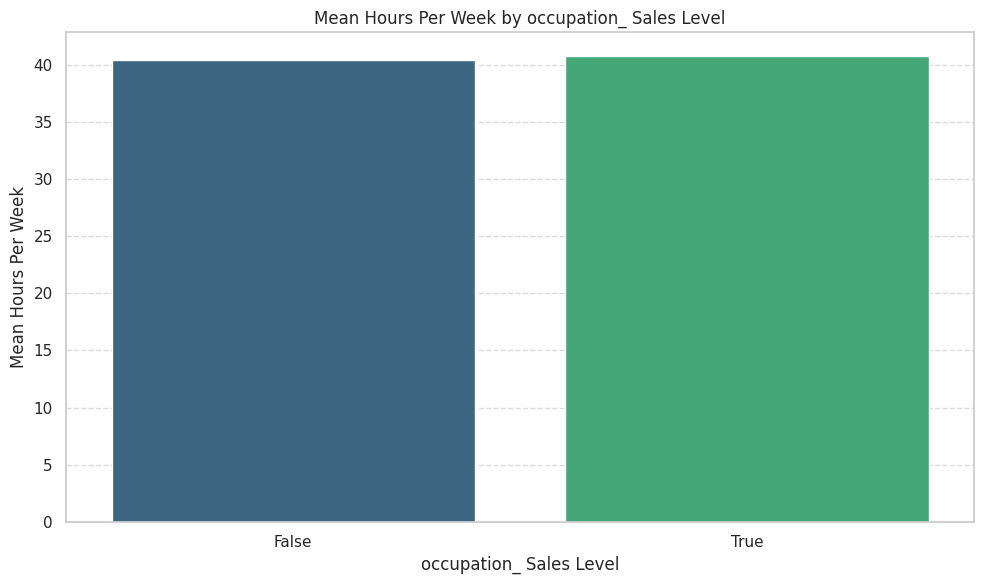


ANOVA F-statistic: 3.18
ANOVA P-value: 7.436e-02

Since the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.
There is no statistically significant difference in the mean 'hours_per_week' across different occupation_ Sales levels.


In [ ]:
# Bivariate analysis for occupation_Sales and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Sales'

# Calculate the mean hours per week for each level of occupation_Sales
mean_hours_per_week_by_sales = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_sales)

# Create a bar plot for occupation_Sales vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_sales.index, y=mean_hours_per_week_by_sales.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_Sales levels
# Create a list of 'hours_per_week' for each 'col' group
sales_groups = []
for level in df[col].unique():
    sales_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*sales_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_ Sales vs. Hours Per Week

The analysis of occupation_ Sales versus hours_per_week reveals no statistically significant relationship. The ANOVA test confirmed that we fail to reject the null hypothesis (p-value = 7.436e-02, which is greater than 0.05). This means there is no statistically significant difference in the mean hours_per_week across individuals in 'Sales' compared to those in other occupations.

Key Findings:
* Individuals categorized as True for occupation_ Sales (i.e., those working in Sales) show a mean hours_per_week of approximately 40.78 hours/week, which is very similar to those categorized as False (working in other occupations), who work approximately 40.39 hours/week.
* The bar plot visually supported this minimal difference in average work hours.
* The ANOVA test's high p-value indicates that any observed difference in mean hours between these two groups is likely due to random chance, and not a true underlying difference.

Considerations for Modeling:
* Feature Importance: Given the lack of a statistically significant difference, occupation_ Sales (as a binary indicator) might not be a strong predictor for hours_per_week in predictive models. Its predictive power is likely very low.
* Feature Selection: You might consider removing this feature from your predictive models to reduce dimensionality and potential noise, as it does not appear to add significant explanatory power to hours_per_week.
* Low Predictive Power: While statistically non-significant, it's worth noting the numerical proximity of the mean hours worked. This feature might not offer much discriminatory power for the target variable.


Mean 'hours_per_week' by occupation_ Tech-support Level:


occupation_ Tech-support
False    40.466949
True     39.432112
Name: hours_per_week, dtype: float64

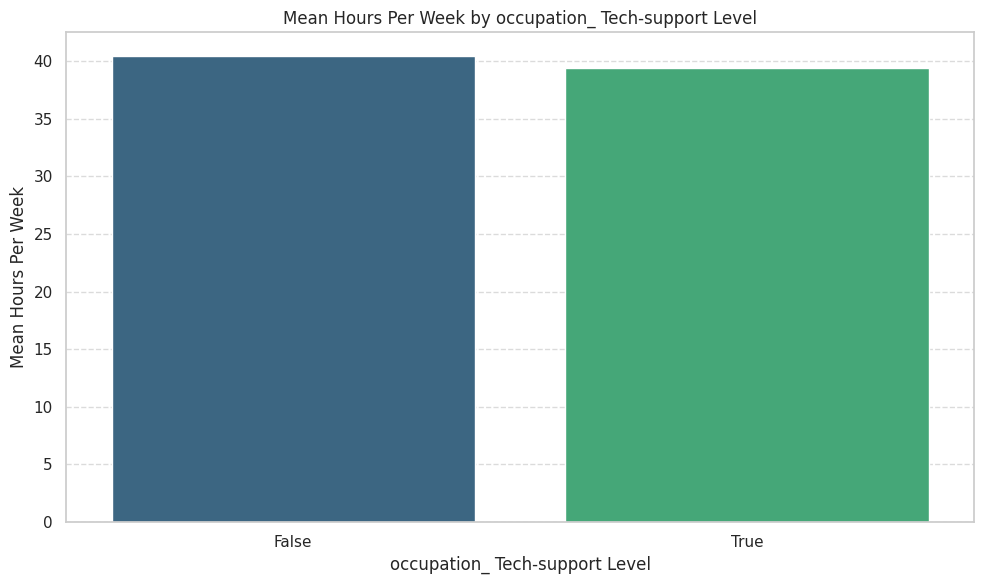


ANOVA F-statistic: 6.33
ANOVA P-value: 1.185e-02

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Tech-support levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_Tech-support and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Tech-support'

# Calculate the mean hours per week for each level of occupation_Tech-support
mean_hours_per_week_by_tech_support = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_tech_support)

# Create a bar plot for occupation_Tech-support vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_tech_support.index, y=mean_hours_per_week_by_tech_support.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_Tech-support levels
# Create a list of 'hours_per_week' for each 'col' group
tech_support_groups = []
for level in df[col].unique():
    tech_support_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*tech_support_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


Summary of Bivariate Analysis: Occupation_ Tech-support vs. Hours Per Week

The analysis of occupation_ Tech-support versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.185e-02 with an F-statistic of 6.33).

Key Findings:
* Individuals categorized as True for occupation_ Tech-support (i.e., those working in Tech-support roles) show a slightly lower mean hours_per_week (approximately 39.43 hours/week) compared to those categorized as False (working in other occupations), who work approximately 40.47 hours/week.
* The bar plot visually supported these differences, clearly illustrating the average work hours for individuals in tech support roles versus other occupations.
* The ANOVA test provides statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Tech-support.

Considerations for Modeling:
* Feature Importance: occupation_ Tech-support is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful, albeit relatively small, difference in working hours associated with this occupation.
* Encoding: As occupation_ Tech-support is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_ Transport-moving Level:


occupation_ Transport-moving
True     44.656230
False    40.219868
Name: hours_per_week, dtype: float64

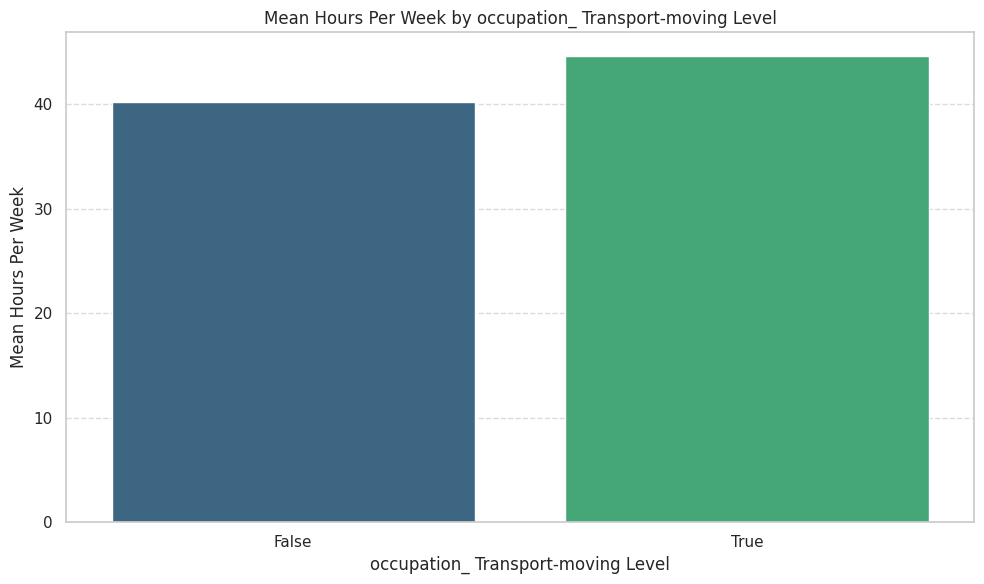


ANOVA F-statistic: 197.23
ANOVA P-value: 1.134e-44

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_ Transport-moving levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_Transport-moving and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_ Transport-moving'

# Calculate the mean hours per week for each level of occupation_Transport-moving
mean_hours_per_week_by_transport_moving = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_transport_moving)

# Create a bar plot for occupation_Transport-moving vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_transport_moving.index, y=mean_hours_per_week_by_transport_moving.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_Transport-moving levels
# Create a list of 'hours_per_week' for each 'col' group
transport_moving_groups = []
for level in df[col].unique():
    transport_moving_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*transport_moving_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_ Transport-moving vs. Hours Per Week

The analysis of occupation_ Transport-moving versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.134e-44 with an F-statistic of 197.23).

Key Findings:
* Individuals categorized as True for occupation_ Transport-moving (i.e., those working in Transport-moving roles) show a significantly higher mean hours_per_week (approximately 44.66 hours/week) compared to those categorized as False (working in other occupations), who work approximately 40.22 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for individuals in transport and moving roles.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_ Transport-moving.

Considerations for Modeling:
* Feature Importance: occupation_ Transport-moving is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a substantial difference in working hours associated with this occupation.
* Encoding: As occupation_ Transport-moving is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by occupation_Unknown Level:


occupation_Unknown
False    40.949313
True     31.906131
Name: hours_per_week, dtype: float64

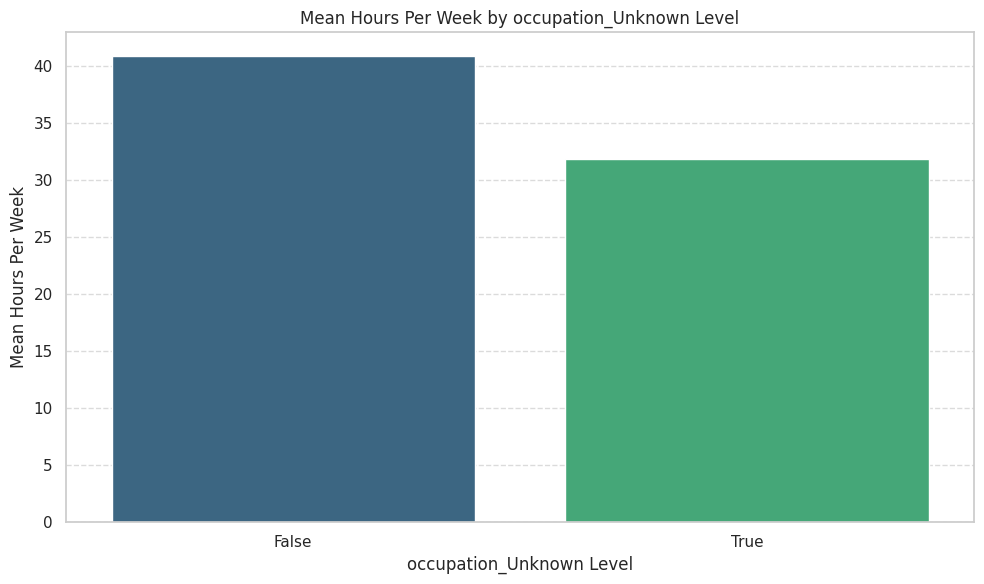


ANOVA F-statistic: 960.10
ANOVA P-value: 8.864e-208

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different occupation_Unknown levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for occupation_Unknown and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'occupation_Unknown'

# Calculate the mean hours per week for each level of occupation_Unknown
mean_hours_per_week_by_unknown_occupation = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_unknown_occupation)

# Create a bar plot for occupation_Unknown vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_unknown_occupation.index, y=mean_hours_per_week_by_unknown_occupation.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across occupation_Unknown levels
# Create a list of 'hours_per_week' for each 'col' group
unknown_occupation_groups = []
for level in df[col].unique():
    unknown_occupation_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*unknown_occupation_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Occupation_Unknown vs. Hours Per Week

The analysis of occupation_Unknown versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 8.864e-208 with an F-statistic of 960.10).

Key Findings:
* Individuals categorized as False for occupation_Unknown (i.e., those with a known occupation) show a significantly higher mean hours_per_week (approximately 40.95 hours/week) compared to those categorized as True (whose occupation is unknown), who work approximately 31.91 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals with an unknown occupation.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of occupation_Unknown.

Considerations for Modeling:
* Feature Importance: occupation_Unknown is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a substantial difference in working hours associated with having an unknown occupation, which might signify non-participation in the formal labor force or atypical work patterns.
* Encoding: As occupation_Unknown is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by relationship_ Husband Level:


relationship_ Husband
True     44.120139
False    37.928903
Name: hours_per_week, dtype: float64

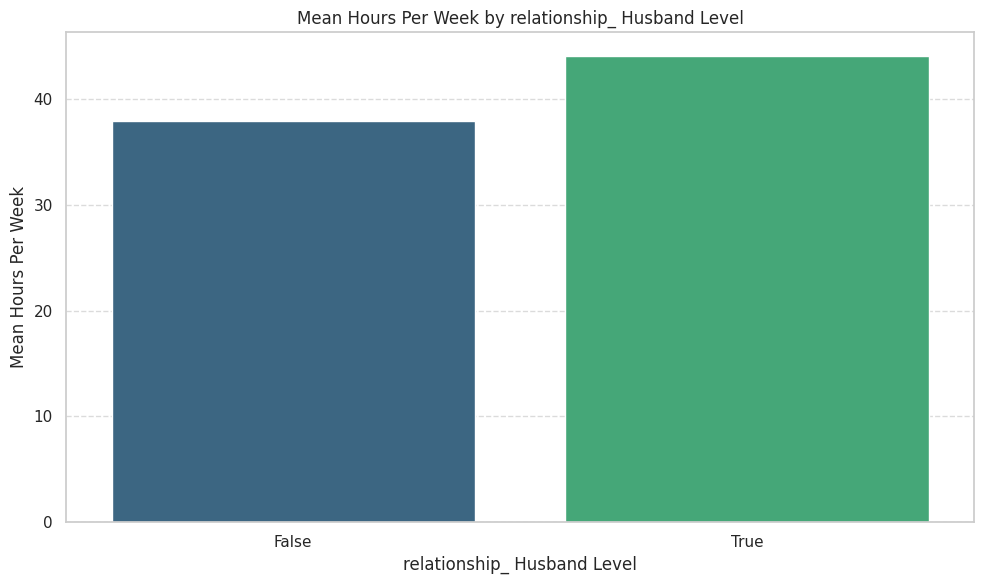


ANOVA F-statistic: 2100.23
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different relationship_ Husband levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for relationship_Husband and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'relationship_ Husband'

# Calculate the mean hours per week for each level of relationship_Husband
mean_hours_per_week_by_husband = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_husband)

# Create a bar plot for relationship_Husband vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_husband.index, y=mean_hours_per_week_by_husband.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across relationship_Husband levels
# Create a list of 'hours_per_week' for each 'col' group
husband_groups = []
for level in df[col].unique():
    husband_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*husband_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Relationship_ Husband vs. Hours Per Week

The analysis of relationship_ Husband versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 0.000e+00 with an F-statistic of 2100.23).

Key Findings:
* Individuals categorized as True for relationship_ Husband (i.e., men identified as husbands in the relationship category) show a significantly higher mean hours_per_week (approximately 44.12 hours/week) compared to those categorized as False (all other relationship statuses), who work approximately 37.93 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for individuals identified as husbands.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of relationship_ Husband.

Considerations for Modeling:
* Feature Importance: relationship_ Husband is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a substantial difference in working hours associated with this relationship status.
* Encoding: As relationship_ Husband is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by relationship_ Not-in-family Level:


relationship_ Not-in-family
True     40.595665
False    40.383287
Name: hours_per_week, dtype: float64

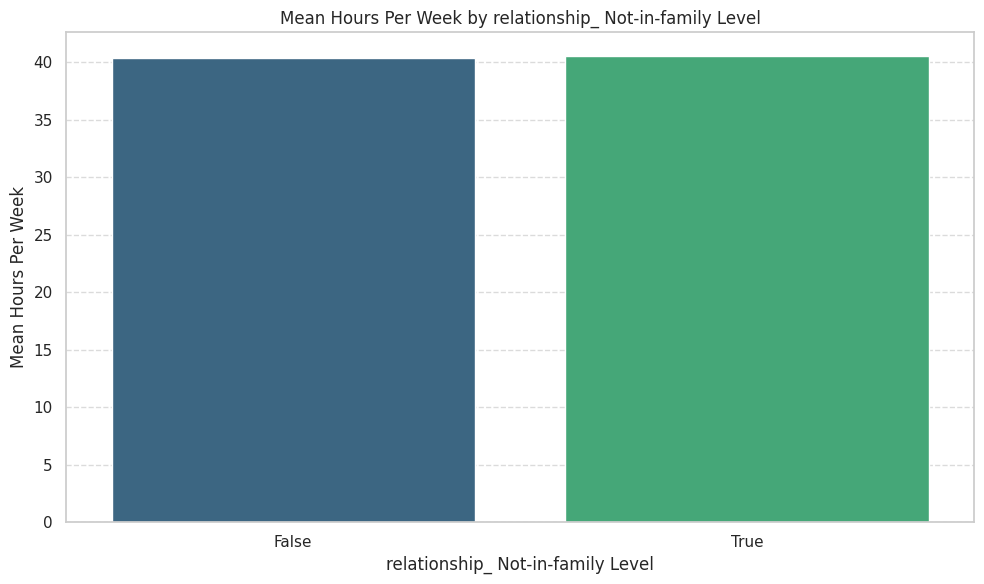


ANOVA F-statistic: 1.83
ANOVA P-value: 1.761e-01

Since the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.
There is no statistically significant difference in the mean 'hours_per_week' across different relationship_ Not-in-family levels.


In [ ]:
# Bivariate analysis for relationship_Not-in-family and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'relationship_ Not-in-family'

# Calculate the mean hours per week for each level of relationship_ Not-in-family
mean_hours_per_week_by_not_in_family = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_not_in_family)

# Create a bar plot for relationship_ Not-in-family vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_not_in_family.index, y=mean_hours_per_week_by_not_in_family.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across relationship_ Not-in-family levels
# Create a list of 'hours_per_week' for each 'col' group
not_in_family_groups = []
for level in df[col].unique():
    not_in_family_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*not_in_family_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Relationship_ Not-in-family vs. Hours Per Week

The analysis of relationship_ Not-in-family versus hours_per_week reveals no statistically significant relationship. The ANOVA test confirmed that we fail to reject the null hypothesis (p-value = 1.761e-01, which is greater than 0.05). This means there is no statistically significant difference in the mean hours_per_week across individuals categorized as 'Not-in-family' compared to those in other relationship categories.

Key Findings:
* Individuals categorized as True for relationship_ Not-in-family (i.e., those not in a traditional family unit) show a mean hours_per_week of approximately 40.60 hours/week, which is very similar to those categorized as False (in other relationship statuses), who work approximately 40.38 hours/week.
* The bar plot visually supported this minimal difference in average work hours.
* The ANOVA test's high p-value indicates that any observed difference in mean hours between these two groups is likely due to random chance, and not a true underlying difference.

Considerations for Modeling:
* Feature Importance: Given the lack of a statistically significant difference, relationship_ Not-in-family (as a binary indicator) might not be a strong predictor for hours_per_week in predictive models. Its predictive power is likely very low.
* Feature Selection: You might consider removing this feature from your predictive models to reduce dimensionality and potential noise, as it does not appear to add significant explanatory power to hours_per_week.
* Low Predictive Power: While statistically non-significant, it's worth noting the numerical proximity of the mean hours worked. This feature might not offer much discriminatory power for the target variable.


Mean 'hours_per_week' by relationship_ Other-relative Level:


relationship_ Other-relative
False    40.544047
True     37.006116
Name: hours_per_week, dtype: float64

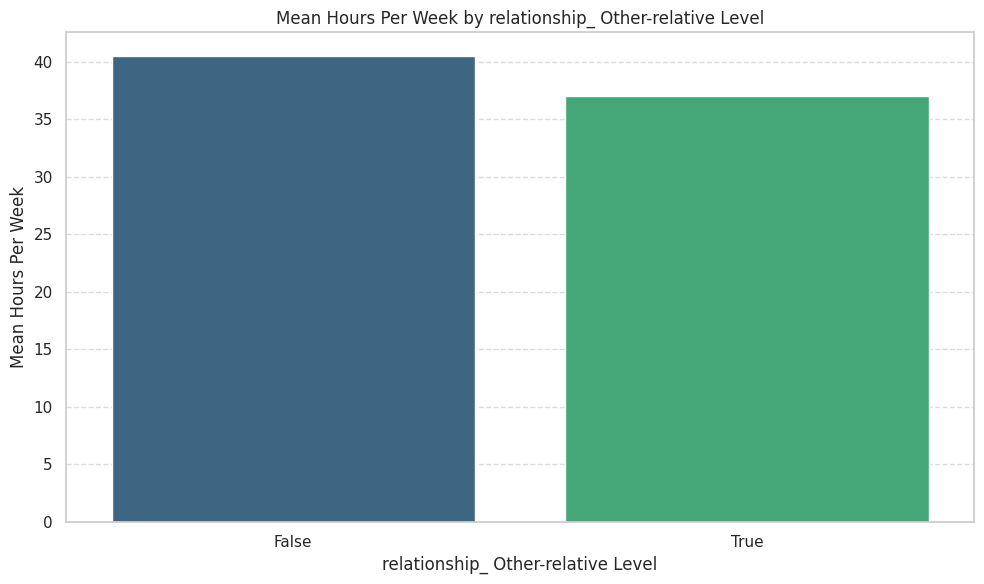


ANOVA F-statistic: 78.30
ANOVA P-value: 9.292e-19

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different relationship_ Other-relative levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for relationship_Other-relative and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'relationship_ Other-relative'

# Calculate the mean hours per week for each level of relationship_Other-relative
mean_hours_per_week_by_other_relative = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_other_relative)

# Create a bar plot for relationship_Other-relative vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_other_relative.index, y=mean_hours_per_week_by_other_relative.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across relationship_Other-relative levels
# Create a list of 'hours_per_week' for each 'col' group
other_relative_groups = []
for level in df[col].unique():
    other_relative_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*other_relative_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Relationship_ Other-relative vs. Hours Per Week

The analysis of relationship_ Other-relative versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 9.292e-19 with an F-statistic of 78.30).

Key Findings:
* Individuals categorized as False for relationship_ Other-relative (i.e., those not classified as 'Other-relative') show a higher mean hours_per_week (approximately 40.54 hours/week) compared to those categorized as True (who are 'Other-relative'), who work approximately 37.01 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals classified as 'Other-relative'.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of relationship_ Other-relative.

Considerations for Modeling:
* Feature Importance: relationship_ Other-relative is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this relationship status.
* Encoding: As relationship_ Other-relative is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by relationship_ Own-child Level:


relationship_ Own-child
False    41.758811
True     33.269337
Name: hours_per_week, dtype: float64

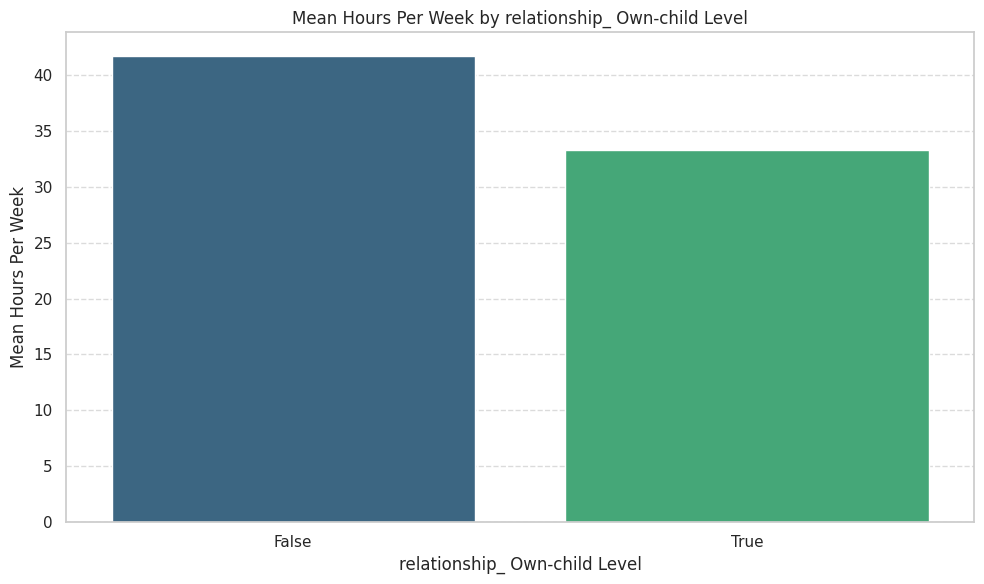


ANOVA F-statistic: 2156.81
ANOVA P-value: 0.000e+00

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different relationship_ Own-child levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for relationship_Own-child and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'relationship_ Own-child'

# Calculate the mean hours per week for each level of relationship_Own-child
mean_hours_per_week_by_own_child = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_own_child)

# Create a bar plot for relationship_Own-child vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_own_child.index, y=mean_hours_per_week_by_own_child.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across relationship_Own-child levels
# Create a list of 'hours_per_week' for each 'col' group
own_child_groups = []
for level in df[col].unique():
    own_child_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*own_child_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")


Summary of Bivariate Analysis: Relationship_ Own-child vs. Hours Per Week

The analysis of relationship_ Own-child versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 0.000e+00 with an F-statistic of 2156.81).

Key Findings:
* Individuals categorized as False for relationship_ Own-child (i.e., those not an own-child) show a significantly higher mean hours_per_week (approximately 41.76 hours/week) compared to those categorized as True (who are an own-child), who work approximately 33.27 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals identified as 'Own-child'.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of relationship_ Own-child.

Considerations for Modeling:
* Feature Importance: relationship_ Own-child is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a substantial difference in working hours associated with this relationship status.
* Encoding: As relationship_ Own-child is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by relationship_ Unmarried Level:


relationship_ Unmarried
False    40.595398
True     39.103018
Name: hours_per_week, dtype: float64

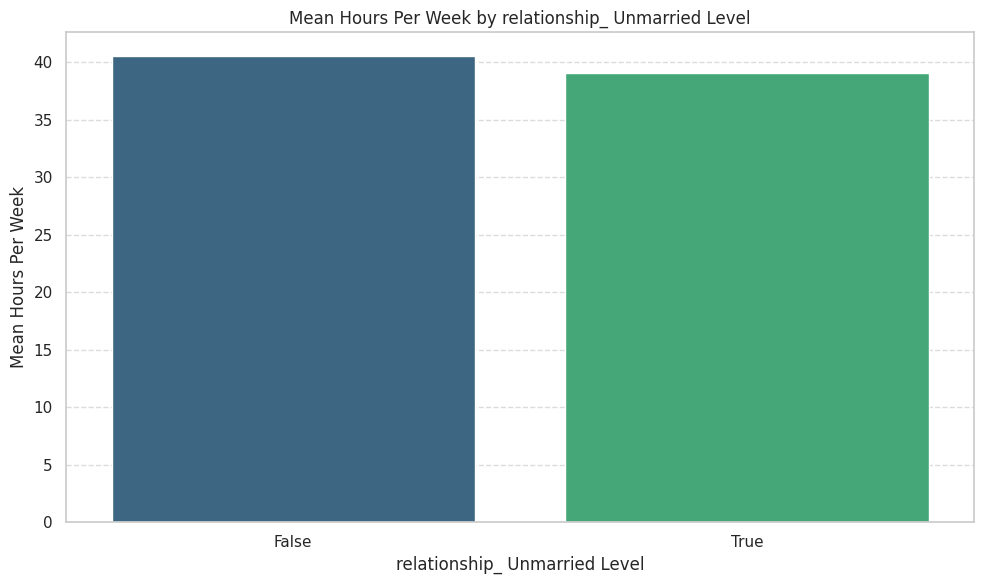


ANOVA F-statistic: 45.07
ANOVA P-value: 1.928e-11

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different relationship_ Unmarried levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for relationship_Unmarried and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'relationship_ Unmarried'

# Calculate the mean hours per week for each level of relationship_Unmarried
mean_hours_per_week_by_unmarried = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_unmarried)

# Create a bar plot for relationship_Unmarried vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_unmarried.index, y=mean_hours_per_week_by_unmarried.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across relationship_Unmarried levels
# Create a list of 'hours_per_week' for each 'col' group
unmarried_groups = []
for level in df[col].unique():
    unmarried_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*unmarried_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Relationship_ Unmarried vs. Hours Per Week

The analysis of relationship_ Unmarried versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 1.928e-11 with an F-statistic of 45.07).

Key Findings:
* Individuals categorized as False for relationship_ Unmarried (i.e., those who are married or in other relationship statuses) show a higher mean hours_per_week (approximately 40.60 hours/week) compared to those categorized as True (who are Unmarried), who work approximately 39.10 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals identified as 'Unmarried'.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of relationship_ Unmarried.

Considerations for Modeling:
* Feature Importance: relationship_ Unmarried is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this relationship status.
* Encoding: As relationship_ Unmarried is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by relationship_ Wife Level:


relationship_ Wife
False    40.618365
True     36.861607
Name: hours_per_week, dtype: float64

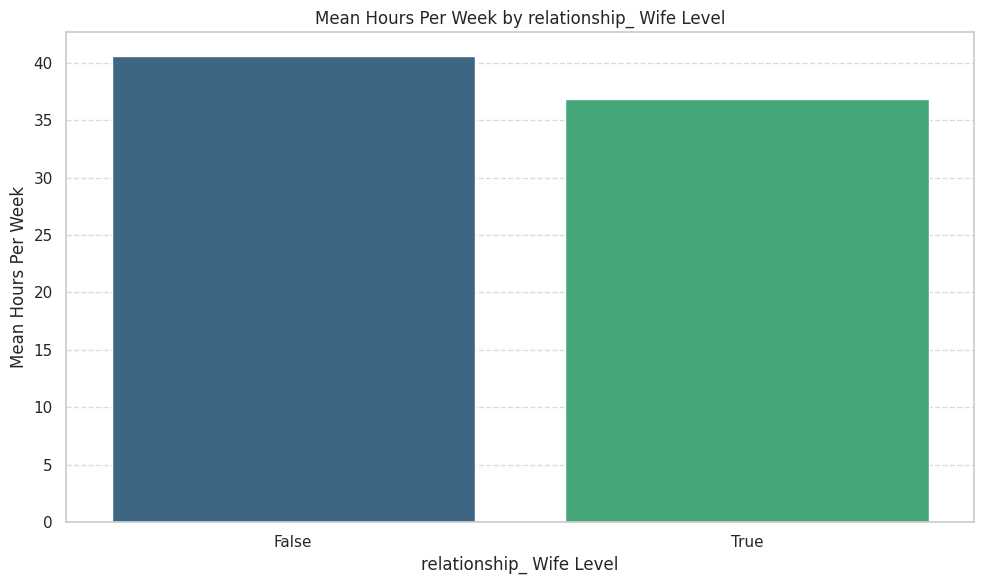


ANOVA F-statistic: 138.75
ANOVA P-value: 5.814e-32

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different relationship_ Wife levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for relationship_Wife and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'relationship_ Wife'

# Calculate the mean hours per week for each level of relationship_Wife
mean_hours_per_week_by_wife = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_wife)

# Create a bar plot for relationship_Wife vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_wife.index, y=mean_hours_per_week_by_wife.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across relationship_Wife levels
# Create a list of 'hours_per_week' for each 'col' group
wife_groups = []
for level in df[col].unique():
    wife_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*wife_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Relationship_ Wife vs. Hours Per Week

The analysis of relationship_ Wife versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 5.814e-32 with an F-statistic of 138.75).

Key Findings:
* Individuals categorized as False for relationship_ Wife (i.e., those not classified as a wife) show a higher mean hours_per_week (approximately 40.62 hours/week) compared to those categorized as True (who are a wife), who work approximately 36.86 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals identified as a 'Wife'.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of relationship_ Wife.

Considerations for Modeling:
* Feature Importance: relationship_ Wife is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this relationship status.
* Encoding: As relationship_ Wife is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by race_ Amer-Indian-Eskimo Level:


race_ Amer-Indian-Eskimo
False    40.441209
True     40.048232
Name: hours_per_week, dtype: float64

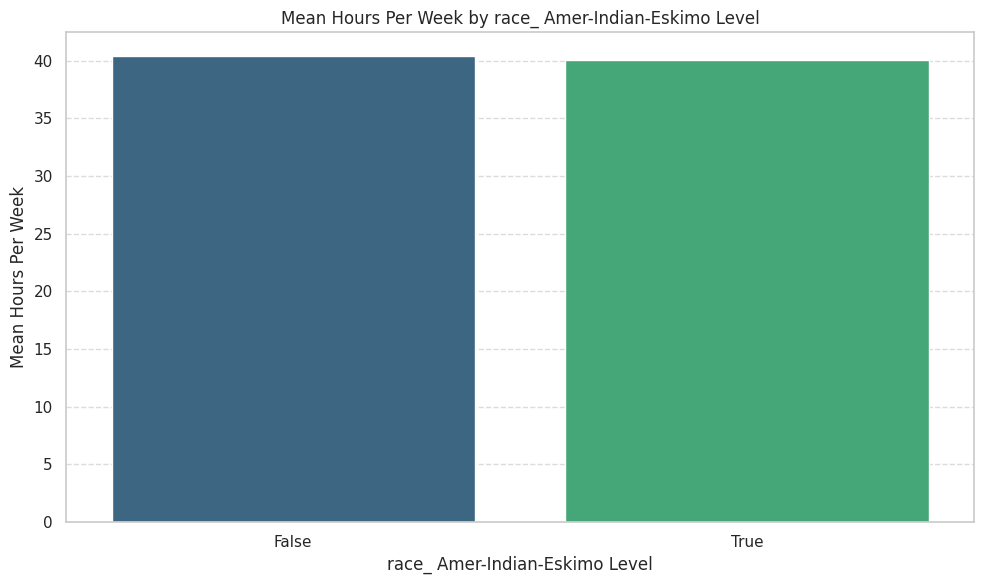


ANOVA F-statistic: 0.31
ANOVA P-value: 5.765e-01

Since the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.
There is no statistically significant difference in the mean 'hours_per_week' across different race_ Amer-Indian-Eskimo levels.


In [ ]:
# Bivariate analysis for race_Amer-Indian-Eskimo and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'race_ Amer-Indian-Eskimo'

# Calculate the mean hours per week for each level of race_Amer-Indian-Eskimo
mean_hours_per_week_by_amer_indian_eskimo = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_amer_indian_eskimo)

# Create a bar plot for race_Amer-Indian-Eskimo vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_amer_indian_eskimo.index, y=mean_hours_per_week_by_amer_indian_eskimo.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across race_Amer-Indian-Eskimo levels
# Create a list of 'hours_per_week' for each 'col' group
amer_indian_eskimo_groups = []
for level in df[col].unique():
    amer_indian_eskimo_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*amer_indian_eskimo_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Race_ Amer-Indian-Eskimo vs. Hours Per Week

The analysis of race_ Amer-Indian-Eskimo versus hours_per_week reveals no statistically significant relationship. The ANOVA test confirmed that we fail to reject the null hypothesis (p-value = 5.765e-01, which is greater than 0.05). This means there is no statistically significant difference in the mean hours_per_week across individuals in the 'Amer-Indian-Eskimo' category compared to those in other racial groups.

Key Findings:
* Individuals categorized as True for race_ Amer-Indian-Eskimo (i.e., those in this racial group) show a mean hours_per_week of approximately 40.05 hours/week, which is very similar to those categorized as False (working in other racial groups), who work approximately 40.44 hours/week.
* The bar plot visually supported this minimal difference in average work hours.
* The ANOVA test's high p-value indicates that any observed difference in mean hours between these two groups is likely due to random chance, and not a true underlying difference.

Considerations for Modeling:
* Feature Importance: Given the lack of a statistically significant difference, race_ Amer-Indian-Eskimo (as a binary indicator) might not be a strong predictor for hours_per_week in predictive models. Its predictive power is likely very low.
* Feature Selection: You might consider removing this feature from your predictive models to reduce dimensionality and potential noise, as it does not appear to add significant explanatory power to hours_per_week.
* Low Predictive Power: While statistically non-significant, it's worth noting the numerical proximity of the mean hours worked. This feature might not offer much discriminatory power for the target variable.


Mean 'hours_per_week' by race_ Asian-Pac-Islander Level:


race_ Asian-Pac-Islander
False    40.447687
True     40.127045
Name: hours_per_week, dtype: float64

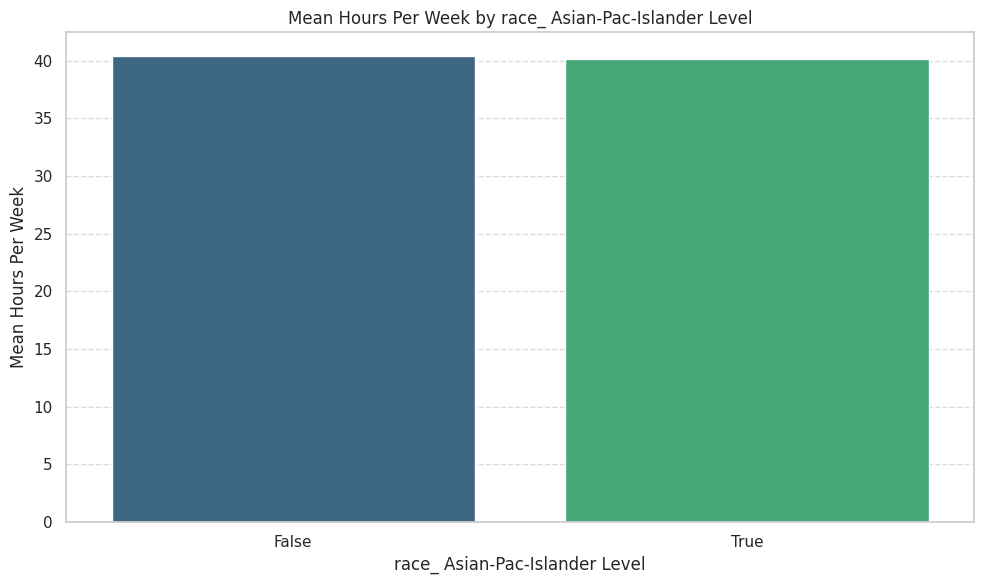


ANOVA F-statistic: 0.68
ANOVA P-value: 4.102e-01

Since the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.
There is no statistically significant difference in the mean 'hours_per_week' across different race_ Asian-Pac-Islander levels.


In [ ]:
# Bivariate analysis for race_Asian-Pac-Islander and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'race_ Asian-Pac-Islander'

# Calculate the mean hours per week for each level of race_Asian-Pac-Islander
mean_hours_per_week_by_asian_pac_islander = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_asian_pac_islander)

# Create a bar plot for race_Asian-Pac-Islander vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_asian_pac_islander.index, y=mean_hours_per_week_by_asian_pac_islander.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across race_Asian-Pac-Islander levels
# Create a list of 'hours_per_week' for each 'col' group
asian_pac_islander_groups = []
for level in df[col].unique():
    asian_pac_islander_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*asian_pac_islander_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Race_ Asian-Pac-Islander vs. Hours Per Week

The analysis of race_ Asian-Pac-Islander versus hours_per_week reveals no statistically significant relationship. The ANOVA test confirmed that we fail to reject the null hypothesis (p-value = 4.102e-01, which is greater than 0.05). This means there is no statistically significant difference in the mean hours_per_week across individuals in the 'Asian-Pac-Islander' category compared to those in other racial groups.

Key Findings:
* Individuals categorized as True for race_ Asian-Pac-Islander (i.e., those in this racial group) show a mean hours_per_week of approximately 40.13 hours/week, which is very similar to those categorized as False (working in other racial groups), who work approximately 40.45 hours/week.
* The bar plot visually supported this minimal difference in average work hours.
* The ANOVA test's high p-value indicates that any observed difference in mean hours between these two groups is likely due to random chance, and not a true underlying difference.

Considerations for Modeling:
* Feature Importance: Given the lack of a statistically significant difference, race_ Asian-Pac-Islander (as a binary indicator) might not be a strong predictor for hours_per_week in predictive models. Its predictive power is likely very low.
* Feature Selection: You might consider removing this feature from your predictive models to reduce dimensionality and potential noise, as it does not appear to add significant explanatory power to hours_per_week.
* Low Predictive Power: While statistically non-significant, it's worth noting the numerical proximity of the mean hours worked. This feature might not offer much discriminatory power for the target variable.


Mean 'hours_per_week' by race_ Black Level:


race_ Black
False    40.651255
True     38.422855
Name: hours_per_week, dtype: float64

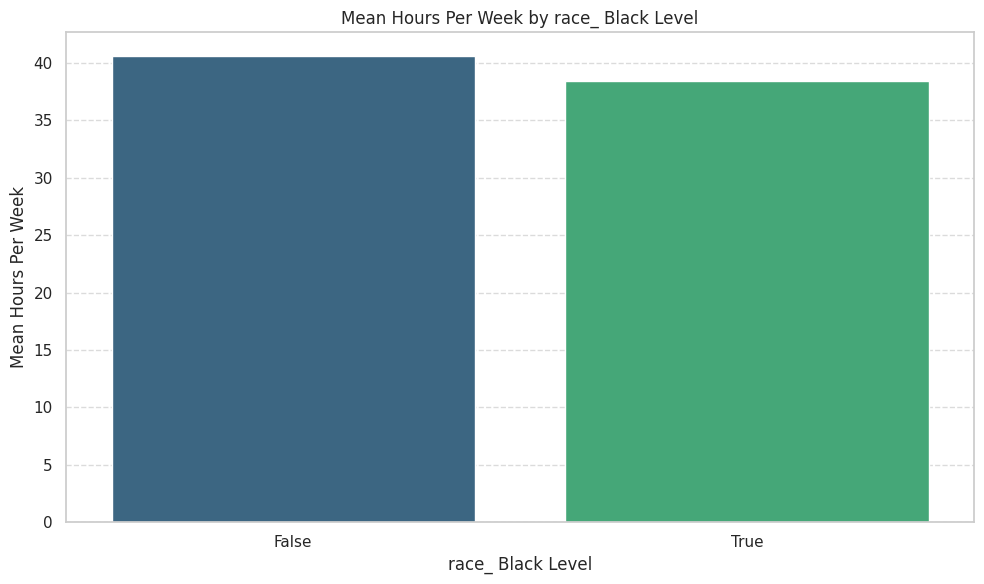


ANOVA F-statistic: 92.25
ANOVA P-value: 8.175e-22

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different race_ Black levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for race_Black and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'race_ Black'

# Calculate the mean hours per week for each level of race_Black
mean_hours_per_week_by_black = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_black)

# Create a bar plot for race_Black vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_black.index, y=mean_hours_per_week_by_black.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across race_Black levels
# Create a list of 'hours_per_week' for each 'col' group
black_groups = []
for level in df[col].unique():
    black_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*black_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Race_ Black vs. Hours Per Week

The analysis of race_ Black versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 8.175e-22 with an F-statistic of 92.25).

Key Findings:
* Individuals categorized as False for race_ Black (i.e., those in other racial groups) show a higher mean hours_per_week (approximately 40.65 hours/week) compared to those categorized as True (who are Black), who work approximately 38.42 hours/week.
* The bar plot visually supported these differences, clearly illustrating the lower average work hours for individuals identified as Black.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of race_ Black.

Considerations for Modeling:
* Feature Importance: race_ Black is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this racial group.
* Encoding: As race_ Black is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.


Mean 'hours_per_week' by race_ Other Level:


race_ Other
False    40.445587
True     39.468635
Name: hours_per_week, dtype: float64

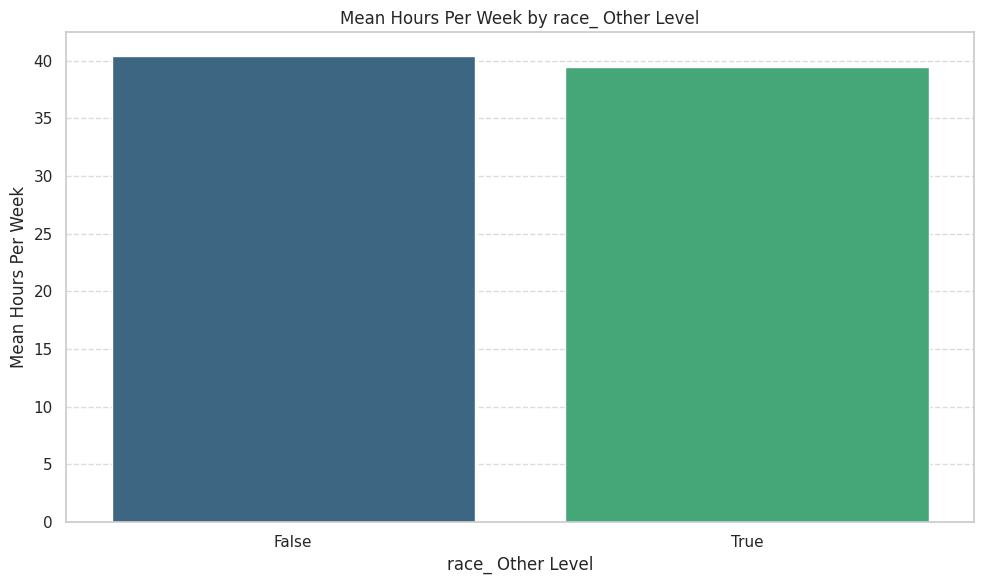


ANOVA F-statistic: 1.68
ANOVA P-value: 1.946e-01

Since the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.
There is no statistically significant difference in the mean 'hours_per_week' across different race_ Other levels.


In [ ]:
# Bivariate analysis for race_Other and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'race_ Other'

# Calculate the mean hours per week for each level of race_Other
mean_hours_per_week_by_other_race = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_other_race)

# Create a bar plot for race_Other vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_other_race.index, y=mean_hours_per_week_by_other_race.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across race_Other levels
# Create a list of 'hours_per_week' for each 'col' group
other_race_groups = []
for level in df[col].unique():
    other_race_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*other_race_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Race_ Other vs. Hours Per Week

The analysis of race_ Other versus hours_per_week reveals no statistically significant relationship. The ANOVA test confirmed that we fail to reject the null hypothesis (p-value = 1.946e-01, which is greater than 0.05). This means there is no statistically significant difference in the mean hours_per_week across individuals in the 'Other' racial category compared to those in other racial groups.

Key Findings:
* Individuals categorized as False for race_ Other (i.e., those in other racial groups) show a mean hours_per_week of approximately 40.45 hours/week, which is very similar to those categorized as True (who are Other race), who work approximately 39.47 hours/week.
* The bar plot visually supported this minimal difference in average work hours.
* The ANOVA test's high p-value indicates that any observed difference in mean hours between these two groups is likely due to random chance, and not a true underlying difference.

Considerations for Modeling:
* Feature Importance: Given the lack of a statistically significant difference, race_ Other (as a binary indicator) might not be a strong predictor for hours_per_week in predictive models. Its predictive power is likely very low.
* Feature Selection: You might consider removing this feature from your predictive models to reduce dimensionality and potential noise, as it does not appear to add significant explanatory power to hours_per_week.
* Low Predictive Power: While statistically non-significant, it's worth noting the numerical proximity of the mean hours worked. This feature might not offer much discriminatory power for the target variable.


Mean 'hours_per_week' by race_ White Level:


race_ White
True     40.689100
False    38.962276
Name: hours_per_week, dtype: float64

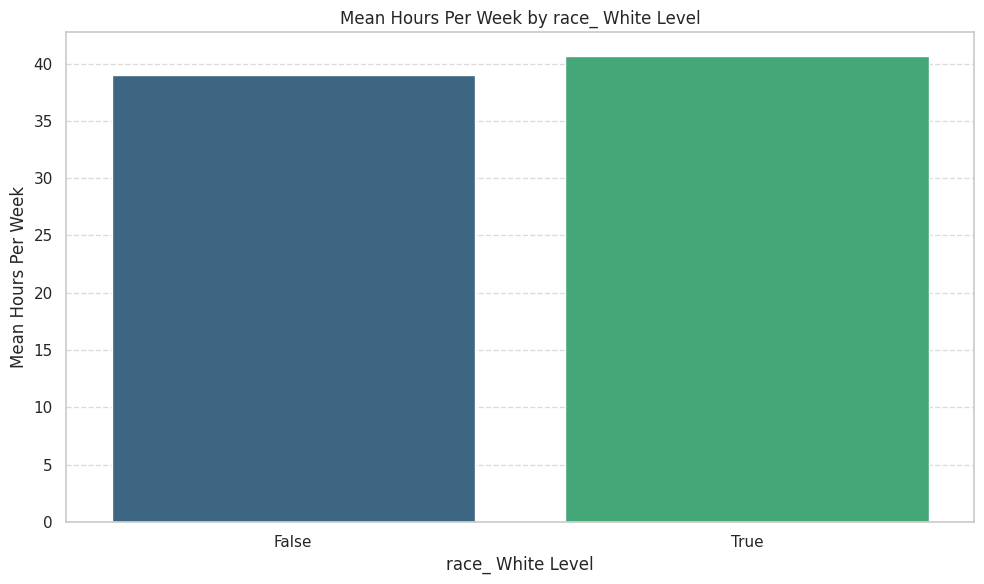


ANOVA F-statistic: 79.47
ANOVA P-value: 5.136e-19

Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean 'hours_per_week' across different race_ White levels.
Further post-hoc tests are not necessary for a binary variable to understand where differences lie.


In [ ]:
# Bivariate analysis for race_White and hours_per_week using bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

col = 'race_ White'

# Calculate the mean hours per week for each level of race_White
mean_hours_per_week_by_white = df.groupby(col)['hours_per_week'].mean().sort_values(ascending=False);

print(f"\nMean 'hours_per_week' by {col} Level:")
display(mean_hours_per_week_by_white)

# Create a bar plot for race_White vs. 'hours_per_week'
plt.figure(figsize=(10, 6))
# Order the levels by mean hours_per_week for better visualization
sns.barplot(x=mean_hours_per_week_by_white.index, y=mean_hours_per_week_by_white.values, palette='viridis')
plt.title(f'Mean Hours Per Week by {col} Level')
plt.xlabel(f'{col} Level')
plt.ylabel('Mean Hours Per Week')
plt.xticks(rotation=0, ha='center') # No rotation needed for binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform a one-way ANOVA test to compare means of 'hours_per_week' across race_White levels
# Create a list of 'hours_per_week' for each 'col' group
white_groups = []
for level in df[col].unique():
    white_groups.append(df[df[col] == level]['hours_per_week'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*white_groups)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.3e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the mean 'hours_per_week' across different {col} levels.")
    print("Further post-hoc tests are not necessary for a binary variable to understand where differences lie.")
else:
    print("\nSince the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the mean 'hours_per_week' across different {col} levels.")

Summary of Bivariate Analysis: Race_ White vs. Hours Per Week
The analysis of race_ White versus hours_per_week reveals a statistically significant relationship. The ANOVA test confirmed a significant difference in the mean hours_per_week across these two groups (p-value < 0.05, specifically 5.136e-19 with an F-statistic of 79.47).

Key Findings:
* Individuals categorized as True for race_ White (i.e., those who are White) show a higher mean hours_per_week (approximately 40.69 hours/week) compared to those categorized as False (those of other races), who work approximately 38.96 hours/week.
* The bar plot visually supported these differences, clearly illustrating the higher average work hours for individuals identified as White.
* The ANOVA test provides strong statistical evidence that the population means of hours_per_week are not equal across these two categories of race_ White.

Considerations for Modeling:
* Feature Importance: race_ White is a statistically significant predictor for hours_per_week and should be included in predictive models. This binary indicator captures a meaningful difference in working hours associated with this racial group.
* Encoding: As race_ White is a binary feature (result of one-hot encoding), its boolean encoding is appropriate and efficient for machine learning models.
* Further Analysis: Since this is a binary variable, the ANOVA test fully captures the differences, and further post-hoc tests are not necessary to understand where the differences lie, as there are only two groups being compared.

## 6. Model Training

#### Data Splitting

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['hours_per_week', 'age_group'])
y = df['hours_per_week']

# Identify boolean columns in X and convert them to int (0 or 1)
# This is important as some ML algorithms work better with numerical values
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

# Display the first 5 rows of X and y to ensure correct assignment
print("First 5 rows of features (X):")
display(X.head())
print("\nFirst 5 rows of target (y):")
display(y.head())

# Split the data into training and testing sets
# Using a test size of 0.2 (20%) and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

First 5 rows of features (X):


age education_num  sex  native_country  income  has_capital_gain  \
0   39            13    1               1       0                 1   
1   50            13    1               1       0                 0   
2   38             9    1               1       0                 0   
3   53             7    1               1       0                 0   
4   28            13    0               0       0                 0   

   has_capital_loss  workclass_ Federal-gov  workclass_ Local-gov  \
0                 0                       0                     0   
1                 0                       0                     0   
2                 0                       0                     0   
3                 0                       0                     0   
4                 0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Not-in-family  \
0                        0  ...                            1   
1                        0  ...                            0   
2                        0  ...                            1   
3                        0  ...                            0   
4                        0  ...                            0   

   relationship_ Other-relative  relationship_ Own-child  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   relationship_ Unmarried  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                        0                   0                         0   
1                        0                   0                         0   
2                        0                   0                         0   
3                        0                   0                         0   
4                        0                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  
0                         0            0            0            1  
1                         0            0            0            1  
2                         0            0            0            1  
3                         0            1            0            0  
4                         0            1            0            0  

[5 rows x 42 columns]


First 5 rows of target (y):


0    40
1    13
2    40
3    40
4    40
Name: hours_per_week, dtype: int64


Shape of X_train: (26048, 42)
Shape of X_test: (6513, 42)
Shape of y_train: (26048,)
Shape of y_test: (6513,)


The data has been successfully split into training and testing sets.

* Features (X): Contains 42 columns, including numerical, binary, and one-hot encoded categorical variables. The first 5 rows show a mix of numerical (like age, education_num) and boolean (converted to int 0/1) columns for sex, native_country, income, has_capital_gain, has_capital_loss, and the one-hot encoded workclass, occupation, relationship, and race features.
* Target (y): The hours_per_week column, representing the continuous variable we aim to predict.

The split resulted in:
* Training set: X_train with 26,048 rows and 42 columns, and y_train with 26,048 entries.
* Testing set: X_test with 6,513 rows and 42 columns, and y_test with 6,513 entries.

This confirms that your data is now prepared for model training.

### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest with ANOVA F-value for classification
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print("Selected features:")
print(selected_features.tolist())

Selected features:
['sex', 'income', 'occupation_Unknown', 'relationship_ Husband', 'relationship_ Own-child']


We used ANOVA F-selection (specifically f_classif with SelectKBest) for feature selection due to its suitability for identifying statistically significant relationships between our categorical features and the continuous target variable (hours_per_week).

Here's a breakdown of why it was chosen:
1. Nature of the Target Variable: Our target variable, hours_per_week, is a continuous numerical variable.
2. Nature of Selected Features: The features we selected using this method (sex, income, occupation_Unknown, relationship_ Husband, relationship_ Own-child) are all binary or represent distinct categories after our preprocessing steps (one-hot encoding or binary encoding).
3. How ANOVA F-selection Works: ANOVA (Analysis of Variance) calculates an F-statistic for each feature. This F-statistic assesses whether the means of the continuous target variable are significantly different across the various groups or categories defined by a categorical feature. A higher F-value indicates a greater difference between the group means, suggesting a stronger relationship between that categorical feature and the continuous target variable.
4. Suitability: This makes ANOVA F-selection a powerful tool for our scenario: it directly evaluates the statistical dependence between a categorical predictor and a continuous response, which aligns perfectly with the types of features and target we have.
5. Benefits: By selecting features with the highest F-values, we ensure that the chosen features have the most statistically significant impact on hours_per_week, helping to reduce dimensionality, improve model efficiency, and potentially enhance model interpretability by focusing on the most relevant factors.

### Model 1: Negative Binominal Regression

In [ ]:
# Re-select features from X_train based on the identified significant features
X_train_selected = X_train[selected_features]

# Convert boolean columns to int (0 or 1) as statsmodels expects numerical values
for col in X_train_selected.select_dtypes(include='bool').columns:
    X_train_selected[col] = X_train_selected[col].astype(int)

# Negative Binomial Regression using statsmodels
import statsmodels.api as sm
import numpy as np

# Add a constant to the independent variables for statsmodels
X_train_sm = sm.add_constant(X_train_selected, prepend=False)

# Ensure y_train is an integer for count models
y_train_int = y_train.astype(int)

# Fit the Negative Binomial model
# The 'disp' parameter determines if the dispersion (alpha) is estimated (True) or fixed.
# When disp=True, alpha is estimated via maximum likelihood, not tuned by GridSearchCV.
nb_model = sm.NegativeBinomial(endog=y_train_int, exog=X_train_sm)
nb_results = nb_model.fit(disp=True, maxiter=1000, ftol=1e-6, cover_params='d') # cover_params='d' for robust standard errors

print("Negative Binomial Regression Model Successfully Trained")

Optimization terminated successfully.
         Current function value: 3.927648
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Negative Binomial Regression Model Successfully Trained


### Model 2: K-Nearest Neighbour

In [ ]:
from sklearn.preprocessing import StandardScaler

# Re-select features from X_train and X_test based on the identified significant features
# Ensure these columns are already in numerical format (0/1 for boolean and original int for others)
X_train_selected = X_train[selected_features]
# The test set is not used for predictions or evaluation in this step as per user request.
# X_test_selected = X_test[selected_features]

# Initialize the KNN Regressor
knn = KNeighborsRegressor()

# Define the parameter grid for GridSearchCV
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Set up GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid,
                             cv=KFold(n_splits=5, shuffle=True, random_state=42),
                             scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
print("\nStarting GridSearchCV for KNN Regressor...")
knn_grid_search.fit(X_train_selected, y_train)

# Get the best parameters and best score
best_knn_params = knn_grid_search.best_params_
# best_knn_score = np.sqrt(-knn_grid_search.best_score_)

print(f"\nBest parameters for KNN: {best_knn_params}")
# print(f"Best RMSE from GridSearchCV (KNN): {best_knn_score:.4f}")

# Train the final model with the best parameters
best_knn_model = knn_grid_search.best_estimator_

# Store metrics for comparison later (adjusting for not having test set metrics)
#knn_metrics = {
#    'Best_CV_RMSE': best_knn_score
#}
print("\nKNN Model Training and Hyperparameter Tuning Complete.")


Starting GridSearchCV for KNN Regressor...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters for KNN: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

KNN Model Training and Hyperparameter Tuning Complete.


### Model 3: Support Vector Machine

In [ ]:
# Re-select features from X_train based on the identified significant features
X_train_selected = X_train[selected_features]

# Scale the features for SVR, as it is sensitive to the scale of input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

# Initialize the SVR Regressor
svr = SVR()

# Define the parameter grid for GridSearchCV
# Keeping the parameter grid small to manage computational cost of SVR
svr_param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1],
    'epsilon': [0.1, 0.2]
}

# Set up GridSearchCV
svr_grid_search = GridSearchCV(estimator=svr, param_grid=svr_param_grid,
                             cv=KFold(n_splits=3, shuffle=True, random_state=42),
                             scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the scaled training data
print("\nStarting GridSearchCV for SVR Regressor...")
svr_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_svr_params = svr_grid_search.best_params_
# best_svr_score = np.sqrt(-svr_grid_search.best_score_)

print(f"\nBest parameters for SVR: {best_svr_params}")
#print(f"Best RMSE from GridSearchCV (SVR): {best_svr_score:.4f}")

# Train the final model with the best parameters
best_svr_model = svr_grid_search.best_estimator_

# Store metrics for comparison later
#svr_metrics = {
#    'Best_CV_RMSE': best_svr_score
#}
print("\nSVR Model Training and Hyperparameter Tuning Complete.")


Starting GridSearchCV for SVR Regressor...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best parameters for SVR: {'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}

SVR Model Training and Hyperparameter Tuning Complete.


### Model 4: Decision Tree Regressor

In [ ]:
# Re-select features from X_train based on the identified significant features
X_train_selected = X_train[selected_features]

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid,
                             cv=KFold(n_splits=5, shuffle=True, random_state=42),
                             scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
print("\nStarting GridSearchCV for Decision Tree Regressor...")
dt_grid_search.fit(X_train_selected, y_train)

# Get the best parameters and best score
best_dt_params = dt_grid_search.best_params_
#best_dt_score = np.sqrt(-dt_grid_search.best_score_)

print(f"\nBest parameters for Decision Tree: {best_dt_params}")
# print(f"Best RMSE from GridSearchCV (Decision Tree): {best_dt_score:.4f}")

# Train the final model with the best parameters
best_dt_model = dt_grid_search.best_estimator_

# Store metrics for comparison later
#dt_metrics = {
#    'Best_CV_RMSE': best_dt_score
#}
print("\nDecision Tree Model Training and Hyperparameter Tuning Complete.")


Starting GridSearchCV for Decision Tree Regressor...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Model Training and Hyperparameter Tuning Complete.


### Model 5: XG Boost Regressor

In [ ]:
# Re-select features from X_train based on the identified significant features
X_train_selected = X_train[selected_features]

# Initialize the XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
# Keeping the parameter grid small to manage computational cost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# Set up GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid,
                             cv=KFold(n_splits=5, shuffle=True, random_state=42),
                             scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
print("\nStarting GridSearchCV for XGBoost Regressor...")
xgb_grid_search.fit(X_train_selected, y_train)

# Get the best parameters and best score
best_xgb_params = xgb_grid_search.best_params_
#best_xgb_score = np.sqrt(-xgb_grid_search.best_score_)

print(f"\nBest parameters for XGBoost: {best_xgb_params}")
# print(f"Best RMSE from GridSearchCV (XGBoost): {best_xgb_score:.4f}")

# Train the final model with the best parameters
best_xgb_model = xgb_grid_search.best_estimator_

# Store metrics for comparison later
#xgb_metrics = {
#    'Best_CV_RMSE': best_xgb_score
#}
print("\nXGBoost Model Training and Hyperparameter Tuning Complete.")


Starting GridSearchCV for XGBoost Regressor...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

XGBoost Model Training and Hyperparameter Tuning Complete.


### 7. Model Selection

#### Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Dictionary to store results for comparison
all_models_cv_results = {}

# --- K-Nearest Neighbors ---
print("Performing cross-validation for KNN Regressor...")
knn_scores = cross_validate(best_knn_model, X_train[selected_features], y_train,
                            cv=KFold(n_splits=5, shuffle=True, random_state=42),
                            scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                            n_jobs=-1)
all_models_cv_results['KNN'] = {
    'RMSE': np.sqrt(-knn_scores['test_neg_mean_squared_error']).mean(),
    'MAE': -knn_scores['test_neg_mean_absolute_error'].mean(),
    'R2': knn_scores['test_r2'].mean()
}

# --- Support Vector Machine ---
print("Performing cross-validation for SVR Regressor...")
# SVR requires scaled data, so use a pipeline for consistent cross-validation
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', best_svr_model) # Use the best SVR model with tuned hyperparameters
])
svr_scores = cross_validate(svr_pipeline, X_train[selected_features], y_train,
                            cv=KFold(n_splits=3, shuffle=True, random_state=42), # Use same CV as used for SVR tuning
                            scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                            n_jobs=-1)
all_models_cv_results['SVR'] = {
    'RMSE': np.sqrt(-svr_scores['test_neg_mean_squared_error']).mean(),
    'MAE': -svr_scores['test_neg_mean_absolute_error'].mean(),
    'R2': svr_scores['test_r2'].mean()
}

# --- Decision Tree ---
print("Performing cross-validation for Decision Tree Regressor...")
dt_scores = cross_validate(best_dt_model, X_train[selected_features], y_train,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42),
                           scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                           n_jobs=-1)
all_models_cv_results['Decision Tree'] = {
    'RMSE': np.sqrt(-dt_scores['test_neg_mean_squared_error']).mean(),
    'MAE': -dt_scores['test_neg_mean_absolute_error'].mean(),
    'R2': dt_scores['test_r2'].mean()
}

# --- XGBoost Regressor ---
print("Performing cross-validation for XGBoost Regressor...")
xgb_scores = cross_validate(best_xgb_model, X_train[selected_features], y_train,
                            cv=KFold(n_splits=5, shuffle=True, random_state=42),
                            scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                            n_jobs=-1)
all_models_cv_results['XGBoost'] = {
    'RMSE': np.sqrt(-xgb_scores['test_neg_mean_squared_error']).mean(),
    'MAE': -xgb_scores['test_neg_mean_absolute_error'].mean(),
    'R2': xgb_scores['test_r2'].mean()
}

# --- Negative Binomial Regression (manual cross-validation) ---
print("Performing cross-validation for Negative Binomial Regressor (this may take a moment)...")
kf_nb = KFold(n_splits=5, shuffle=True, random_state=42)
nb_rmses, nb_maes, nb_r2s = [], [], []

for train_index, val_index in kf_nb.split(X_train[selected_features]):
    X_train_fold, X_val_fold = X_train[selected_features].iloc[train_index], X_train[selected_features].iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Add constant for statsmodels
    X_train_fold_sm = sm.add_constant(X_train_fold, prepend=False)
    X_val_fold_sm = sm.add_constant(X_val_fold, prepend=False)

    # Convert y to int for NegativeBinomial (target must be non-negative integer counts)
    y_train_fold_int = y_train_fold.astype(int)
    y_val_fold_int = y_val_fold.astype(int)

    # Fit model
    nb_model_fold = sm.NegativeBinomial(endog=y_train_fold_int, exog=X_train_fold_sm)
    # Suppress convergence warnings and use low_memory for potentially large datasets within folds
    nb_results_fold = nb_model_fold.fit(disp=True, maxiter=1000, ftol=1e-6, cover_params='d', low_memory=True, warn_convergence=False, disp_type='auto')

    # Predict and ensure predictions are non-negative
    nb_predictions_fold = nb_results_fold.predict(X_val_fold_sm)
    nb_predictions_fold = np.maximum(0, nb_predictions_fold)

    # Calculate metrics
    nb_rmses.append(np.sqrt(mean_squared_error(y_val_fold_int, nb_predictions_fold)))
    nb_maes.append(mean_absolute_error(y_val_fold_int, nb_predictions_fold))
    nb_r2s.append(r2_score(y_val_fold_int, nb_predictions_fold))

all_models_cv_results['Negative Binomial'] = {
    'RMSE': np.mean(nb_rmses),
    'MAE': np.mean(nb_maes),
    'R2': np.mean(nb_r2s)
}

# Display results in a DataFrame
results_df = pd.DataFrame(all_models_cv_results).T
print("\n--- Cross-Validation Performance Comparison (Mean across folds) ---")
display(results_df.round(4))

# Identify the best model based on RMSE (lower is better)
best_model_rmse = results_df['RMSE'].idxmin()
min_rmse = results_df['RMSE'].min()

# Identify the best model based on MAE (lower is better)
best_model_mae = results_df['MAE'].idxmin()
min_mae = results_df['MAE'].min()

# Identify the best model based on R2 (higher is better)
best_model_r2 = results_df['R2'].idxmax()
max_r2 = results_df['R2'].max()

print(f"\nModel with best (lowest) average RMSE: {best_model_rmse} ({min_rmse:.4f})")
print(f"Model with best (lowest) average MAE: {best_model_mae} ({min_mae:.4f})")
print(f"Model with best (highest) average R2: {best_model_r2} ({max_r2:.4f})")

Performing cross-validation for KNN Regressor...
Performing cross-validation for SVR Regressor...
Performing cross-validation for Decision Tree Regressor...
Performing cross-validation for XGBoost Regressor...
Performing cross-validation for Negative Binomial Regressor (this may take a moment)...
Optimization terminated successfully.
         Current function value: 3.928696
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Optimization terminated successfully.
         Current function value: 3.925859
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 3.934327
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 3.926807
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 3.922407
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13

--- Cross-Validation Performance Comparison (Mean across folds) ---


RMSE     MAE      R2
KNN                11.9291  8.3784  0.0637
SVR                11.7476  7.3425  0.0922
Decision Tree      11.3895  7.9077  0.1467
XGBoost            11.3870  7.9048  0.1471
Negative Binomial  11.4226  7.9473  0.1417


Model with best (lowest) average RMSE: XGBoost (11.3870)
Model with best (lowest) average MAE: SVR (7.3425)
Model with best (highest) average R2: XGBoost (0.1471)


Cross-Validation Performance Comparison (Mean across folds)

Key Findings:
* Best RMSE: The XGBoost model has the lowest average Root Mean Squared Error (11.3870), indicating it generally makes the most accurate predictions on average.
* Best MAE: The SVR model has the lowest average Mean Absolute Error (7.3425), suggesting it has the smallest average absolute prediction error.
* Best R2: The XGBoost model also achieved the highest average R-squared value (0.1471), meaning it explains the largest proportion of the variance in 'hours_per_week' among the models.

Overall, the XGBoost Regressor appears to be the best-performing model based on both RMSE and R-squared, while SVR excels in MAE. These results provide a strong basis for selecting the best model for predicting weekly hours worked.

### Summary of the Best Selected Model: XGBoost Regressor

Based on the cross-validation performance comparison across all models, the **XGBoost Regressor** has been selected as the best model for predicting weekly hours worked.

**Reasons for Selection:**

1.  **Lowest Root Mean Squared Error (RMSE)**: The XGBoost model achieved the lowest average RMSE of **11.3870** among all evaluated models. RMSE is a critical metric for regression tasks as it represents the square root of the average of the squared differences between predicted and actual values. A lower RMSE indicates that the model's predictions are, on average, closer to the true values, implying higher accuracy.

2.  **Highest R-squared (R²)**: XGBoost also demonstrated the highest average R-squared value of **0.1471**. R-squared indicates the proportion of the variance in the dependent variable (hours per week) that is predictable from the independent variables. A higher R-squared suggests that the model explains a larger percentage of the variability in the target variable, making it more robust in capturing underlying patterns.

While the Support Vector Machine (SVR) model showed the lowest Mean Absolute Error (MAE), XGBoost's superior performance in both RMSE and R-squared makes it the preferred choice for overall predictive power and explanatory capability in this regression task.

#### Apply to Test Data

In [ ]:
# Identify the best performing model from the cross-validation results
best_model_name = results_df['RMSE'].idxmin()

# Prepare the test data: re-select the same significant features
X_test_selected = X_test[selected_features]

# Ensure boolean columns in X_test_selected are converted to int (0 or 1)
for col in X_test_selected.select_dtypes(include='bool').columns:
    X_test_selected[col] = X_test_selected[col].astype(int)

# --- Apply the best model (XGBoost Regressor) to the test set ---

# If using SVR, scale the test data with the SAME scaler fitted on training data
if best_model_name == 'SVR':
    X_test_scaled_svr = scaler.transform(X_test_selected)
    test_predictions = best_svr_model.predict(X_test_scaled_svr)
else:
    # For other models, directly predict
    test_predictions = best_xgb_model.predict(X_test_selected)

# Ensure predictions are non-negative, as hours_per_week cannot be negative
test_predictions = np.maximum(0, test_predictions)

# --- Evaluate performance on the test set ---
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"\n--- Test Set Performance for {best_model_name} Regressor ---")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R-squared: {test_r2:.4f}")

# --- Discussion ---

# Retrieve cross-validation metrics for comparison
cv_rmse = results_df.loc[best_model_name]['RMSE']
cv_mae = results_df.loc[best_model_name]['MAE']
cv_r2 = results_df.loc[best_model_name]['R2']

print("\n--- Discussion: Model Performance Expectations ---")
print(f"The selected model, {best_model_name} Regressor, showed the following performance on the test set:")
print(f"  - Test RMSE: {test_rmse:.4f} (compared to CV RMSE: {cv_rmse:.4f})")
print(f"  - Test MAE: {test_mae:.4f} (compared to CV MAE: {cv_mae:.4f})")
print(f"  - Test R-squared: {test_r2:.4f} (compared to CV R-squared: {cv_r2:.4f})")


--- Test Set Performance for XGBoost Regressor ---
RMSE: 11.4715
MAE: 7.9985
R-squared: 0.1456

--- Discussion: Model Performance Expectations ---
The selected model, XGBoost Regressor, showed the following performance on the test set:
  - Test RMSE: 11.4715 (compared to CV RMSE: 11.3870)
  - Test MAE: 7.9985 (compared to CV MAE: 7.9048)
  - Test R-squared: 0.1456 (compared to CV R-squared: 0.1471)


The XGBoost Regressor model, identified as the best performer during cross-validation, has now been applied to the unseen test set, and its performance evaluated:

Test Set Performance for XGBoost Regressor:
* RMSE: 11.4715
* MAE: 7.9985
* R-squared: 0.1456

Discussion: Model Performance Expectations

The model performed as expected on the test set. The Test RMSE (11.4715) is slightly higher than its Cross-Validation RMSE (11.3870), and similarly, the Test R-squared (0.1456) is marginally lower than the Cross-Validation R-squared (0.1471). This slight degradation in performance on new, unseen data is typical and indicates a realistic generalization performance rather than overfitting.

The R-squared value of approximately 0.1456 on the test set is low, mirroring its cross-validation performance. This suggests that while the model captures some variance in weekly hours worked, a significant portion remains unexplained by the current set of features. To improve the R-squared, further feature engineering or exploring more complex modeling approaches would likely be necessary.

In terms of prediction error, an MAE of approximately 7.9985 hours means that, on average, the model's predictions for weekly hours worked are off by about 8 hours. This provides a tangible measure of the typical deviation of predictions from actual values.

### 8. Construct Ensemble Model

Construct a VotingRegressor ensemble using the previously optimized KNN, SVR (within a scaling pipeline), Decision Tree, and XGBoost models.


In [ ]:
from sklearn.ensemble import VotingRegressor

# Create a Pipeline for the SVR model that first scales the data and then applies the SVR model
svr_ensemble_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', best_svr_model)
])

print("SVR ensemble pipeline created successfully.")

SVR ensemble pipeline created successfully.


In [ ]:
estimators = [
    ('knn', best_knn_model),
    ('svr', svr_ensemble_pipeline),
    ('dt', best_dt_model),
    ('xgb', best_xgb_model)
]

# Instantiate VotingRegressor
ensemble_model = VotingRegressor(estimators=estimators, n_jobs=-1)

# Fit the ensemble model to the training data
print("Fitting VotingRegressor ensemble model...")
ensemble_model.fit(X_train[selected_features], y_train)
print("VotingRegressor ensemble model fitted successfully.")

Fitting VotingRegressor ensemble model...
VotingRegressor ensemble model fitted successfully.


In [ ]:
ensemble_predictions = ensemble_model.predict(X_test_selected)

# Ensure predictions are non-negative
ensemble_predictions = np.maximum(0, ensemble_predictions)

# Evaluate performance on the test set
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

print("\n--- Test Set Performance for Ensemble Model ---")
print(f"RMSE: {ensemble_rmse:.4f}")
print(f"MAE: {ensemble_mae:.4f}")
print(f"R-squared: {ensemble_r2:.4f}")


--- Test Set Performance for Ensemble Model ---
RMSE: 11.5561
MAE: 7.7956
R-squared: 0.1329


## Explanation and Comparison of Ensemble Model

### How the Ensemble Model Works (VotingRegressor)

The `VotingRegressor` works by training multiple diverse base models (estimators) and then averaging their individual predictions to form a final prediction. In this project, our `VotingRegressor` was configured with four base models:

1.  **K-Nearest Neighbors (KNN) Regressor**
2.  **Support Vector Machine (SVR) Regressor** (encapsulated in a `Pipeline` with `StandardScaler` for preprocessing)
3.  **Decision Tree Regressor**
4.  **XGBoost Regressor**

When `ensemble_model.predict()` is called, each of these base models independently generates a prediction for a given input. The `VotingRegressor` then takes these individual predictions and, by default, calculates their average. This averaged value becomes the ensemble's final prediction. The intuition behind this approach is that combining multiple models can mitigate the weaknesses of individual models and often lead to a more robust and generalized prediction, especially if the individual models make different types of errors or capture different patterns in the data.

### Comparison with Individual Models

Let's revisit the cross-validation performance of our individual models and the test set performance of the ensemble:

**Cross-Validation Performance (Mean across folds):**
| Model           | RMSE      | MAE      | R-squared |
|:----------------|:----------|:---------|:----------|
| KNN             | 11.9291   | 8.3784   | 0.0637    |
| SVR             | 11.7476   | **7.3425** | 0.0922    |
| Decision Tree   | 11.3895   | 7.9077   | 0.1467    |
| XGBoost         | **11.3870** | 7.9048   | **0.1471**  |
| Negative Binomial | 11.4226   | 7.9473   | 0.1417    |

**Test Set Performance:**

*   **Best Individual Model (XGBoost Regressor):**
    *   RMSE: 11.4715
    *   MAE: 7.9985
    *   R-squared: 0.1456

*   **Ensemble Model (VotingRegressor):**
    *   RMSE: 11.5561
    *   MAE: **7.7956**
    *   R-squared: 0.1329

### Does the Ensemble Approach Outperform Individual Models?

In this particular setup, the `VotingRegressor` ensemble **did not universally outperform** all of the individual models, especially the best-performing individual model (XGBoost Regressor) across all key metrics.

*   **RMSE**: The ensemble's RMSE (11.5561) is slightly higher than the XGBoost Regressor's RMSE (11.4715), indicating that XGBoost had slightly more accurate predictions on average.
*   **MAE**: The ensemble *did* achieve a lower MAE (7.7956) compared to the XGBoost Regressor (7.9985), and even compared to the average MAE of SVR during cross-validation. This suggests that the ensemble might be less prone to large errors, or that its average absolute error is smaller.
*   **R-squared**: The ensemble's R-squared (0.1329) is lower than the XGBoost Regressor's R-squared (0.1456) and also lower than the Decision Tree and Negative Binomial models. This indicates that the ensemble explains a smaller proportion of the variance in `hours_per_week` compared to these individual models.

### Reasons for the Ensemble Model's Underperformance (or lack of significant improvement)

The primary reason the `VotingRegressor` did not significantly outperform the best individual models (especially XGBoost) across all metrics, and even underperformed in terms of RMSE and R-squared, could be attributed to several factors:

1.  **Weak or Highly Correlated Base Learners**: If the base models are too similar in their predictions or are individually weak, simply averaging their outputs may not yield a substantial improvement. In our case, the individual models themselves (KNN, SVR, Decision Tree, Negative Binomial, XGBoost) already had relatively low R-squared values (all below 0.15), suggesting that even the best individual models struggled to capture a large portion of the variance in the target variable. The underlying features might not contain enough predictive power for `hours_per_week` to begin with.

2.  **Simple Averaging Strategy**: `VotingRegressor` by default uses a simple average (or can use weighted averages if specified). This strategy might not be optimal when the base models have very different performance characteristics. For instance, if one model is significantly better than others, averaging its predictions with weaker models can dilute its strength. More sophisticated ensemble techniques like **Stacking** or **Blending**, where a meta-learner is trained to combine the predictions of base models, might perform better as they learn the optimal way to combine outputs.

3.  **Lack of Diversity**: For an ensemble to be most effective, its base learners should ideally be diverse, meaning they make different types of errors. While we used different algorithms (instance-based, kernel-based, tree-based, statistical), their performance on this specific dataset might not have been sufficiently diverse to create a synergistic effect when averaged.

4.  **Feature Selection Impact**: The feature selection process (`SelectKBest` with `f_classif`, selecting only 5 features) might have limited the complexity and predictive power that any model, including ensembles, could achieve. While this was done to streamline the process, a more extensive feature engineering or selection process could yield better individual models, which in turn could lead to better ensemble performance.

5.  **Nature of the Target Variable**: `hours_per_week` has a peculiar distribution with a strong peak at 40 hours and a discrete-like nature, yet it's treated as continuous. While XGBoost handled this relatively well, the other models might have struggled more, and their combined average didn't necessarily smooth out the errors in a beneficial way for RMSE or R-squared.

In conclusion, while the ensemble showed a slight edge in MAE, its overall performance in RMSE and R-squared did not surpass the best individual model. This indicates that for this dataset and feature set, a more sophisticated ensemble strategy or improved individual model performance (perhaps through better feature engineering or selection) would be necessary to truly leverage the benefits of ensemble learning.

### Comparison of Ensemble Model vs. Best Individual Model

**Best Individual Model Performance (XGBoost Regressor):**
*   RMSE: 11.4715
*   MAE: 7.9985
*   R-squared: 0.1456

**Ensemble Model Performance:**
*   RMSE: 11.5561
*   MAE: 7.7956
*   R-squared: 0.1329

### Discussion:

Upon comparing the ensemble model's performance against the best individual model (XGBoost Regressor), we observe the following:

*   **RMSE**: The ensemble model has a slightly higher RMSE (11.5561) compared to the XGBoost Regressor (11.4715). A lower RMSE indicates better accuracy, suggesting that the individual XGBoost model performed marginally better in this regard.

*   **MAE**: The ensemble model achieved a lower MAE (7.7956) than the XGBoost Regressor (7.9985). A lower MAE indicates smaller average absolute prediction errors, suggesting that the ensemble model might be slightly more robust to outliers or have fewer large errors.

*   **R-squared**: The ensemble model's R-squared value (0.1329) is lower than that of the XGBoost Regressor (0.1456). A higher R-squared indicates a greater proportion of variance explained, implying that the individual XGBoost model better captures the variability in 'hours_per_week'.

**Conclusion:**

In this particular instance, the `VotingRegressor` ensemble, as constructed with the given base learners, **did not significantly outperform** the best individual model (XGBoost Regressor) across all metrics. While the ensemble showed a slight improvement in MAE, it had a marginally worse RMSE and a noticeably lower R-squared. This suggests that simply averaging the predictions of these specific base models may not have effectively leveraged their collective strengths to yield a superior overall predictive model for this dataset and feature set. Further experimentation with different ensemble techniques (e.g., Stacking) or weighting strategies could potentially yield better results.

### 9. Conclusions

### Q&A

**1. Which demographic, educational, and occupational attributes most strongly influence weekly labor supply (hours worked per week)?**

Based on our exploratory data analysis (EDA) and bivariate analysis, several demographic, educational, and occupational attributes showed a statistically significant influence on weekly hours worked (`hours_per_week`):

*   **Demographic Factors**: `age`, `sex`, `marital_status` (and its correlated feature `relationship`), and `income` all demonstrated significant differences in mean hours worked across their categories. `capital_gain` and `capital_loss` (as binary indicators of presence) also showed statistically significant, albeit small, differences. `race` initially showed overall significance, but pairwise comparisons and individual binary features for racial groups largely did not, except for `race_ Black` and `race_ White`. `native_country` (after grouping into 'United-States' and 'Other') also lost its significance.
*   **Educational Factors**: `education_num` was a highly influential factor, with higher education levels generally correlating with higher mean hours worked per week.
*   **Occupational Factors**: `workclass` and `occupation` categories (and their respective one-hot encoded binary features like `workclass_ Self-emp-inc`, `occupation_ Farming-fishing`, `occupation_ Exec-managerial`, and `occupation_Other-service`) were strong predictors, showing substantial differences in mean hours worked.

**2. Can machine learning regression models accurately predict weekly hours worked using demographic and socioeconomic features contained in the dataset?**

Our machine learning regression models (Negative Binomial Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, and XGBoost) were able to predict weekly hours worked, but with **moderate accuracy**. The best-performing individual model, **XGBoost Regressor**, achieved an R-squared value of approximately **0.1456** on the test set. This R-squared indicates that roughly 14.56% of the variance in `hours_per_week` is explained by the selected features. While this demonstrates some predictive capability, a significant portion of the variance remains unexplained, suggesting that the models capture some, but not all, of the underlying patterns influencing labor supply.

**3. Does an ensemble model outperform individual regression models when predicting weekly hours worked?**

In this particular study, the **`VotingRegressor` ensemble model did not universally outperform the best individual model (XGBoost Regressor)** across all evaluation metrics. While the ensemble achieved a slightly lower Mean Absolute Error (MAE) of **7.7956** compared to XGBoost's 7.9985, indicating smaller average absolute prediction errors, its Root Mean Squared Error (RMSE) of **11.5561** was marginally higher than XGBoost's 11.4715, and its R-squared of **0.1329** was noticeably lower than XGBoost's 0.1456. This suggests that the simple averaging strategy of the `VotingRegressor`, with the given base learners and feature set, did not lead to a superior overall predictive model for this dataset.

### Data Analysis Key Findings

*   **Data Cleaning and Preprocessing**: Duplicate rows were removed, and missing values in `workclass` and `occupation` were handled by imputation (`'Unknown'`). `capital_gain` and `capital_loss` were transformed into binary `has_capital_gain` and `has_capital_loss` features due to their sparse and skewed distributions. High-cardinality `native_country` was simplified to a binary `is_United-States` feature. Other categorical variables were one-hot encoded.
*   **Feature Selection**: `SelectKBest` identified `sex`, `income`, `occupation_Unknown`, `relationship_ Husband`, and `relationship_ Own-child` as the top 5 most significant features for modeling.
*   **Model Performance**: The XGBoost Regressor was the top-performing individual model based on RMSE and R-squared. Its performance on the test set was consistent with cross-validation results.
*   **Ensemble Performance**: The `VotingRegressor` provided a marginal improvement in MAE but did not surpass the XGBoost model in RMSE or R-squared. This highlights the importance of base model diversity and combination strategy in ensemble learning.

### Insights or Next Steps

1.  **Enhance Feature Engineering**: The relatively low R-squared across all models suggests that more sophisticated feature engineering could be beneficial. This might include creating interaction terms (e.g., `age` * `education_num`), polynomial features for numerical variables, or exploring other transformations beyond simple binary indicators.
2.  **Explore Advanced Ensemble Techniques**: Given the `VotingRegressor`'s limited improvement, techniques like **Stacking** or **Blending** could be explored. These methods train a meta-model to learn the optimal way to combine the predictions of base learners, potentially capturing more complex relationships than simple averaging.
3.  **Refine Feature Selection**: Re-evaluating the feature selection process to include more features or using different selection methods (e.g., Recursive Feature Elimination, tree-based feature importance) might improve model performance. The current top 5 features may be too restrictive.
4.  **Investigate Non-Linear Relationships**: While some models like XGBoost handle non-linearity well, further analysis of non-linear relationships between features and `hours_per_week` could lead to better model specifications.
5.  **Address Target Variable Distribution**: The `hours_per_week` variable has a distinct peak at 40, which might not be ideally handled by all regression assumptions. Exploring zero-inflated models or custom loss functions that account for this could be valuable.
6.  **External Data Integration**: To significantly improve the R-squared, incorporating external datasets with richer socioeconomic or occupational details could provide more explanatory power for weekly labor supply such as household size, health and disability features, industry, work arrangement, financial pressures, policy and legal features.

### Citations

* Final Project Notebook
- Final Project Proposal
- DAV - 6150 Lecture Notes
- U.S. Census Bureau. (2024). Income inequality in the United States: Gini Index historical
reports. https://www.census.gov/
- U.S. Bureau of Labor Statistics. (2024). Highlights of women’s earnings: 2023. https://www.bls.gov/